In [1]:
from fig4_utils import *

#from composite_figure_example import *
%reload_ext autoreload
%autoreload 2


In [93]:
Y=torch.load("/Users/sarahurbut/Dropbox/data_for_running/Y_tensor.pt")
Y_summed = Y.sum(dim=2)  # S

/var/folders/fl/ng5crz0x0fnb6c6x8dk7tfth0000gn/T/ipykernel_98077/3175872327.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  Y=torch.load("/Users/sarahurbut/Dropbox/data_

In [97]:
# Take the first 400K patients
Y_summed_400k = Y_summed[:400000]  # Shape: (400000, D)

Y_summed_400k.shape
# Convert to DataFrame and save
df = pd.DataFrame(Y_summed_400k.numpy(), columns=disease_names)
df.to_csv('Y_summed_400k.csv', index=False)

In [122]:
import torch
import numpy as np

# Load the thetas for each patient
all_thetas = []  # Will store full thetas for each patient

# Process each batch
for batch in range(n_batches):
    start_idx = batch * batch_size
    end_idx = (batch + 1) * batch_size
    model_path = f'/Users/sarahurbut/Dropbox/resultshighamp/results/output_{start_idx}_{end_idx}/model.pt'
    print(f"\nProcessing batch {batch+1}/{n_batches} (patients {start_idx}-{end_idx})")
    
    try:
        model = torch.load(model_path)
        lambda_values = model['model_state_dict']['lambda_']
        Y_batch = model['Y'].numpy()
        
        for i in range(Y_batch.shape[0]):
            #if np.any(Y_batch[i, disease_idx]):
                theta = torch.softmax(lambda_values[i], dim=0).detach().numpy()
                all_thetas.append(theta)  # Store full theta
    except FileNotFoundError:
        print(f"Warning: Could not find model file for batch {batch}")
        break
    except Exception as e:
        print(f"Error processing batch {batch}: {str(e)}")
        continue

# Stack thetas into an NxKxT array
all_thetas_array = np.stack(all_thetas)  # Shape: (N, K, T)

all_thetas_array.shape

# Convert to torch tensor
all_thetas_tensor = torch.tensor(all_thetas_array)


# Save as torch tensor
torch.save(all_thetas_tensor, "all_patient_thetas_alltime.pt")



Processing batch 1/40 (patients 0-10000)


/var/folders/fl/ng5crz0x0fnb6c6x8dk7tfth0000gn/T/ipykernel_98077/24659373.py:15: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(model_path)



Processing batch 2/40 (patients 10000-20000)

Processing batch 3/40 (patients 20000-30000)

Processing batch 4/40 (patients 30000-40000)

Processing batch 5/40 (patients 40000-50000)

Processing batch 6/40 (patients 50000-60000)

Processing batch 7/40 (patients 60000-70000)

Processing batch 8/40 (patients 70000-80000)

Processing batch 9/40 (patients 80000-90000)

Processing batch 10/40 (patients 90000-100000)

Processing batch 11/40 (patients 100000-110000)

Processing batch 12/40 (patients 110000-120000)

Processing batch 13/40 (patients 120000-130000)

Processing batch 14/40 (patients 130000-140000)

Processing batch 15/40 (patients 140000-150000)

Processing batch 16/40 (patients 150000-160000)

Processing batch 17/40 (patients 160000-170000)

Processing batch 18/40 (patients 170000-180000)

Processing batch 19/40 (patients 180000-190000)

Processing batch 20/40 (patients 190000-200000)

Processing batch 21/40 (patients 200000-210000)

Processing batch 22/40 (patients 210000-2200

In [124]:
import torch
import numpy as np

# Load the thetas for batch 2
batch = 2
start_idx = batch * batch_size
end_idx = (batch + 1) * batch_size
model_path = f'/Users/sarahurbut/Dropbox/resultshighamp/results/output_{start_idx}_{end_idx}/model.pt'
print(f"\nLoading batch {batch+1} (patients {start_idx}-{end_idx})")

model = torch.load(model_path)
lambda_values = model['model_state_dict']['lambda_']
Y_batch = model['Y'].numpy()

# Get thetas for the first person in batch 2
first_person_theta = torch.softmax(lambda_values[0], dim=0).detach().numpy()
print(f"First person theta in batch 2: {first_person_theta}")

# Load the full thetas tensor
all_thetas_tensor = torch.load("all_patient_thetas_alltime.pt")

# Get the theta for the first person in batch 2 (index 20000)
first_person_theta_from_tensor = all_thetas_tensor[20000].numpy()
print(f"First person theta from tensor (index 20000): {first_person_theta_from_tensor}")

# Check if they match
if np.allclose(first_person_theta, first_person_theta_from_tensor):
    print("Thetas match!")
else:
    print("Thetas do not match!")


Loading batch 3 (patients 20000-30000)
First person theta in batch 2: [[0.00584707 0.00620001 0.00657817 ... 0.07096139 0.07173338 0.07197577]
 [0.07257558 0.07313388 0.07341085 ... 0.05097433 0.04898695 0.04705585]
 [0.03627929 0.03864764 0.04103735 ... 0.04923668 0.04815758 0.04718109]
 ...
 [0.00941209 0.00988386 0.01039142 ... 0.01489183 0.01426503 0.01358544]
 [0.05031991 0.04801294 0.04622862 ... 0.04315712 0.04236329 0.04024513]
 [0.0062063  0.00624284 0.00628995 ... 0.00583085 0.00578775 0.00570484]]


/var/folders/fl/ng5crz0x0fnb6c6x8dk7tfth0000gn/T/ipykernel_98077/4086374197.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(model_path)
/var/folders/

First person theta from tensor (index 20000): [[0.00584707 0.00620001 0.00657817 ... 0.07096139 0.07173338 0.07197577]
 [0.07257558 0.07313388 0.07341085 ... 0.05097433 0.04898695 0.04705585]
 [0.03627929 0.03864764 0.04103735 ... 0.04923668 0.04815758 0.04718109]
 ...
 [0.00941209 0.00988386 0.01039142 ... 0.01489183 0.01426503 0.01358544]
 [0.05031991 0.04801294 0.04622862 ... 0.04315712 0.04236329 0.04024513]
 [0.0062063  0.00624284 0.00628995 ... 0.00583085 0.00578775 0.00570484]]
Thetas match!


In [ ]:
from fig4_utils import *
# For myocardial infarction (disease index 66)
genetic_results = analyze_genetic_data_by_cluster(17, n_clusters=3,n_batches=40,
                                                 prs_names_file='~/Dropbox/prs_names.csv',  
                                                 heatmap_output_path="/Users/sarahurbut/aladynoulli2/pyScripts/figures_for_science/figure4/fig4_genetic_heatmap_traj_17.pdf")



Starting genetic data analysis for disease 17...
Loaded 36 PRS names from ~/Dropbox/prs_names.csv

Loading batch 1 model for reference...
Analyzing Malignant neoplasm of female breast

Processing batch 1/40 (patients 0-10000)
Found 423 patients in batch 1
genetic_factor_names: ['AAM', 'AMD', 'AD', 'AST', 'AF', 'BD', 'BMI', 'CRC', 'BC', 'CVD', 'CED', 'CAD', 'CD', 'EOC', 'EBMDT', 'HBA1C_DF', 'HEIGHT', 'HDL', 'HT', 'IOP', 'ISS', 'LDL_SF', 'MEL', 'MS', 'OP', 'PD', 'POAG', 'PC', 'PSO', 'RA', 'SCZ', 'SLE', 'T1D', 'T2D', 'UC', 'VTE']
First row of all_genetic_data: [-1.4422144  -1.2472132   0.58538955  1.103922    0.4799366  -0.1892083
  0.15378405 -0.98395836  1.2680697  -0.7722733  -0.13067658 -1.1912645
 -0.41414946 -0.94078475 -0.23888087 -0.5833341  -0.5378817  -0.36019838
  0.02208869 -0.45354867  0.87708616 -0.5429565  -0.7924538   1.4211378
  0.456612    0.41915298 -0.3285239  -0.51742697 -0.5293154  -0.79743844
 -0.2214584  -0.02415683 -1.5907651  -0.02230417 -0.09578718 -0.9199066 ]


/Users/sarahurbut/aladynoulli2/pyScripts/fig4_utils.py:65: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model1 = torch.load(model_path)
/Users/sarahurbut/aladynoulli2/pyScr

Found 401 patients in batch 2
genetic_factor_names: ['AAM', 'AMD', 'AD', 'AST', 'AF', 'BD', 'BMI', 'CRC', 'BC', 'CVD', 'CED', 'CAD', 'CD', 'EOC', 'EBMDT', 'HBA1C_DF', 'HEIGHT', 'HDL', 'HT', 'IOP', 'ISS', 'LDL_SF', 'MEL', 'MS', 'OP', 'PD', 'POAG', 'PC', 'PSO', 'RA', 'SCZ', 'SLE', 'T1D', 'T2D', 'UC', 'VTE']
First row of all_genetic_data: [-1.4422144  -1.2472132   0.58538955  1.103922    0.4799366  -0.1892083
  0.15378405 -0.98395836  1.2680697  -0.7722733  -0.13067658 -1.1912645
 -0.41414946 -0.94078475 -0.23888087 -0.5833341  -0.5378817  -0.36019838
  0.02208869 -0.45354867  0.87708616 -0.5429565  -0.7924538   1.4211378
  0.456612    0.41915298 -0.3285239  -0.51742697 -0.5293154  -0.79743844
 -0.2214584  -0.02415683 -1.5907651  -0.02230417 -0.09578718 -0.9199066 ]

Processing batch 3/40 (patients 20000-30000)
Found 409 patients in batch 3
genetic_factor_names: ['AAM', 'AMD', 'AD', 'AST', 'AF', 'BD', 'BMI', 'CRC', 'BC', 'CVD', 'CED', 'CAD', 'CD', 'EOC', 'EBMDT', 'HBA1C_DF', 'HEIGHT', 'HD

/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid value encountered in m

In [ ]:
from fig4_utils import *
# For myocardial infarction (disease index 66)
genetic_results = analyze_genetic_data_by_cluster(17, n_clusters=3,n_batches=40,
                                                 prs_names_file='~/Dropbox/prs_names.csv',  
                                                 heatmap_output_path="/Users/sarahurbut/aladynoulli2/pyScripts/figures_for_science/figure4/fig4_genetic_heatmap_traj_17.pdf")



Starting genetic data analysis for disease 17...
Loaded 36 PRS names from ~/Dropbox/prs_names.csv

Loading batch 1 model for reference...
Analyzing Malignant neoplasm of female breast

Processing batch 1/40 (patients 0-10000)
Found 423 patients in batch 1
genetic_factor_names: ['AAM', 'AMD', 'AD', 'AST', 'AF', 'BD', 'BMI', 'CRC', 'BC', 'CVD', 'CED', 'CAD', 'CD', 'EOC', 'EBMDT', 'HBA1C_DF', 'HEIGHT', 'HDL', 'HT', 'IOP', 'ISS', 'LDL_SF', 'MEL', 'MS', 'OP', 'PD', 'POAG', 'PC', 'PSO', 'RA', 'SCZ', 'SLE', 'T1D', 'T2D', 'UC', 'VTE']
First row of all_genetic_data: [-1.4422144  -1.2472132   0.58538955  1.103922    0.4799366  -0.1892083
  0.15378405 -0.98395836  1.2680697  -0.7722733  -0.13067658 -1.1912645
 -0.41414946 -0.94078475 -0.23888087 -0.5833341  -0.5378817  -0.36019838
  0.02208869 -0.45354867  0.87708616 -0.5429565  -0.7924538   1.4211378
  0.456612    0.41915298 -0.3285239  -0.51742697 -0.5293154  -0.79743844
 -0.2214584  -0.02415683 -1.5907651  -0.02230417 -0.09578718 -0.9199066 ]


/Users/sarahurbut/aladynoulli2/pyScripts/fig4_utils.py:65: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model1 = torch.load(model_path)
/Users/sarahurbut/aladynoulli2/pyScr

Found 401 patients in batch 2
genetic_factor_names: ['AAM', 'AMD', 'AD', 'AST', 'AF', 'BD', 'BMI', 'CRC', 'BC', 'CVD', 'CED', 'CAD', 'CD', 'EOC', 'EBMDT', 'HBA1C_DF', 'HEIGHT', 'HDL', 'HT', 'IOP', 'ISS', 'LDL_SF', 'MEL', 'MS', 'OP', 'PD', 'POAG', 'PC', 'PSO', 'RA', 'SCZ', 'SLE', 'T1D', 'T2D', 'UC', 'VTE']
First row of all_genetic_data: [-1.4422144  -1.2472132   0.58538955  1.103922    0.4799366  -0.1892083
  0.15378405 -0.98395836  1.2680697  -0.7722733  -0.13067658 -1.1912645
 -0.41414946 -0.94078475 -0.23888087 -0.5833341  -0.5378817  -0.36019838
  0.02208869 -0.45354867  0.87708616 -0.5429565  -0.7924538   1.4211378
  0.456612    0.41915298 -0.3285239  -0.51742697 -0.5293154  -0.79743844
 -0.2214584  -0.02415683 -1.5907651  -0.02230417 -0.09578718 -0.9199066 ]

Processing batch 3/40 (patients 20000-30000)
Found 409 patients in batch 3
genetic_factor_names: ['AAM', 'AMD', 'AD', 'AST', 'AF', 'BD', 'BMI', 'CRC', 'BC', 'CVD', 'CED', 'CAD', 'CD', 'EOC', 'EBMDT', 'HBA1C_DF', 'HEIGHT', 'HD

/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid value encountered in m

In [ ]:
from fig4_utils import *
# For myocardial infarction (disease index 66)
genetic_results = analyze_genetic_data_by_cluster(17, n_clusters=3,n_batches=40,
                                                 prs_names_file='~/Dropbox/prs_names.csv',  
                                                 heatmap_output_path="/Users/sarahurbut/aladynoulli2/pyScripts/figures_for_science/figure4/fig4_genetic_heatmap_traj_17.pdf")



Starting genetic data analysis for disease 17...
Loaded 36 PRS names from ~/Dropbox/prs_names.csv

Loading batch 1 model for reference...
Analyzing Malignant neoplasm of female breast

Processing batch 1/40 (patients 0-10000)
Found 423 patients in batch 1
genetic_factor_names: ['AAM', 'AMD', 'AD', 'AST', 'AF', 'BD', 'BMI', 'CRC', 'BC', 'CVD', 'CED', 'CAD', 'CD', 'EOC', 'EBMDT', 'HBA1C_DF', 'HEIGHT', 'HDL', 'HT', 'IOP', 'ISS', 'LDL_SF', 'MEL', 'MS', 'OP', 'PD', 'POAG', 'PC', 'PSO', 'RA', 'SCZ', 'SLE', 'T1D', 'T2D', 'UC', 'VTE']
First row of all_genetic_data: [-1.4422144  -1.2472132   0.58538955  1.103922    0.4799366  -0.1892083
  0.15378405 -0.98395836  1.2680697  -0.7722733  -0.13067658 -1.1912645
 -0.41414946 -0.94078475 -0.23888087 -0.5833341  -0.5378817  -0.36019838
  0.02208869 -0.45354867  0.87708616 -0.5429565  -0.7924538   1.4211378
  0.456612    0.41915298 -0.3285239  -0.51742697 -0.5293154  -0.79743844
 -0.2214584  -0.02415683 -1.5907651  -0.02230417 -0.09578718 -0.9199066 ]


/Users/sarahurbut/aladynoulli2/pyScripts/fig4_utils.py:65: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model1 = torch.load(model_path)
/Users/sarahurbut/aladynoulli2/pyScr

Found 401 patients in batch 2
genetic_factor_names: ['AAM', 'AMD', 'AD', 'AST', 'AF', 'BD', 'BMI', 'CRC', 'BC', 'CVD', 'CED', 'CAD', 'CD', 'EOC', 'EBMDT', 'HBA1C_DF', 'HEIGHT', 'HDL', 'HT', 'IOP', 'ISS', 'LDL_SF', 'MEL', 'MS', 'OP', 'PD', 'POAG', 'PC', 'PSO', 'RA', 'SCZ', 'SLE', 'T1D', 'T2D', 'UC', 'VTE']
First row of all_genetic_data: [-1.4422144  -1.2472132   0.58538955  1.103922    0.4799366  -0.1892083
  0.15378405 -0.98395836  1.2680697  -0.7722733  -0.13067658 -1.1912645
 -0.41414946 -0.94078475 -0.23888087 -0.5833341  -0.5378817  -0.36019838
  0.02208869 -0.45354867  0.87708616 -0.5429565  -0.7924538   1.4211378
  0.456612    0.41915298 -0.3285239  -0.51742697 -0.5293154  -0.79743844
 -0.2214584  -0.02415683 -1.5907651  -0.02230417 -0.09578718 -0.9199066 ]

Processing batch 3/40 (patients 20000-30000)
Found 409 patients in batch 3
genetic_factor_names: ['AAM', 'AMD', 'AD', 'AST', 'AF', 'BD', 'BMI', 'CRC', 'BC', 'CVD', 'CED', 'CAD', 'CD', 'EOC', 'EBMDT', 'HBA1C_DF', 'HEIGHT', 'HD

/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid value encountered in m

In [121]:
first_person_theta_from_tensor = all_thetas_tensor[20000].numpy()
print(f"First person theta from tensor (index 20000): {first_person_theta_from_tensor}")
# Check if they match
if np.allclose(first_person_theta, first_person_theta_from_tensor):
    print("Thetas match!")
else:
    print("Thetas do not match!")

First person theta from tensor (index 20000): [[0.00584707 0.00620001 0.00657817 ... 0.07096139 0.07173338 0.07197577]
 [0.07257558 0.07313388 0.07341085 ... 0.05097433 0.04898695 0.04705585]
 [0.03627929 0.03864764 0.04103735 ... 0.04923668 0.04815758 0.04718109]
 ...
 [0.00941209 0.00988386 0.01039142 ... 0.01489183 0.01426503 0.01358544]
 [0.05031991 0.04801294 0.04622862 ... 0.04315712 0.04236329 0.04024513]
 [0.0062063  0.00624284 0.00628995 ... 0.00583085 0.00578775 0.00570484]]
Thetas match!


In [81]:
model_path = '/Users/sarahurbut/Dropbox/resultshighamp/results/output_0_10000/model.pt'
n_batches = 40
batch_size = 10000
model1 = torch.load(model_path)
disease_names = model1['disease_names'][0].tolist()
K_total = model1['model_state_dict']['lambda_'].shape[1]  # Number of signatures
time_points = model1['Y'].shape[2]  # Number of time points
prs_names_file = '/Users/sarahurbut/aladynoulli2/pyScripts/prs_names.csv'
if prs_names_file:
    
    prs_df = pd.read_csv(prs_names_file)
    print(f"Loaded {len(prs_df)} PRS names from {prs_names_file}")
    # Create a dictionary to map indices to names
    prs_names_dict = {i: name for i, name in enumerate(prs_df.iloc[:, 0])} if len(prs_df.columns) > 0 else {}

if 'G' in model1:
    X_dim = model1['G'].shape[1]
    # Use PRS names if available, otherwise use generic names
    genetic_factor_names = [prs_names_dict.get(i, f"G_{i}") for i in range(X_dim)]


all_patients = []  # Will store (batch_idx, patient_idx) tuples
all_features = []  # Will store signature proportions
all_genetic_data = []  # Will store genetic/demographic data (X/G matrix)
for batch in range(n_batches):
    start_idx = batch * batch_size
    end_idx = (batch + 1) * batch_size
        
    model_path = f'/Users/sarahurbut/Dropbox/resultshighamp/results/output_{start_idx}_{end_idx}/model.pt'
    print(f"\nProcessing batch {batch+1}/{n_batches} (patients {start_idx}-{end_idx})")
        

    model = torch.load(model_path)
    lambda_values = model['model_state_dict']['lambda_']
    Y_batch = model['Y'].numpy()
    if 'G' in model:
            X_batch = model['G'].numpy()  # Patient genetic/demographic data
            if genetic_factor_names is None:
                    X_dim = X_batch.shape[1]
                    genetic_factor_names = [prs_names_dict.get(i, f"G_{i}") for i in range(X_dim)]   
          
            
                   # Find patients with this disease
    for i in range(Y_batch.shape[0]):
            
        theta = torch.softmax(lambda_values[i], dim=0).detach().numpy()
        mean_props = theta.mean(axis=1)
        all_patients.append((batch, i))
        all_features.append(mean_props)
        all_genetic_data.append(X_batch[i])



thetas = np.array(all_features)
theta_df = pd.DataFrame(thetas, columns=[f'Theta_{k}' for k in range(thetas.shape[1])])
theta_df['PatientID'] = [f"{b}_{i}" for (b, i) in all_patients]
theta_df = theta_df[['PatientID'] + [f'Theta_{k}' for k in range(thetas.shape[1])]]

theta_df.to_csv('all_patient_thetas.csv', index=False)
print("Saved all patient thetas to all_patient_thetas.csv")


genetics = np.array(all_genetic_data)
genetics_df = pd.DataFrame(genetics, columns=genetic_factor_names)
genetics_df['PatientID'] = [f"{b}_{i}" for (b, i) in all_patients]
genetics_df = genetics_df[['PatientID'] + genetic_factor_names]

genetics_df.to_csv('all_patient_genetics.csv', index=False)
print("Saved all patient genetics to all_patient_genetics.csv")

      

/var/folders/fl/ng5crz0x0fnb6c6x8dk7tfth0000gn/T/ipykernel_98077/1973263918.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model1 = torch.load(model_path)
/var/folders/

Loaded 36 PRS names from /Users/sarahurbut/aladynoulli2/pyScripts/prs_names.csv

Processing batch 1/40 (patients 0-10000)

Processing batch 2/40 (patients 10000-20000)

Processing batch 3/40 (patients 20000-30000)

Processing batch 4/40 (patients 30000-40000)

Processing batch 5/40 (patients 40000-50000)

Processing batch 6/40 (patients 50000-60000)

Processing batch 7/40 (patients 60000-70000)

Processing batch 8/40 (patients 70000-80000)

Processing batch 9/40 (patients 80000-90000)

Processing batch 10/40 (patients 90000-100000)

Processing batch 11/40 (patients 100000-110000)

Processing batch 12/40 (patients 110000-120000)

Processing batch 13/40 (patients 120000-130000)

Processing batch 14/40 (patients 130000-140000)

Processing batch 15/40 (patients 140000-150000)

Processing batch 16/40 (patients 150000-160000)

Processing batch 17/40 (patients 160000-170000)

Processing batch 18/40 (patients 170000-180000)

Processing batch 19/40 (patients 180000-190000)

Processing batch 20/

In [ ]:
from fig4_utils import *
# For myocardial infarction (disease index 66)
genetic_results = analyze_genetic_data_by_cluster(17, n_clusters=3,n_batches=40,
                                                 prs_names_file='~/Dropbox/prs_names.csv',  
                                                 heatmap_output_path="/Users/sarahurbut/aladynoulli2/pyScripts/figures_for_science/figure4/fig4_genetic_heatmap_traj_17.pdf")



Starting genetic data analysis for disease 17...
Loaded 36 PRS names from ~/Dropbox/prs_names.csv

Loading batch 1 model for reference...
Analyzing Malignant neoplasm of female breast

Processing batch 1/40 (patients 0-10000)
Found 423 patients in batch 1
genetic_factor_names: ['AAM', 'AMD', 'AD', 'AST', 'AF', 'BD', 'BMI', 'CRC', 'BC', 'CVD', 'CED', 'CAD', 'CD', 'EOC', 'EBMDT', 'HBA1C_DF', 'HEIGHT', 'HDL', 'HT', 'IOP', 'ISS', 'LDL_SF', 'MEL', 'MS', 'OP', 'PD', 'POAG', 'PC', 'PSO', 'RA', 'SCZ', 'SLE', 'T1D', 'T2D', 'UC', 'VTE']
First row of all_genetic_data: [-1.4422144  -1.2472132   0.58538955  1.103922    0.4799366  -0.1892083
  0.15378405 -0.98395836  1.2680697  -0.7722733  -0.13067658 -1.1912645
 -0.41414946 -0.94078475 -0.23888087 -0.5833341  -0.5378817  -0.36019838
  0.02208869 -0.45354867  0.87708616 -0.5429565  -0.7924538   1.4211378
  0.456612    0.41915298 -0.3285239  -0.51742697 -0.5293154  -0.79743844
 -0.2214584  -0.02415683 -1.5907651  -0.02230417 -0.09578718 -0.9199066 ]


/Users/sarahurbut/aladynoulli2/pyScripts/fig4_utils.py:65: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model1 = torch.load(model_path)
/Users/sarahurbut/aladynoulli2/pyScr

Found 401 patients in batch 2
genetic_factor_names: ['AAM', 'AMD', 'AD', 'AST', 'AF', 'BD', 'BMI', 'CRC', 'BC', 'CVD', 'CED', 'CAD', 'CD', 'EOC', 'EBMDT', 'HBA1C_DF', 'HEIGHT', 'HDL', 'HT', 'IOP', 'ISS', 'LDL_SF', 'MEL', 'MS', 'OP', 'PD', 'POAG', 'PC', 'PSO', 'RA', 'SCZ', 'SLE', 'T1D', 'T2D', 'UC', 'VTE']
First row of all_genetic_data: [-1.4422144  -1.2472132   0.58538955  1.103922    0.4799366  -0.1892083
  0.15378405 -0.98395836  1.2680697  -0.7722733  -0.13067658 -1.1912645
 -0.41414946 -0.94078475 -0.23888087 -0.5833341  -0.5378817  -0.36019838
  0.02208869 -0.45354867  0.87708616 -0.5429565  -0.7924538   1.4211378
  0.456612    0.41915298 -0.3285239  -0.51742697 -0.5293154  -0.79743844
 -0.2214584  -0.02415683 -1.5907651  -0.02230417 -0.09578718 -0.9199066 ]

Processing batch 3/40 (patients 20000-30000)
Found 409 patients in batch 3
genetic_factor_names: ['AAM', 'AMD', 'AD', 'AST', 'AF', 'BD', 'BMI', 'CRC', 'BC', 'CVD', 'CED', 'CAD', 'CD', 'EOC', 'EBMDT', 'HBA1C_DF', 'HEIGHT', 'HD

/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid value encountered in m

In [13]:
import torch
import pandas as pd

# Load the reference trajectories
sig_refs = torch.load("/Users/sarahurbut/Dropbox/data_for_running/reference_trajectories.pt")

# Get the number of signatures and time points
K_total = sig_refs['signature_refs'].shape[0] + 1  # +1 for the healthy reference
time_points = sig_refs['signature_refs'].shape[1]

# Create a zero tensor for reference_lambda
reference_lambda = torch.zeros((K_total, time_points))

# Fill in the disease signatures
reference_lambda[:-1] = sig_refs['signature_refs']  # Disease signatures


/var/folders/fl/ng5crz0x0fnb6c6x8dk7tfth0000gn/T/ipykernel_13580/1912002015.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  sig_refs = torch.load("/Users/sarahurbut/Drop

In [18]:

# Fill in the healthy reference
reference_lambda[-1] = torch.full((time_points,), -5.0)  # Healthy reference


In [19]:
reference_lambda[20]

tensor([-5., -5., -5., -5., -5., -5., -5., -5., -5., -5., -5., -5., -5., -5.,
        -5., -5., -5., -5., -5., -5., -5., -5., -5., -5., -5., -5., -5., -5.,
        -5., -5., -5., -5., -5., -5., -5., -5., -5., -5., -5., -5., -5., -5.,
        -5., -5., -5., -5., -5., -5., -5., -5., -5., -5.])

In [36]:

# Convert to proportions using softmax
reference_theta = torch.softmax(reference_lambda, dim=0).detach().numpy()


array([1.4445311 , 4.1497526 , 3.5133586 , 7.8562775 , 0.63265926,
       2.318062  , 0.5363667 , 7.7124085 , 4.5354333 , 1.5734761 ,
       1.3348775 , 0.43659377, 0.44361916, 1.2038838 , 1.2444794 ,
       0.72365934, 4.2815375 , 4.485265  , 0.88161385, 2.3765278 ,
       0.31561762], dtype=float32)

In [ ]:

# Convert to DataFrame and save
# Convert to DataFrame and save
df = pd.DataFrame(reference_theta)
df.to_csv("reference_thetas.csv", index=False)

In [14]:
print(reference_lambda[0,:])


tensor([-5.1059, -5.0456, -4.9853, -4.9249, -4.8644, -4.8038, -4.7432, -4.6826,
        -4.6229, -4.5647, -4.5071, -4.4517, -4.4022, -4.3555, -4.3083, -4.2609,
        -4.2146, -4.1685, -4.1221, -4.0754, -4.0268, -3.9761, -3.9242, -3.8730,
        -3.8222, -3.7710, -3.7185, -3.6650, -3.6115, -3.5586, -3.5073, -3.4574,
        -3.4079, -3.3571, -3.3051, -3.2532, -3.2026, -3.1536, -3.1052, -3.0569,
        -3.0086, -2.9616, -2.9173, -2.8757, -2.8356, -2.7937, -2.7504, -2.7070,
        -2.6636, -2.6202, -2.5767, -2.5330])


In [ ]:
from fig4_utils import *
# For myocardial infarction (disease index 66)
genetic_results = analyze_genetic_data_by_cluster(17, n_clusters=3,n_batches=40,
                                                 prs_names_file='~/Dropbox/prs_names.csv',  
                                                 heatmap_output_path="/Users/sarahurbut/aladynoulli2/pyScripts/figures_for_science/figure4/fig4_genetic_heatmap_traj_17.pdf")



Starting genetic data analysis for disease 17...
Loaded 36 PRS names from ~/Dropbox/prs_names.csv

Loading batch 1 model for reference...
Analyzing Malignant neoplasm of female breast

Processing batch 1/40 (patients 0-10000)
Found 423 patients in batch 1
genetic_factor_names: ['AAM', 'AMD', 'AD', 'AST', 'AF', 'BD', 'BMI', 'CRC', 'BC', 'CVD', 'CED', 'CAD', 'CD', 'EOC', 'EBMDT', 'HBA1C_DF', 'HEIGHT', 'HDL', 'HT', 'IOP', 'ISS', 'LDL_SF', 'MEL', 'MS', 'OP', 'PD', 'POAG', 'PC', 'PSO', 'RA', 'SCZ', 'SLE', 'T1D', 'T2D', 'UC', 'VTE']
First row of all_genetic_data: [-1.4422144  -1.2472132   0.58538955  1.103922    0.4799366  -0.1892083
  0.15378405 -0.98395836  1.2680697  -0.7722733  -0.13067658 -1.1912645
 -0.41414946 -0.94078475 -0.23888087 -0.5833341  -0.5378817  -0.36019838
  0.02208869 -0.45354867  0.87708616 -0.5429565  -0.7924538   1.4211378
  0.456612    0.41915298 -0.3285239  -0.51742697 -0.5293154  -0.79743844
 -0.2214584  -0.02415683 -1.5907651  -0.02230417 -0.09578718 -0.9199066 ]


/Users/sarahurbut/aladynoulli2/pyScripts/fig4_utils.py:65: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model1 = torch.load(model_path)
/Users/sarahurbut/aladynoulli2/pyScr

Found 401 patients in batch 2
genetic_factor_names: ['AAM', 'AMD', 'AD', 'AST', 'AF', 'BD', 'BMI', 'CRC', 'BC', 'CVD', 'CED', 'CAD', 'CD', 'EOC', 'EBMDT', 'HBA1C_DF', 'HEIGHT', 'HDL', 'HT', 'IOP', 'ISS', 'LDL_SF', 'MEL', 'MS', 'OP', 'PD', 'POAG', 'PC', 'PSO', 'RA', 'SCZ', 'SLE', 'T1D', 'T2D', 'UC', 'VTE']
First row of all_genetic_data: [-1.4422144  -1.2472132   0.58538955  1.103922    0.4799366  -0.1892083
  0.15378405 -0.98395836  1.2680697  -0.7722733  -0.13067658 -1.1912645
 -0.41414946 -0.94078475 -0.23888087 -0.5833341  -0.5378817  -0.36019838
  0.02208869 -0.45354867  0.87708616 -0.5429565  -0.7924538   1.4211378
  0.456612    0.41915298 -0.3285239  -0.51742697 -0.5293154  -0.79743844
 -0.2214584  -0.02415683 -1.5907651  -0.02230417 -0.09578718 -0.9199066 ]

Processing batch 3/40 (patients 20000-30000)
Found 409 patients in batch 3
genetic_factor_names: ['AAM', 'AMD', 'AD', 'AST', 'AF', 'BD', 'BMI', 'CRC', 'BC', 'CVD', 'CED', 'CAD', 'CD', 'EOC', 'EBMDT', 'HBA1C_DF', 'HEIGHT', 'HD

/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid value encountered in m

In [ ]:
from fig4_utils import *
# For myocardial infarction (disease index 66)
genetic_results = analyze_genetic_data_by_cluster(17, n_clusters=3,n_batches=40,
                                                 prs_names_file='~/Dropbox/prs_names.csv',  
                                                 heatmap_output_path="/Users/sarahurbut/aladynoulli2/pyScripts/figures_for_science/figure4/fig4_genetic_heatmap_traj_17.pdf")



Starting genetic data analysis for disease 17...
Loaded 36 PRS names from ~/Dropbox/prs_names.csv

Loading batch 1 model for reference...
Analyzing Malignant neoplasm of female breast

Processing batch 1/40 (patients 0-10000)
Found 423 patients in batch 1
genetic_factor_names: ['AAM', 'AMD', 'AD', 'AST', 'AF', 'BD', 'BMI', 'CRC', 'BC', 'CVD', 'CED', 'CAD', 'CD', 'EOC', 'EBMDT', 'HBA1C_DF', 'HEIGHT', 'HDL', 'HT', 'IOP', 'ISS', 'LDL_SF', 'MEL', 'MS', 'OP', 'PD', 'POAG', 'PC', 'PSO', 'RA', 'SCZ', 'SLE', 'T1D', 'T2D', 'UC', 'VTE']
First row of all_genetic_data: [-1.4422144  -1.2472132   0.58538955  1.103922    0.4799366  -0.1892083
  0.15378405 -0.98395836  1.2680697  -0.7722733  -0.13067658 -1.1912645
 -0.41414946 -0.94078475 -0.23888087 -0.5833341  -0.5378817  -0.36019838
  0.02208869 -0.45354867  0.87708616 -0.5429565  -0.7924538   1.4211378
  0.456612    0.41915298 -0.3285239  -0.51742697 -0.5293154  -0.79743844
 -0.2214584  -0.02415683 -1.5907651  -0.02230417 -0.09578718 -0.9199066 ]


/Users/sarahurbut/aladynoulli2/pyScripts/fig4_utils.py:65: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model1 = torch.load(model_path)
/Users/sarahurbut/aladynoulli2/pyScr

Found 401 patients in batch 2
genetic_factor_names: ['AAM', 'AMD', 'AD', 'AST', 'AF', 'BD', 'BMI', 'CRC', 'BC', 'CVD', 'CED', 'CAD', 'CD', 'EOC', 'EBMDT', 'HBA1C_DF', 'HEIGHT', 'HDL', 'HT', 'IOP', 'ISS', 'LDL_SF', 'MEL', 'MS', 'OP', 'PD', 'POAG', 'PC', 'PSO', 'RA', 'SCZ', 'SLE', 'T1D', 'T2D', 'UC', 'VTE']
First row of all_genetic_data: [-1.4422144  -1.2472132   0.58538955  1.103922    0.4799366  -0.1892083
  0.15378405 -0.98395836  1.2680697  -0.7722733  -0.13067658 -1.1912645
 -0.41414946 -0.94078475 -0.23888087 -0.5833341  -0.5378817  -0.36019838
  0.02208869 -0.45354867  0.87708616 -0.5429565  -0.7924538   1.4211378
  0.456612    0.41915298 -0.3285239  -0.51742697 -0.5293154  -0.79743844
 -0.2214584  -0.02415683 -1.5907651  -0.02230417 -0.09578718 -0.9199066 ]

Processing batch 3/40 (patients 20000-30000)
Found 409 patients in batch 3
genetic_factor_names: ['AAM', 'AMD', 'AD', 'AST', 'AF', 'BD', 'BMI', 'CRC', 'BC', 'CVD', 'CED', 'CAD', 'CD', 'EOC', 'EBMDT', 'HBA1C_DF', 'HEIGHT', 'HD

/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid value encountered in m

In [ ]:
from fig4_utils import *
# For myocardial infarction (disease index 66)
genetic_results = analyze_genetic_data_by_cluster(17, n_clusters=3,n_batches=40,
                                                 prs_names_file='~/Dropbox/prs_names.csv',  
                                                 heatmap_output_path="/Users/sarahurbut/aladynoulli2/pyScripts/figures_for_science/figure4/fig4_genetic_heatmap_traj_17.pdf")



Starting genetic data analysis for disease 17...
Loaded 36 PRS names from ~/Dropbox/prs_names.csv

Loading batch 1 model for reference...
Analyzing Malignant neoplasm of female breast

Processing batch 1/40 (patients 0-10000)
Found 423 patients in batch 1
genetic_factor_names: ['AAM', 'AMD', 'AD', 'AST', 'AF', 'BD', 'BMI', 'CRC', 'BC', 'CVD', 'CED', 'CAD', 'CD', 'EOC', 'EBMDT', 'HBA1C_DF', 'HEIGHT', 'HDL', 'HT', 'IOP', 'ISS', 'LDL_SF', 'MEL', 'MS', 'OP', 'PD', 'POAG', 'PC', 'PSO', 'RA', 'SCZ', 'SLE', 'T1D', 'T2D', 'UC', 'VTE']
First row of all_genetic_data: [-1.4422144  -1.2472132   0.58538955  1.103922    0.4799366  -0.1892083
  0.15378405 -0.98395836  1.2680697  -0.7722733  -0.13067658 -1.1912645
 -0.41414946 -0.94078475 -0.23888087 -0.5833341  -0.5378817  -0.36019838
  0.02208869 -0.45354867  0.87708616 -0.5429565  -0.7924538   1.4211378
  0.456612    0.41915298 -0.3285239  -0.51742697 -0.5293154  -0.79743844
 -0.2214584  -0.02415683 -1.5907651  -0.02230417 -0.09578718 -0.9199066 ]


/Users/sarahurbut/aladynoulli2/pyScripts/fig4_utils.py:65: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model1 = torch.load(model_path)
/Users/sarahurbut/aladynoulli2/pyScr

Found 401 patients in batch 2
genetic_factor_names: ['AAM', 'AMD', 'AD', 'AST', 'AF', 'BD', 'BMI', 'CRC', 'BC', 'CVD', 'CED', 'CAD', 'CD', 'EOC', 'EBMDT', 'HBA1C_DF', 'HEIGHT', 'HDL', 'HT', 'IOP', 'ISS', 'LDL_SF', 'MEL', 'MS', 'OP', 'PD', 'POAG', 'PC', 'PSO', 'RA', 'SCZ', 'SLE', 'T1D', 'T2D', 'UC', 'VTE']
First row of all_genetic_data: [-1.4422144  -1.2472132   0.58538955  1.103922    0.4799366  -0.1892083
  0.15378405 -0.98395836  1.2680697  -0.7722733  -0.13067658 -1.1912645
 -0.41414946 -0.94078475 -0.23888087 -0.5833341  -0.5378817  -0.36019838
  0.02208869 -0.45354867  0.87708616 -0.5429565  -0.7924538   1.4211378
  0.456612    0.41915298 -0.3285239  -0.51742697 -0.5293154  -0.79743844
 -0.2214584  -0.02415683 -1.5907651  -0.02230417 -0.09578718 -0.9199066 ]

Processing batch 3/40 (patients 20000-30000)
Found 409 patients in batch 3
genetic_factor_names: ['AAM', 'AMD', 'AD', 'AST', 'AF', 'BD', 'BMI', 'CRC', 'BC', 'CVD', 'CED', 'CAD', 'CD', 'EOC', 'EBMDT', 'HBA1C_DF', 'HEIGHT', 'HD

/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid value encountered in m

In [88]:
dn=model1['disease_names']
dna = np.array(dn)
dna_df = pd.DataFrame(dna)
dna_df.head()
dna_df.to_csv('all_patient_diseases.csv', index=False)
print("Saved all patient diseases to all_patient_diseases.csv")


Saved all patient diseases to all_patient_diseases.csv


In [ ]:

theta_df['PatientID'] = [f"{b}_{i}" for (b, i) in all_patients]
theta_df = theta_df[['PatientID'] + [f'Theta_{k}' for k in range(thetas.shape[1])]]

theta_df.to_csv('all_patient_thetas.csv', index=False)

In [84]:
all_features[0]



array([0.02498229, 0.08081283, 0.0646873 , 0.14695857, 0.01079438,
       0.06156739, 0.00685674, 0.16883074, 0.08355002, 0.02792231,
       0.02761507, 0.00705125, 0.00803479, 0.0197836 , 0.03151514,
       0.01797483, 0.07491406, 0.07724433, 0.01725277, 0.03632588,
       0.00532571], dtype=float32)

Starting genetic data analysis for disease 66...
Loaded 36 PRS names from ~/Dropbox/prs_names.csv

Loading batch 1 model for reference...
Analyzing Major depressive disorder

Processing batch 1/40 (patients 0-10000)
Found 723 patients in batch 1

Processing batch 2/40 (patients 10000-20000)


/Users/sarahurbut/aladynoulli2/pyScripts/fig4_utils.py:65: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model1 = torch.load(model_path)
/Users/sarahurbut/aladynoulli2/pyScr

Found 744 patients in batch 2

Processing batch 3/40 (patients 20000-30000)
Found 716 patients in batch 3

Processing batch 4/40 (patients 30000-40000)
Found 782 patients in batch 4

Processing batch 5/40 (patients 40000-50000)
Found 770 patients in batch 5

Processing batch 6/40 (patients 50000-60000)
Found 798 patients in batch 6

Processing batch 7/40 (patients 60000-70000)
Found 801 patients in batch 7

Processing batch 8/40 (patients 70000-80000)
Found 771 patients in batch 8

Processing batch 9/40 (patients 80000-90000)
Found 753 patients in batch 9

Processing batch 10/40 (patients 90000-100000)
Found 788 patients in batch 10

Processing batch 11/40 (patients 100000-110000)
Found 775 patients in batch 11

Processing batch 12/40 (patients 110000-120000)
Found 771 patients in batch 12

Processing batch 13/40 (patients 120000-130000)
Found 806 patients in batch 13

Processing batch 14/40 (patients 130000-140000)
Found 719 patients in batch 14

Processing batch 15/40 (patients 14000

/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid value encountered in m

Saved heatmap to /Users/sarahurbut/aladynoulli2/pyScripts/figures_for_science/figure4/fig4_genetic_heatmap_traj_66.pdf


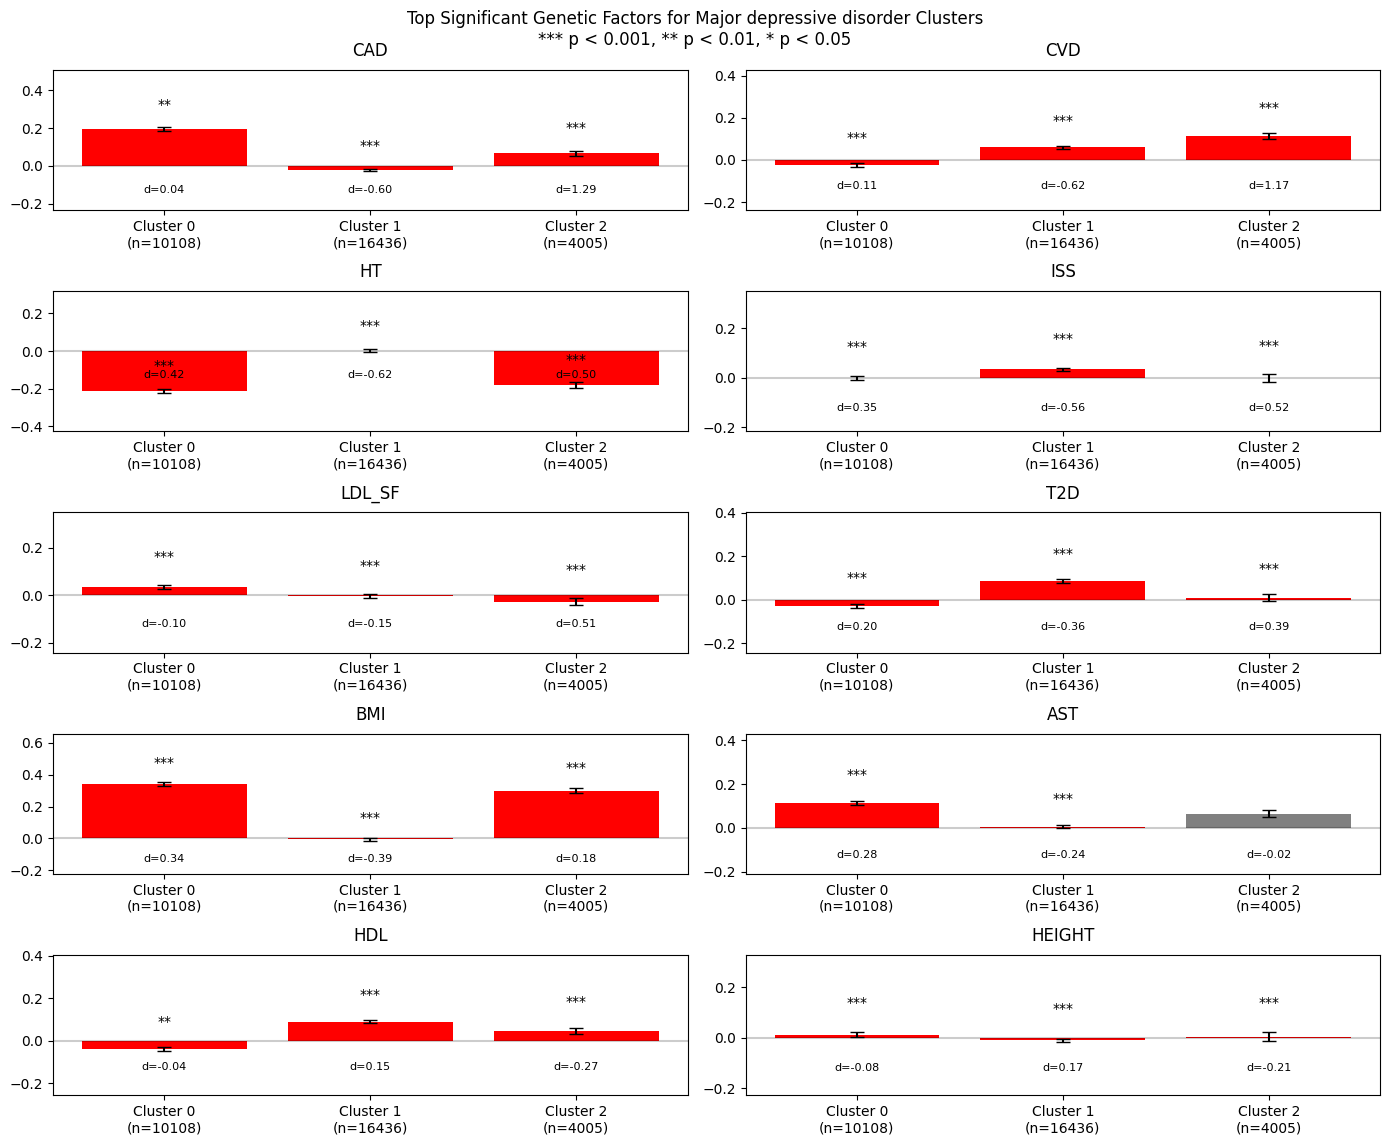

In [21]:
from fig4_utils import *

# For myocardial infarction (disease index 66)
genetic_results = analyze_genetic_data_by_cluster(66, n_clusters=3,n_batches=40,
                                                 prs_names_file='~/Dropbox/prs_names.csv',
                                                 heatmap_output_path="/Users/sarahurbut/aladynoulli2/pyScripts/figures_for_science/figure4/fig4_genetic_heatmap_traj_66.pdf")

                

Starting genetic data analysis for disease 112...
Loaded 36 PRS names from ~/Dropbox/prs_names.csv

Loading batch 1 model for reference...
Analyzing Myocardial infarction

Processing batch 1/40 (patients 0-10000)
Found 635 patients in batch 1

Processing batch 2/40 (patients 10000-20000)


/Users/sarahurbut/aladynoulli2/pyScripts/fig4_utils.py:65: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model1 = torch.load(model_path)
/Users/sarahurbut/aladynoulli2/pyScr

Found 628 patients in batch 2

Processing batch 3/40 (patients 20000-30000)
Found 617 patients in batch 3

Processing batch 4/40 (patients 30000-40000)
Found 601 patients in batch 4

Processing batch 5/40 (patients 40000-50000)
Found 663 patients in batch 5

Processing batch 6/40 (patients 50000-60000)
Found 624 patients in batch 6

Processing batch 7/40 (patients 60000-70000)
Found 613 patients in batch 7

Processing batch 8/40 (patients 70000-80000)
Found 605 patients in batch 8

Processing batch 9/40 (patients 80000-90000)
Found 614 patients in batch 9

Processing batch 10/40 (patients 90000-100000)
Found 592 patients in batch 10

Processing batch 11/40 (patients 100000-110000)
Found 637 patients in batch 11

Processing batch 12/40 (patients 110000-120000)
Found 604 patients in batch 12

Processing batch 13/40 (patients 120000-130000)
Found 613 patients in batch 13

Processing batch 14/40 (patients 130000-140000)
Found 629 patients in batch 14

Processing batch 15/40 (patients 14000

/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid value encountered in m

Saved heatmap to /Users/sarahurbut/aladynoulli2/pyScripts/figures_for_science/figure4/fig4_genetic_heatmap_traj_112.pdf


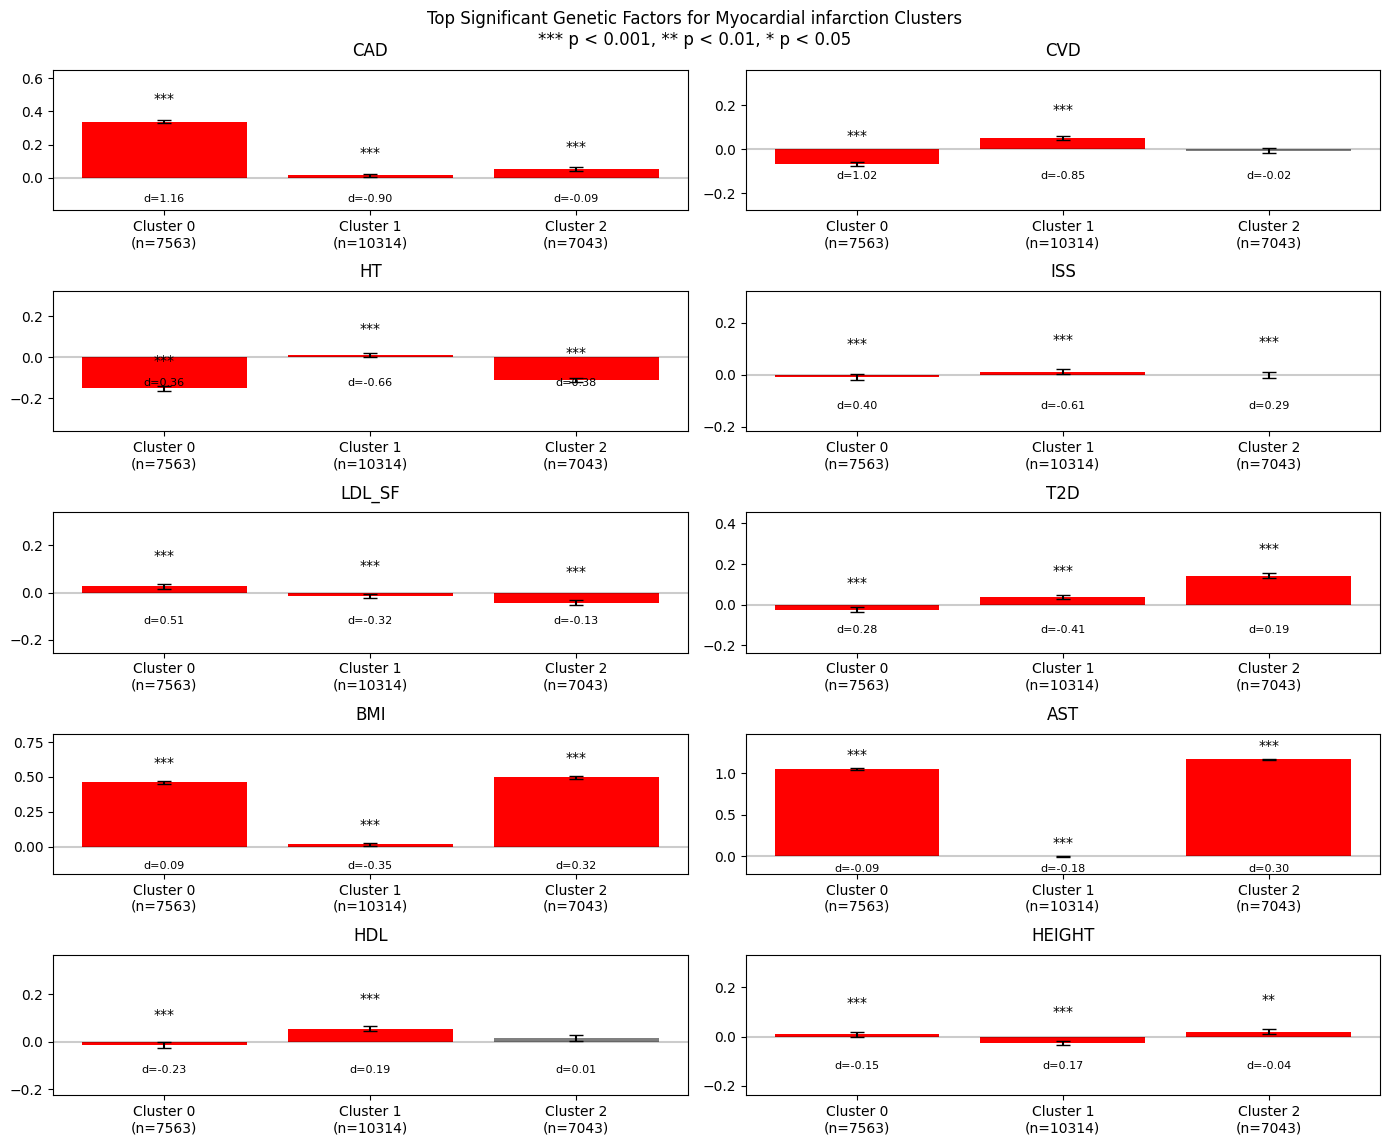

In [22]:


# For myocardial infarction (disease index 66)
genetic_results = analyze_genetic_data_by_cluster(112, n_clusters=3,n_batches=40,
                                                 prs_names_file='~/Dropbox/prs_names.csv',  
                                                 heatmap_output_path="/Users/sarahurbut/aladynoulli2/pyScripts/figures_for_science/figure4/fig4_genetic_heatmap_traj_112.pdf")



In [51]:
from fig4_utils import *
# For myocardial infarction (disease index 66)
genetic_results = analyze_genetic_data_by_cluster(17, n_clusters=3,n_batches=40,
                                                 prs_names_file='~/Dropbox/prs_names.csv',  
                                                 heatmap_output_path="/Users/sarahurbut/aladynoulli2/pyScripts/figures_for_science/figure4/fig4_genetic_heatmap_traj_17.pdf")



Starting genetic data analysis for disease 17...
Loaded 36 PRS names from ~/Dropbox/prs_names.csv

Loading batch 1 model for reference...
Analyzing Malignant neoplasm of female breast

Processing batch 1/40 (patients 0-10000)
Found 423 patients in batch 1
genetic_factor_names: ['AAM', 'AMD', 'AD', 'AST', 'AF', 'BD', 'BMI', 'CRC', 'BC', 'CVD', 'CED', 'CAD', 'CD', 'EOC', 'EBMDT', 'HBA1C_DF', 'HEIGHT', 'HDL', 'HT', 'IOP', 'ISS', 'LDL_SF', 'MEL', 'MS', 'OP', 'PD', 'POAG', 'PC', 'PSO', 'RA', 'SCZ', 'SLE', 'T1D', 'T2D', 'UC', 'VTE']
First row of all_genetic_data: [-1.4422144  -1.2472132   0.58538955  1.103922    0.4799366  -0.1892083
  0.15378405 -0.98395836  1.2680697  -0.7722733  -0.13067658 -1.1912645
 -0.41414946 -0.94078475 -0.23888087 -0.5833341  -0.5378817  -0.36019838
  0.02208869 -0.45354867  0.87708616 -0.5429565  -0.7924538   1.4211378
  0.456612    0.41915298 -0.3285239  -0.51742697 -0.5293154  -0.79743844
 -0.2214584  -0.02415683 -1.5907651  -0.02230417 -0.09578718 -0.9199066 ]


/Users/sarahurbut/aladynoulli2/pyScripts/fig4_utils.py:65: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model1 = torch.load(model_path)
/Users/sarahurbut/aladynoulli2/pyScr

Found 401 patients in batch 2
genetic_factor_names: ['AAM', 'AMD', 'AD', 'AST', 'AF', 'BD', 'BMI', 'CRC', 'BC', 'CVD', 'CED', 'CAD', 'CD', 'EOC', 'EBMDT', 'HBA1C_DF', 'HEIGHT', 'HDL', 'HT', 'IOP', 'ISS', 'LDL_SF', 'MEL', 'MS', 'OP', 'PD', 'POAG', 'PC', 'PSO', 'RA', 'SCZ', 'SLE', 'T1D', 'T2D', 'UC', 'VTE']
First row of all_genetic_data: [-1.4422144  -1.2472132   0.58538955  1.103922    0.4799366  -0.1892083
  0.15378405 -0.98395836  1.2680697  -0.7722733  -0.13067658 -1.1912645
 -0.41414946 -0.94078475 -0.23888087 -0.5833341  -0.5378817  -0.36019838
  0.02208869 -0.45354867  0.87708616 -0.5429565  -0.7924538   1.4211378
  0.456612    0.41915298 -0.3285239  -0.51742697 -0.5293154  -0.79743844
 -0.2214584  -0.02415683 -1.5907651  -0.02230417 -0.09578718 -0.9199066 ]

Processing batch 3/40 (patients 20000-30000)
Found 409 patients in batch 3
genetic_factor_names: ['AAM', 'AMD', 'AD', 'AST', 'AF', 'BD', 'BMI', 'CRC', 'BC', 'CVD', 'CED', 'CAD', 'CD', 'EOC', 'EBMDT', 'HBA1C_DF', 'HEIGHT', 'HD

/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid value encountered in m

In [52]:
from fig4_utils import *
# For myocardial infarction (disease index 66)
genetic_results = analyze_genetic_data_by_cluster(17, n_clusters=3,n_batches=40,
                                                 prs_names_file='~/Dropbox/prs_names.csv',  
                                                 heatmap_output_path="/Users/sarahurbut/aladynoulli2/pyScripts/figures_for_science/figure4/fig4_genetic_heatmap_traj_17.pdf")



Starting genetic data analysis for disease 17...
Loaded 36 PRS names from ~/Dropbox/prs_names.csv

Loading batch 1 model for reference...
Analyzing Malignant neoplasm of female breast

Processing batch 1/40 (patients 0-10000)
Found 423 patients in batch 1
genetic_factor_names: ['AAM', 'AMD', 'AD', 'AST', 'AF', 'BD', 'BMI', 'CRC', 'BC', 'CVD', 'CED', 'CAD', 'CD', 'EOC', 'EBMDT', 'HBA1C_DF', 'HEIGHT', 'HDL', 'HT', 'IOP', 'ISS', 'LDL_SF', 'MEL', 'MS', 'OP', 'PD', 'POAG', 'PC', 'PSO', 'RA', 'SCZ', 'SLE', 'T1D', 'T2D', 'UC', 'VTE']
First row of all_genetic_data: [-1.4422144  -1.2472132   0.58538955  1.103922    0.4799366  -0.1892083
  0.15378405 -0.98395836  1.2680697  -0.7722733  -0.13067658 -1.1912645
 -0.41414946 -0.94078475 -0.23888087 -0.5833341  -0.5378817  -0.36019838
  0.02208869 -0.45354867  0.87708616 -0.5429565  -0.7924538   1.4211378
  0.456612    0.41915298 -0.3285239  -0.51742697 -0.5293154  -0.79743844
 -0.2214584  -0.02415683 -1.5907651  -0.02230417 -0.09578718 -0.9199066 ]


/Users/sarahurbut/aladynoulli2/pyScripts/fig4_utils.py:65: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model1 = torch.load(model_path)
/Users/sarahurbut/aladynoulli2/pyScr

Found 401 patients in batch 2
genetic_factor_names: ['AAM', 'AMD', 'AD', 'AST', 'AF', 'BD', 'BMI', 'CRC', 'BC', 'CVD', 'CED', 'CAD', 'CD', 'EOC', 'EBMDT', 'HBA1C_DF', 'HEIGHT', 'HDL', 'HT', 'IOP', 'ISS', 'LDL_SF', 'MEL', 'MS', 'OP', 'PD', 'POAG', 'PC', 'PSO', 'RA', 'SCZ', 'SLE', 'T1D', 'T2D', 'UC', 'VTE']
First row of all_genetic_data: [-1.4422144  -1.2472132   0.58538955  1.103922    0.4799366  -0.1892083
  0.15378405 -0.98395836  1.2680697  -0.7722733  -0.13067658 -1.1912645
 -0.41414946 -0.94078475 -0.23888087 -0.5833341  -0.5378817  -0.36019838
  0.02208869 -0.45354867  0.87708616 -0.5429565  -0.7924538   1.4211378
  0.456612    0.41915298 -0.3285239  -0.51742697 -0.5293154  -0.79743844
 -0.2214584  -0.02415683 -1.5907651  -0.02230417 -0.09578718 -0.9199066 ]

Processing batch 3/40 (patients 20000-30000)
Found 409 patients in batch 3
genetic_factor_names: ['AAM', 'AMD', 'AD', 'AST', 'AF', 'BD', 'BMI', 'CRC', 'BC', 'CVD', 'CED', 'CAD', 'CD', 'EOC', 'EBMDT', 'HBA1C_DF', 'HEIGHT', 'HD

/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid value encountered in m

In [ ]:
from fig4_utils import *
# For myocardial infarction (disease index 66)
genetic_results = analyze_genetic_data_by_cluster(17, n_clusters=3,n_batches=40,
                                                 prs_names_file='~/Dropbox/prs_names.csv',  
                                                 heatmap_output_path="/Users/sarahurbut/aladynoulli2/pyScripts/figures_for_science/figure4/fig4_genetic_heatmap_traj_17.pdf")



Starting genetic data analysis for disease 17...
Loaded 36 PRS names from ~/Dropbox/prs_names.csv

Loading batch 1 model for reference...
Analyzing Malignant neoplasm of female breast

Processing batch 1/40 (patients 0-10000)
Found 423 patients in batch 1
genetic_factor_names: ['AAM', 'AMD', 'AD', 'AST', 'AF', 'BD', 'BMI', 'CRC', 'BC', 'CVD', 'CED', 'CAD', 'CD', 'EOC', 'EBMDT', 'HBA1C_DF', 'HEIGHT', 'HDL', 'HT', 'IOP', 'ISS', 'LDL_SF', 'MEL', 'MS', 'OP', 'PD', 'POAG', 'PC', 'PSO', 'RA', 'SCZ', 'SLE', 'T1D', 'T2D', 'UC', 'VTE']
First row of all_genetic_data: [-1.4422144  -1.2472132   0.58538955  1.103922    0.4799366  -0.1892083
  0.15378405 -0.98395836  1.2680697  -0.7722733  -0.13067658 -1.1912645
 -0.41414946 -0.94078475 -0.23888087 -0.5833341  -0.5378817  -0.36019838
  0.02208869 -0.45354867  0.87708616 -0.5429565  -0.7924538   1.4211378
  0.456612    0.41915298 -0.3285239  -0.51742697 -0.5293154  -0.79743844
 -0.2214584  -0.02415683 -1.5907651  -0.02230417 -0.09578718 -0.9199066 ]


/Users/sarahurbut/aladynoulli2/pyScripts/fig4_utils.py:65: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model1 = torch.load(model_path)
/Users/sarahurbut/aladynoulli2/pyScr

Found 401 patients in batch 2
genetic_factor_names: ['AAM', 'AMD', 'AD', 'AST', 'AF', 'BD', 'BMI', 'CRC', 'BC', 'CVD', 'CED', 'CAD', 'CD', 'EOC', 'EBMDT', 'HBA1C_DF', 'HEIGHT', 'HDL', 'HT', 'IOP', 'ISS', 'LDL_SF', 'MEL', 'MS', 'OP', 'PD', 'POAG', 'PC', 'PSO', 'RA', 'SCZ', 'SLE', 'T1D', 'T2D', 'UC', 'VTE']
First row of all_genetic_data: [-1.4422144  -1.2472132   0.58538955  1.103922    0.4799366  -0.1892083
  0.15378405 -0.98395836  1.2680697  -0.7722733  -0.13067658 -1.1912645
 -0.41414946 -0.94078475 -0.23888087 -0.5833341  -0.5378817  -0.36019838
  0.02208869 -0.45354867  0.87708616 -0.5429565  -0.7924538   1.4211378
  0.456612    0.41915298 -0.3285239  -0.51742697 -0.5293154  -0.79743844
 -0.2214584  -0.02415683 -1.5907651  -0.02230417 -0.09578718 -0.9199066 ]

Processing batch 3/40 (patients 20000-30000)
Found 409 patients in batch 3
genetic_factor_names: ['AAM', 'AMD', 'AD', 'AST', 'AF', 'BD', 'BMI', 'CRC', 'BC', 'CVD', 'CED', 'CAD', 'CD', 'EOC', 'EBMDT', 'HBA1C_DF', 'HEIGHT', 'HD

/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid value encountered in m

In [ ]:
from fig4_utils import *
# For myocardial infarction (disease index 66)
genetic_results = analyze_genetic_data_by_cluster(17, n_clusters=3,n_batches=40,
                                                 prs_names_file='~/Dropbox/prs_names.csv',  
                                                 heatmap_output_path="/Users/sarahurbut/aladynoulli2/pyScripts/figures_for_science/figure4/fig4_genetic_heatmap_traj_17.pdf")



Starting genetic data analysis for disease 17...
Loaded 36 PRS names from ~/Dropbox/prs_names.csv

Loading batch 1 model for reference...
Analyzing Malignant neoplasm of female breast

Processing batch 1/40 (patients 0-10000)
Found 423 patients in batch 1
genetic_factor_names: ['AAM', 'AMD', 'AD', 'AST', 'AF', 'BD', 'BMI', 'CRC', 'BC', 'CVD', 'CED', 'CAD', 'CD', 'EOC', 'EBMDT', 'HBA1C_DF', 'HEIGHT', 'HDL', 'HT', 'IOP', 'ISS', 'LDL_SF', 'MEL', 'MS', 'OP', 'PD', 'POAG', 'PC', 'PSO', 'RA', 'SCZ', 'SLE', 'T1D', 'T2D', 'UC', 'VTE']
First row of all_genetic_data: [-1.4422144  -1.2472132   0.58538955  1.103922    0.4799366  -0.1892083
  0.15378405 -0.98395836  1.2680697  -0.7722733  -0.13067658 -1.1912645
 -0.41414946 -0.94078475 -0.23888087 -0.5833341  -0.5378817  -0.36019838
  0.02208869 -0.45354867  0.87708616 -0.5429565  -0.7924538   1.4211378
  0.456612    0.41915298 -0.3285239  -0.51742697 -0.5293154  -0.79743844
 -0.2214584  -0.02415683 -1.5907651  -0.02230417 -0.09578718 -0.9199066 ]


/Users/sarahurbut/aladynoulli2/pyScripts/fig4_utils.py:65: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model1 = torch.load(model_path)
/Users/sarahurbut/aladynoulli2/pyScr

Found 401 patients in batch 2
genetic_factor_names: ['AAM', 'AMD', 'AD', 'AST', 'AF', 'BD', 'BMI', 'CRC', 'BC', 'CVD', 'CED', 'CAD', 'CD', 'EOC', 'EBMDT', 'HBA1C_DF', 'HEIGHT', 'HDL', 'HT', 'IOP', 'ISS', 'LDL_SF', 'MEL', 'MS', 'OP', 'PD', 'POAG', 'PC', 'PSO', 'RA', 'SCZ', 'SLE', 'T1D', 'T2D', 'UC', 'VTE']
First row of all_genetic_data: [-1.4422144  -1.2472132   0.58538955  1.103922    0.4799366  -0.1892083
  0.15378405 -0.98395836  1.2680697  -0.7722733  -0.13067658 -1.1912645
 -0.41414946 -0.94078475 -0.23888087 -0.5833341  -0.5378817  -0.36019838
  0.02208869 -0.45354867  0.87708616 -0.5429565  -0.7924538   1.4211378
  0.456612    0.41915298 -0.3285239  -0.51742697 -0.5293154  -0.79743844
 -0.2214584  -0.02415683 -1.5907651  -0.02230417 -0.09578718 -0.9199066 ]

Processing batch 3/40 (patients 20000-30000)
Found 409 patients in batch 3
genetic_factor_names: ['AAM', 'AMD', 'AD', 'AST', 'AF', 'BD', 'BMI', 'CRC', 'BC', 'CVD', 'CED', 'CAD', 'CD', 'EOC', 'EBMDT', 'HBA1C_DF', 'HEIGHT', 'HD

/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid value encountered in m

In [ ]:
from fig4_utils import *
# For myocardial infarction (disease index 66)
genetic_results = analyze_genetic_data_by_cluster(17, n_clusters=3,n_batches=40,
                                                 prs_names_file='~/Dropbox/prs_names.csv',  
                                                 heatmap_output_path="/Users/sarahurbut/aladynoulli2/pyScripts/figures_for_science/figure4/fig4_genetic_heatmap_traj_17.pdf")



Starting genetic data analysis for disease 17...
Loaded 36 PRS names from ~/Dropbox/prs_names.csv

Loading batch 1 model for reference...
Analyzing Malignant neoplasm of female breast

Processing batch 1/40 (patients 0-10000)
Found 423 patients in batch 1
genetic_factor_names: ['AAM', 'AMD', 'AD', 'AST', 'AF', 'BD', 'BMI', 'CRC', 'BC', 'CVD', 'CED', 'CAD', 'CD', 'EOC', 'EBMDT', 'HBA1C_DF', 'HEIGHT', 'HDL', 'HT', 'IOP', 'ISS', 'LDL_SF', 'MEL', 'MS', 'OP', 'PD', 'POAG', 'PC', 'PSO', 'RA', 'SCZ', 'SLE', 'T1D', 'T2D', 'UC', 'VTE']
First row of all_genetic_data: [-1.4422144  -1.2472132   0.58538955  1.103922    0.4799366  -0.1892083
  0.15378405 -0.98395836  1.2680697  -0.7722733  -0.13067658 -1.1912645
 -0.41414946 -0.94078475 -0.23888087 -0.5833341  -0.5378817  -0.36019838
  0.02208869 -0.45354867  0.87708616 -0.5429565  -0.7924538   1.4211378
  0.456612    0.41915298 -0.3285239  -0.51742697 -0.5293154  -0.79743844
 -0.2214584  -0.02415683 -1.5907651  -0.02230417 -0.09578718 -0.9199066 ]


/Users/sarahurbut/aladynoulli2/pyScripts/fig4_utils.py:65: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model1 = torch.load(model_path)
/Users/sarahurbut/aladynoulli2/pyScr

Found 401 patients in batch 2
genetic_factor_names: ['AAM', 'AMD', 'AD', 'AST', 'AF', 'BD', 'BMI', 'CRC', 'BC', 'CVD', 'CED', 'CAD', 'CD', 'EOC', 'EBMDT', 'HBA1C_DF', 'HEIGHT', 'HDL', 'HT', 'IOP', 'ISS', 'LDL_SF', 'MEL', 'MS', 'OP', 'PD', 'POAG', 'PC', 'PSO', 'RA', 'SCZ', 'SLE', 'T1D', 'T2D', 'UC', 'VTE']
First row of all_genetic_data: [-1.4422144  -1.2472132   0.58538955  1.103922    0.4799366  -0.1892083
  0.15378405 -0.98395836  1.2680697  -0.7722733  -0.13067658 -1.1912645
 -0.41414946 -0.94078475 -0.23888087 -0.5833341  -0.5378817  -0.36019838
  0.02208869 -0.45354867  0.87708616 -0.5429565  -0.7924538   1.4211378
  0.456612    0.41915298 -0.3285239  -0.51742697 -0.5293154  -0.79743844
 -0.2214584  -0.02415683 -1.5907651  -0.02230417 -0.09578718 -0.9199066 ]

Processing batch 3/40 (patients 20000-30000)
Found 409 patients in batch 3
genetic_factor_names: ['AAM', 'AMD', 'AD', 'AST', 'AF', 'BD', 'BMI', 'CRC', 'BC', 'CVD', 'CED', 'CAD', 'CD', 'EOC', 'EBMDT', 'HBA1C_DF', 'HEIGHT', 'HD

/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid value encountered in m

KeyError: 'Factor'

In [ ]:
from fig4_utils import *
# For myocardial infarction (disease index 66)
genetic_results = analyze_genetic_data_by_cluster(17, n_clusters=3,n_batches=40,
                                                 prs_names_file='~/Dropbox/prs_names.csv',  
                                                 heatmap_output_path="/Users/sarahurbut/aladynoulli2/pyScripts/figures_for_science/figure4/fig4_genetic_heatmap_traj_17.pdf")



Starting genetic data analysis for disease 17...
Loaded 36 PRS names from ~/Dropbox/prs_names.csv

Loading batch 1 model for reference...
Analyzing Malignant neoplasm of female breast

Processing batch 1/40 (patients 0-10000)
Found 423 patients in batch 1
genetic_factor_names: ['AAM', 'AMD', 'AD', 'AST', 'AF', 'BD', 'BMI', 'CRC', 'BC', 'CVD', 'CED', 'CAD', 'CD', 'EOC', 'EBMDT', 'HBA1C_DF', 'HEIGHT', 'HDL', 'HT', 'IOP', 'ISS', 'LDL_SF', 'MEL', 'MS', 'OP', 'PD', 'POAG', 'PC', 'PSO', 'RA', 'SCZ', 'SLE', 'T1D', 'T2D', 'UC', 'VTE']
First row of all_genetic_data: [-1.4422144  -1.2472132   0.58538955  1.103922    0.4799366  -0.1892083
  0.15378405 -0.98395836  1.2680697  -0.7722733  -0.13067658 -1.1912645
 -0.41414946 -0.94078475 -0.23888087 -0.5833341  -0.5378817  -0.36019838
  0.02208869 -0.45354867  0.87708616 -0.5429565  -0.7924538   1.4211378
  0.456612    0.41915298 -0.3285239  -0.51742697 -0.5293154  -0.79743844
 -0.2214584  -0.02415683 -1.5907651  -0.02230417 -0.09578718 -0.9199066 ]


/Users/sarahurbut/aladynoulli2/pyScripts/fig4_utils.py:65: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model1 = torch.load(model_path)
/Users/sarahurbut/aladynoulli2/pyScr

Found 401 patients in batch 2
genetic_factor_names: ['AAM', 'AMD', 'AD', 'AST', 'AF', 'BD', 'BMI', 'CRC', 'BC', 'CVD', 'CED', 'CAD', 'CD', 'EOC', 'EBMDT', 'HBA1C_DF', 'HEIGHT', 'HDL', 'HT', 'IOP', 'ISS', 'LDL_SF', 'MEL', 'MS', 'OP', 'PD', 'POAG', 'PC', 'PSO', 'RA', 'SCZ', 'SLE', 'T1D', 'T2D', 'UC', 'VTE']
First row of all_genetic_data: [-1.4422144  -1.2472132   0.58538955  1.103922    0.4799366  -0.1892083
  0.15378405 -0.98395836  1.2680697  -0.7722733  -0.13067658 -1.1912645
 -0.41414946 -0.94078475 -0.23888087 -0.5833341  -0.5378817  -0.36019838
  0.02208869 -0.45354867  0.87708616 -0.5429565  -0.7924538   1.4211378
  0.456612    0.41915298 -0.3285239  -0.51742697 -0.5293154  -0.79743844
 -0.2214584  -0.02415683 -1.5907651  -0.02230417 -0.09578718 -0.9199066 ]

Processing batch 3/40 (patients 20000-30000)
Found 409 patients in batch 3
genetic_factor_names: ['AAM', 'AMD', 'AD', 'AST', 'AF', 'BD', 'BMI', 'CRC', 'BC', 'CVD', 'CED', 'CAD', 'CD', 'EOC', 'EBMDT', 'HBA1C_DF', 'HEIGHT', 'HD

/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid value encountered in m

KeyError: 'Factor'

Starting genetic data analysis for poulation
Loaded 36 PRS names from prs_names.csv

Loading batch 1 model for reference...
Analyzing Population

Processing batch 1/40 (patients 0-10000)


/Users/sarahurbut/aladynoulli2/pyScripts/fig4_utils.py:473: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  # Process each batch
/Users/sarahurbut/aladynoulli2/pyScripts/fig4_

Found 10000 patients in batch 1

Processing batch 2/40 (patients 10000-20000)
Found 10000 patients in batch 2

Processing batch 3/40 (patients 20000-30000)
Found 10000 patients in batch 3

Processing batch 4/40 (patients 30000-40000)
Found 10000 patients in batch 4

Processing batch 5/40 (patients 40000-50000)
Found 10000 patients in batch 5

Processing batch 6/40 (patients 50000-60000)
Found 10000 patients in batch 6

Processing batch 7/40 (patients 60000-70000)
Found 10000 patients in batch 7

Processing batch 8/40 (patients 70000-80000)
Found 10000 patients in batch 8

Processing batch 9/40 (patients 80000-90000)
Found 10000 patients in batch 9

Processing batch 10/40 (patients 90000-100000)
Found 10000 patients in batch 10

Processing batch 11/40 (patients 100000-110000)
Found 10000 patients in batch 11

Processing batch 12/40 (patients 110000-120000)
Found 10000 patients in batch 12

Processing batch 13/40 (patients 120000-130000)
Found 10000 patients in batch 13

Processing batch

/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid value encountered in m


Saved cluster scores to cluster_scores_disease_population.csv

Verifying CSV and heatmap values match:

First few values from cluster_scores (CSV):

AAM:
Cluster 0: -0.029
Cluster 1: -0.015
Cluster 2: 0.004

AMD:
Cluster 0: 0.175
Cluster 1: 0.136
Cluster 2: 0.041

AD:
Cluster 0: 0.273
Cluster 1: -0.092
Cluster 2: -0.012

First few values from heatmap_data:

AAM:
Cluster 0: -0.029
Cluster 1: -0.015
Cluster 2: 0.004

AMD:
Cluster 0: 0.175
Cluster 1: 0.136
Cluster 2: 0.041

AD:
Cluster 0: 0.273
Cluster 1: -0.092
Cluster 2: -0.012
Saved heatmap to disease_population_comparison.pdf


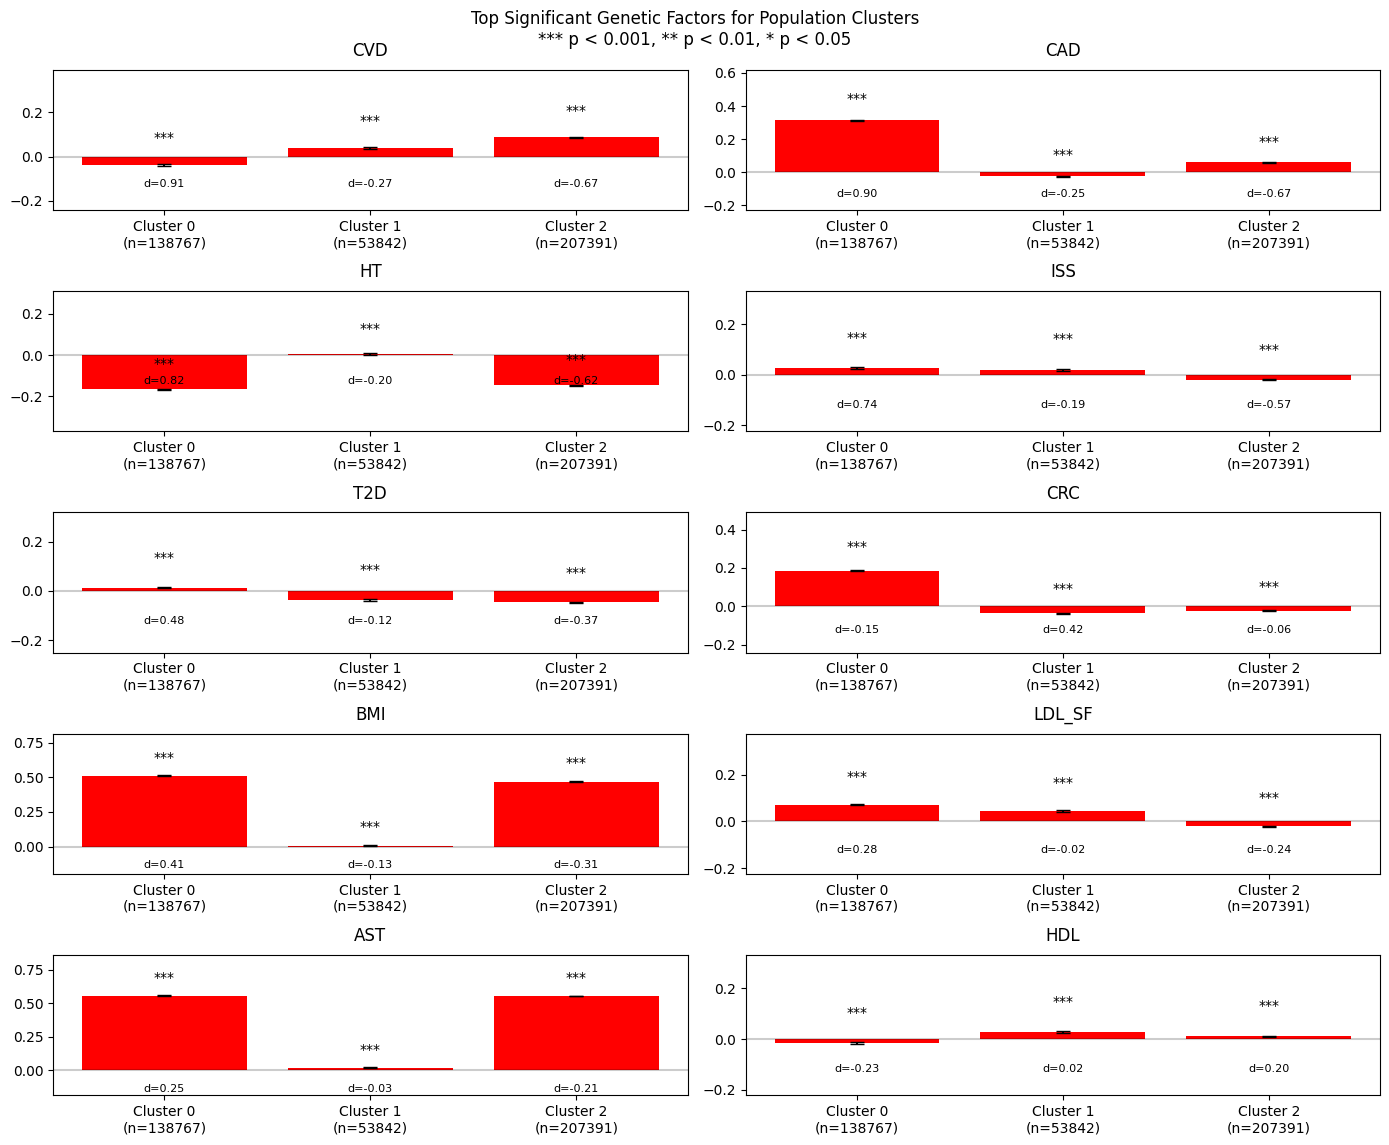

In [25]:
from fig4_utils import *
results = analyze_genetic_data_by_population(
    # e.g., for MI
    n_clusters=3,
    n_batches=40,
    prs_names_file='prs_names.csv',  # Update this path to your actual prs_names.csv location
    heatmap_output_path='disease_population_comparison.pdf'
)

Step 1: Getting general population clusters...
Starting genetic data analysis for all signatures...
Loaded 36 PRS names from prs_names.csv

Loading batch 1 model for reference...

Processing batch 1/40 (patients 0-10000)
Processed 10000 patients in batch 1

Processing batch 2/40 (patients 10000-20000)


/Users/sarahurbut/aladynoulli2/pyScripts/utils.py:3119: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model1 = torch.load(model_path)
/Users/sarahurbut/aladynoulli2/pyScript

Processed 10000 patients in batch 2

Processing batch 3/40 (patients 20000-30000)
Processed 10000 patients in batch 3

Processing batch 4/40 (patients 30000-40000)
Processed 10000 patients in batch 4

Processing batch 5/40 (patients 40000-50000)
Processed 10000 patients in batch 5

Processing batch 6/40 (patients 50000-60000)
Processed 10000 patients in batch 6

Processing batch 7/40 (patients 60000-70000)
Processed 10000 patients in batch 7

Processing batch 8/40 (patients 70000-80000)
Processed 10000 patients in batch 8

Processing batch 9/40 (patients 80000-90000)
Processed 10000 patients in batch 9

Processing batch 10/40 (patients 90000-100000)
Processed 10000 patients in batch 10

Processing batch 11/40 (patients 100000-110000)
Processed 10000 patients in batch 11

Processing batch 12/40 (patients 110000-120000)
Processed 10000 patients in batch 12

Processing batch 13/40 (patients 120000-130000)
Processed 10000 patients in batch 13

Processing batch 14/40 (patients 130000-140000

/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid value encountered in m


Cluster sizes:
Cluster 0: 138767 patients
Cluster 1: 53842 patients
Cluster 2: 207391 patients
Using Bonferroni threshold: 4.63e-04


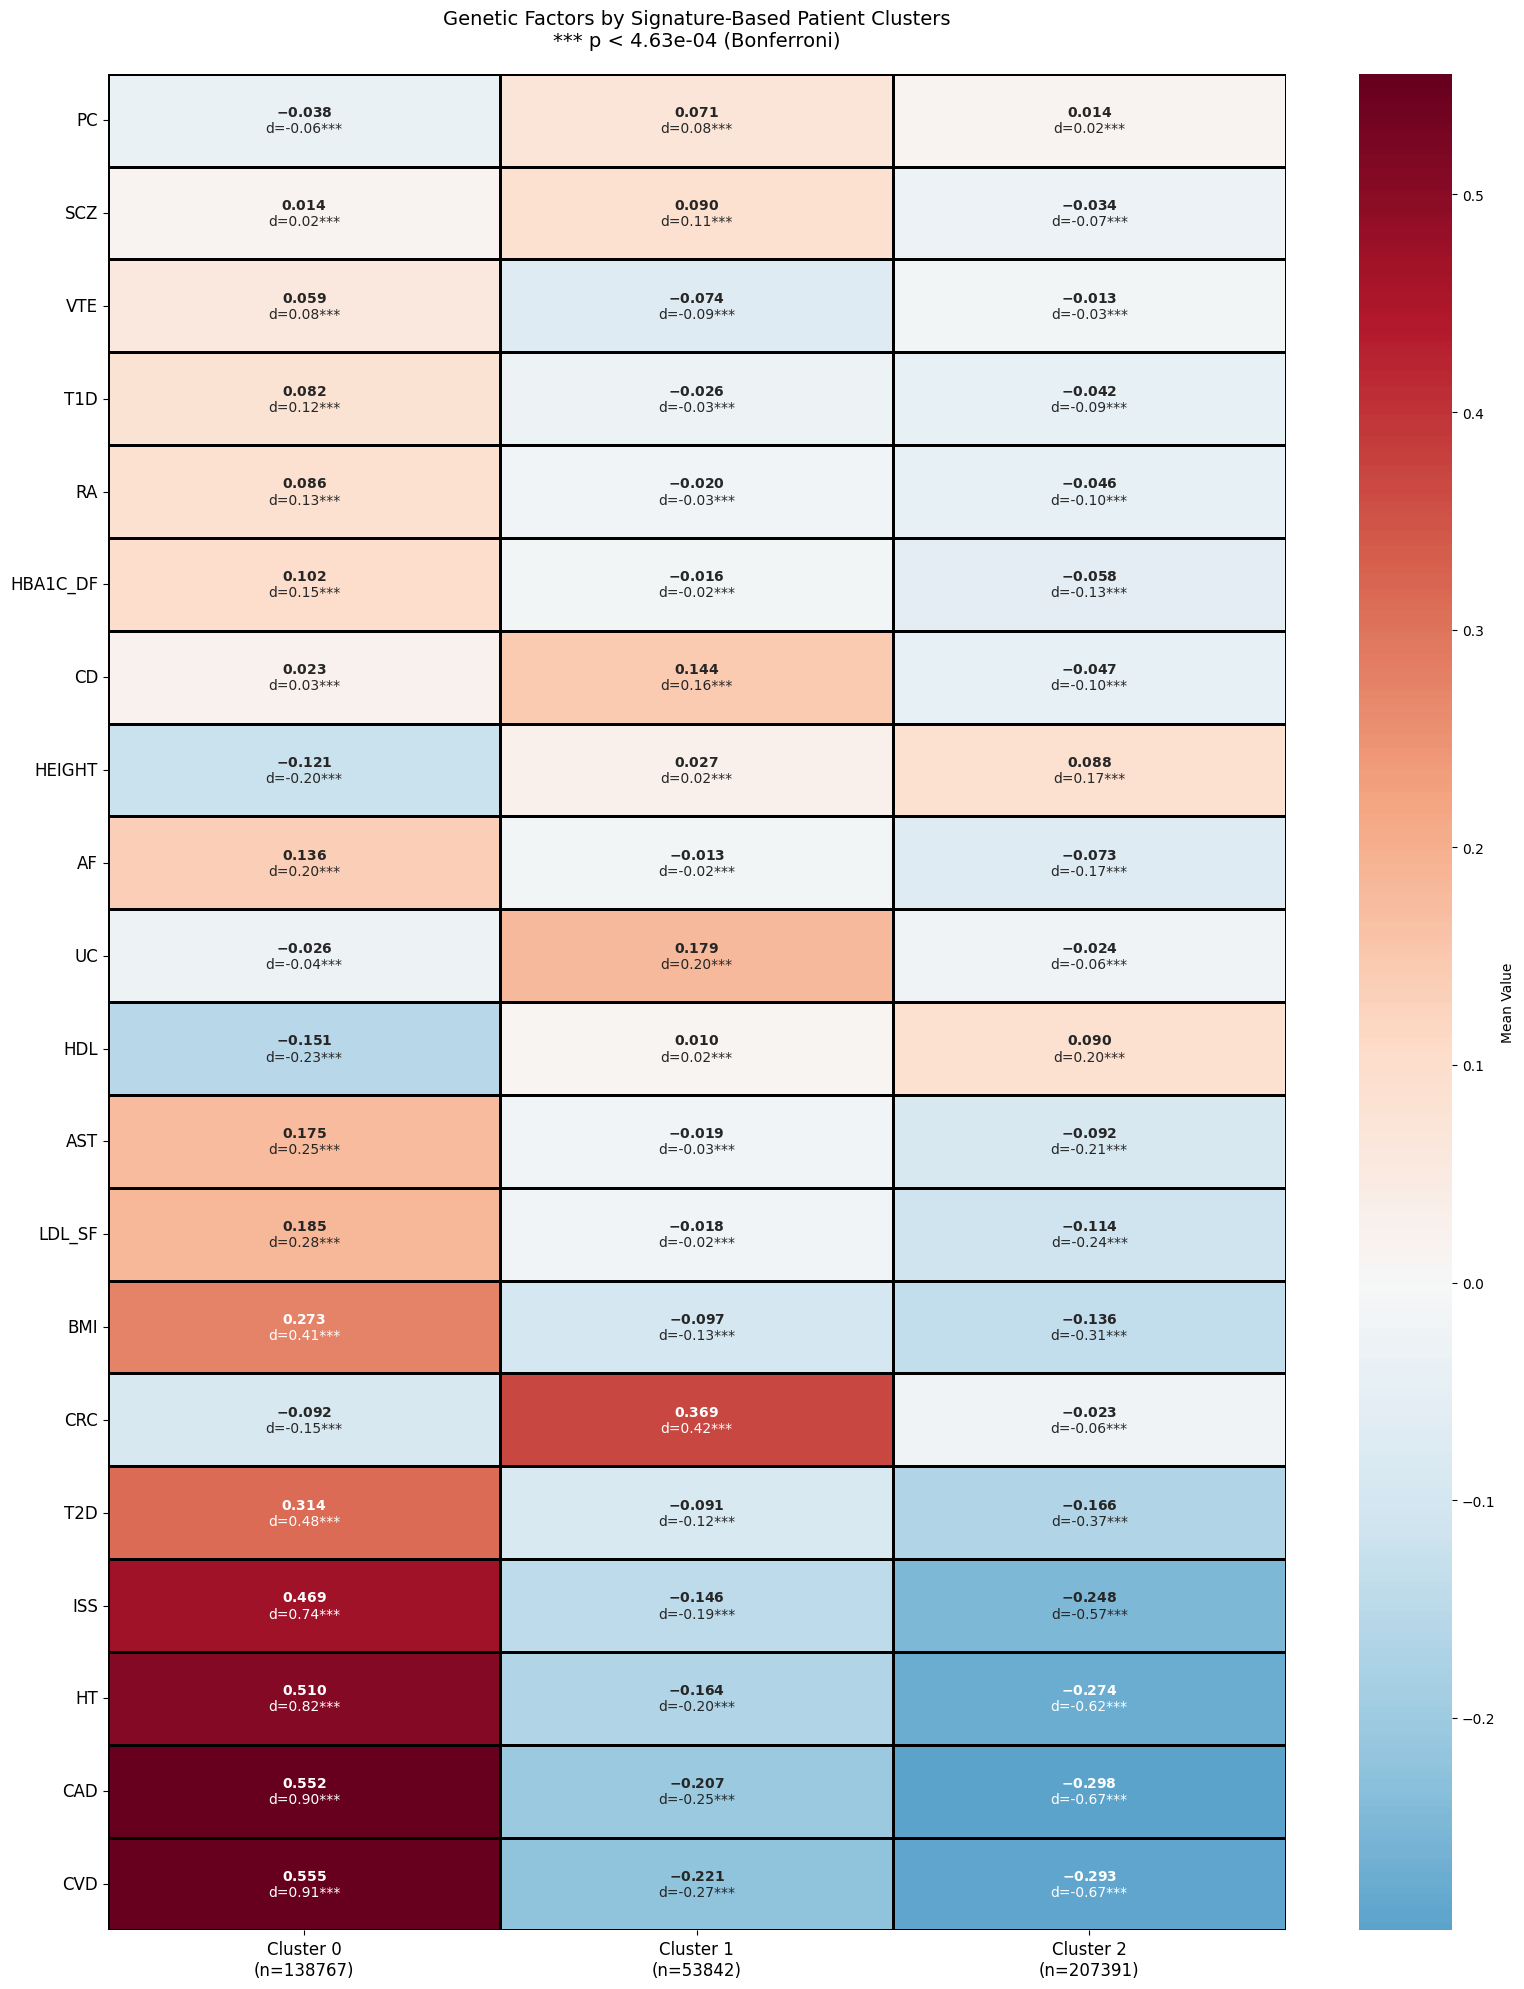

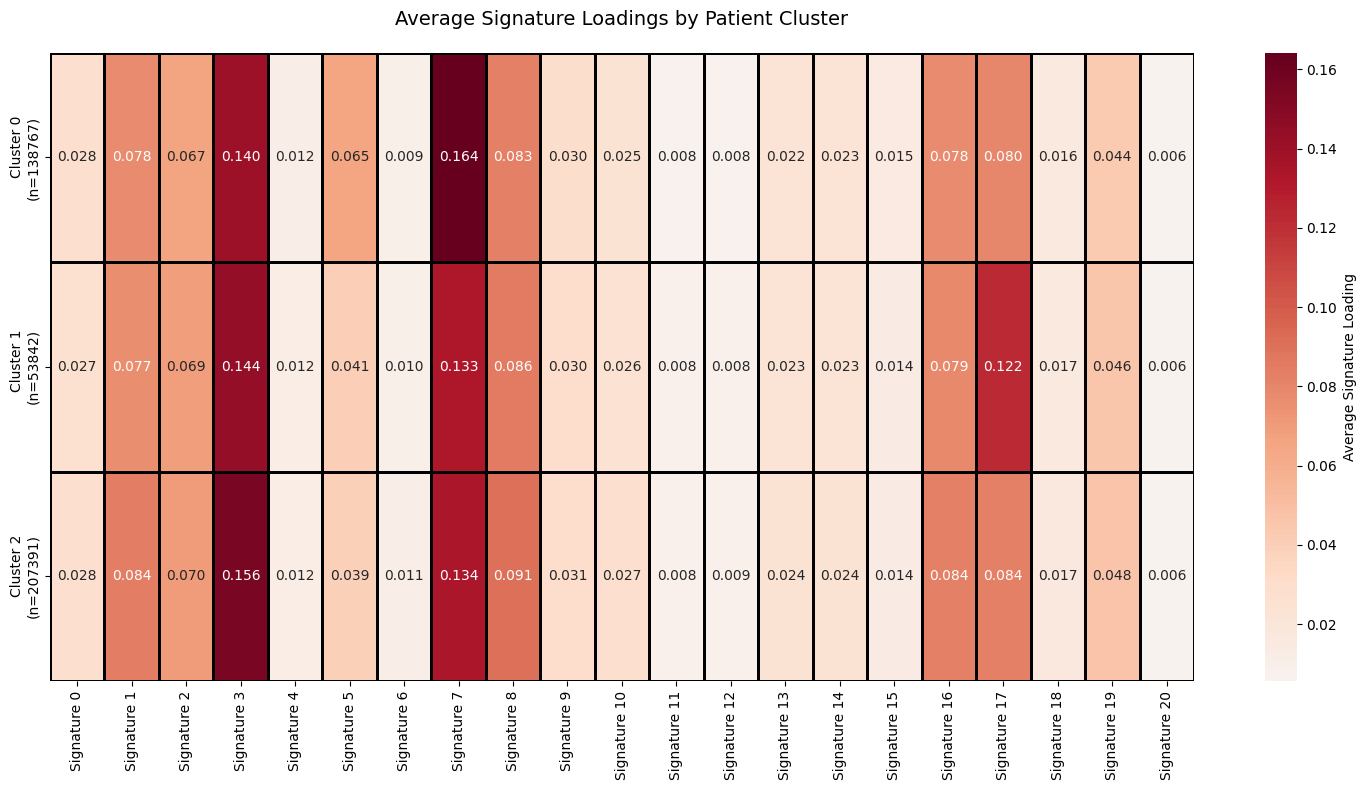

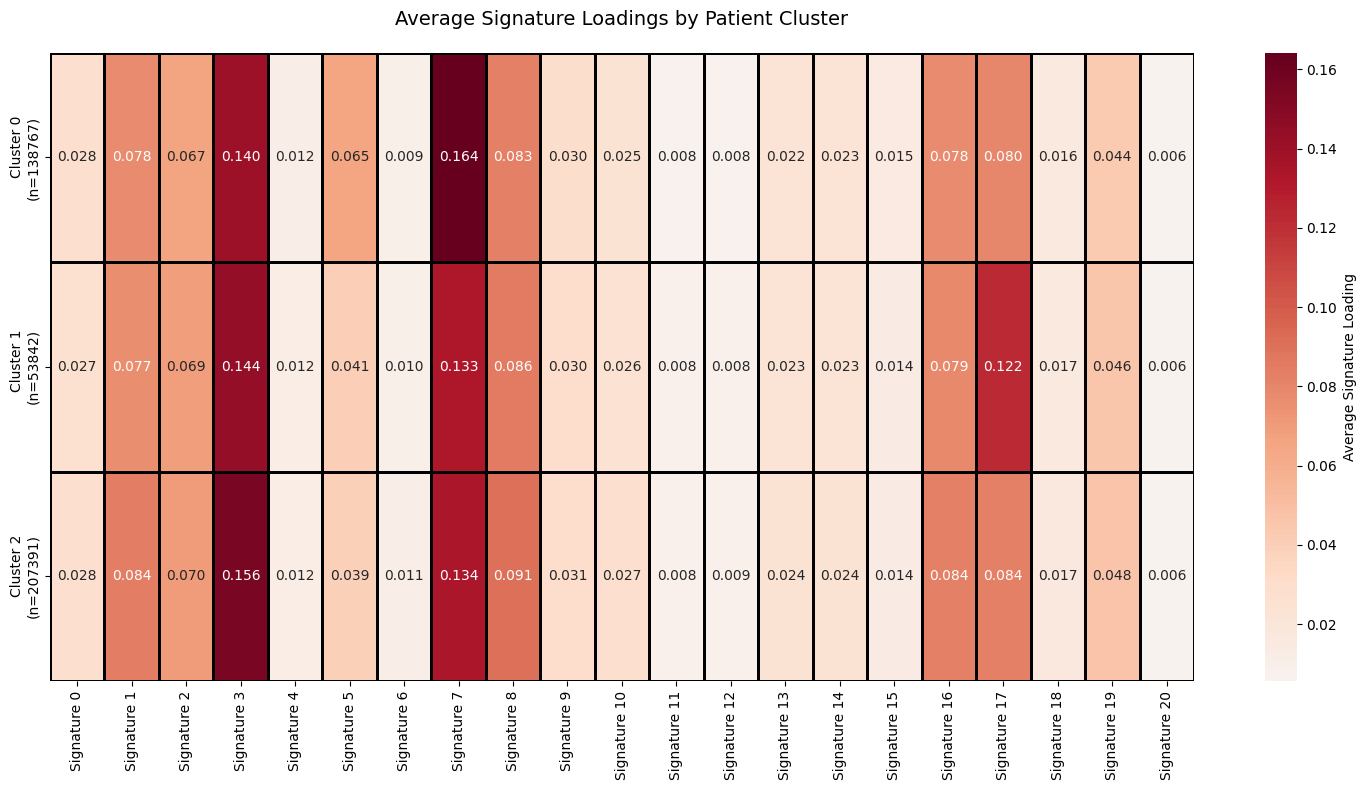

Using Bonferroni threshold: 4.63e-04


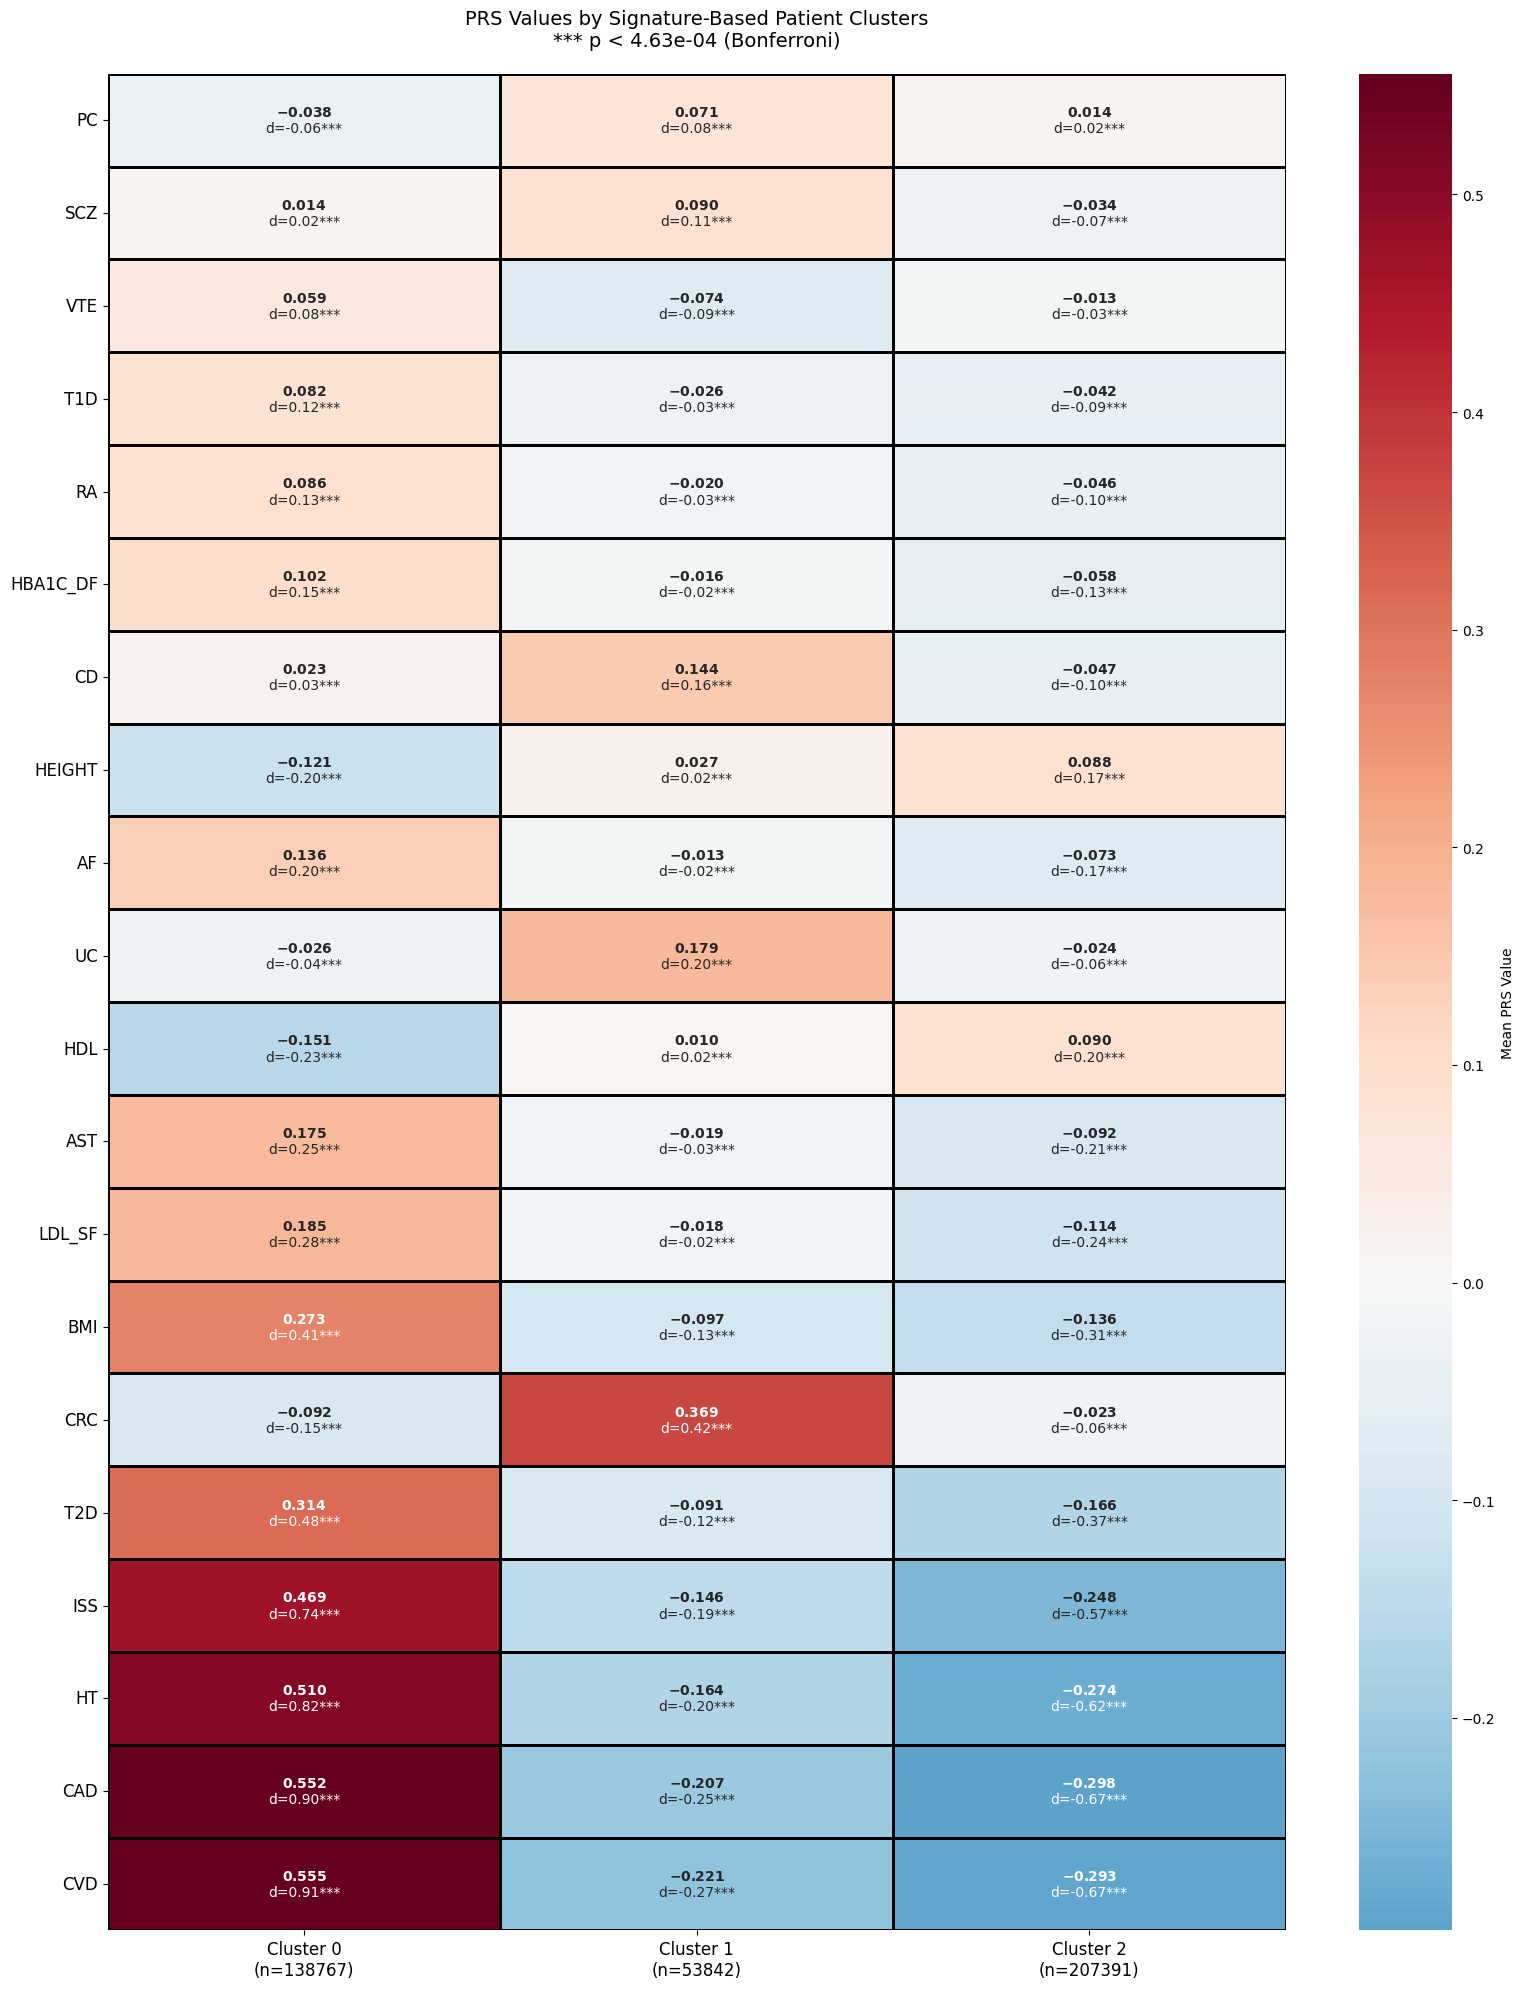


Step 2: Getting disease-specific clusters...
Starting genetic data analysis for disease 112...
Loaded 36 PRS names from prs_names.csv

Loading batch 1 model for reference...
Analyzing Myocardial infarction

Processing batch 1/40 (patients 0-10000)


/Users/sarahurbut/aladynoulli2/pyScripts/utils.py:2763: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model1 = torch.load(model_path)
/Users/sarahurbut/aladynoulli2/pyScript

Found 635 patients in batch 1

Processing batch 2/40 (patients 10000-20000)
Found 628 patients in batch 2

Processing batch 3/40 (patients 20000-30000)
Found 617 patients in batch 3

Processing batch 4/40 (patients 30000-40000)
Found 601 patients in batch 4

Processing batch 5/40 (patients 40000-50000)
Found 663 patients in batch 5

Processing batch 6/40 (patients 50000-60000)
Found 624 patients in batch 6

Processing batch 7/40 (patients 60000-70000)
Found 613 patients in batch 7

Processing batch 8/40 (patients 70000-80000)
Found 605 patients in batch 8

Processing batch 9/40 (patients 80000-90000)
Found 614 patients in batch 9

Processing batch 10/40 (patients 90000-100000)
Found 592 patients in batch 10

Processing batch 11/40 (patients 100000-110000)
Found 637 patients in batch 11

Processing batch 12/40 (patients 110000-120000)
Found 604 patients in batch 12

Processing batch 13/40 (patients 120000-130000)
Found 613 patients in batch 13

Processing batch 14/40 (patients 130000-14

/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid value encountered in m

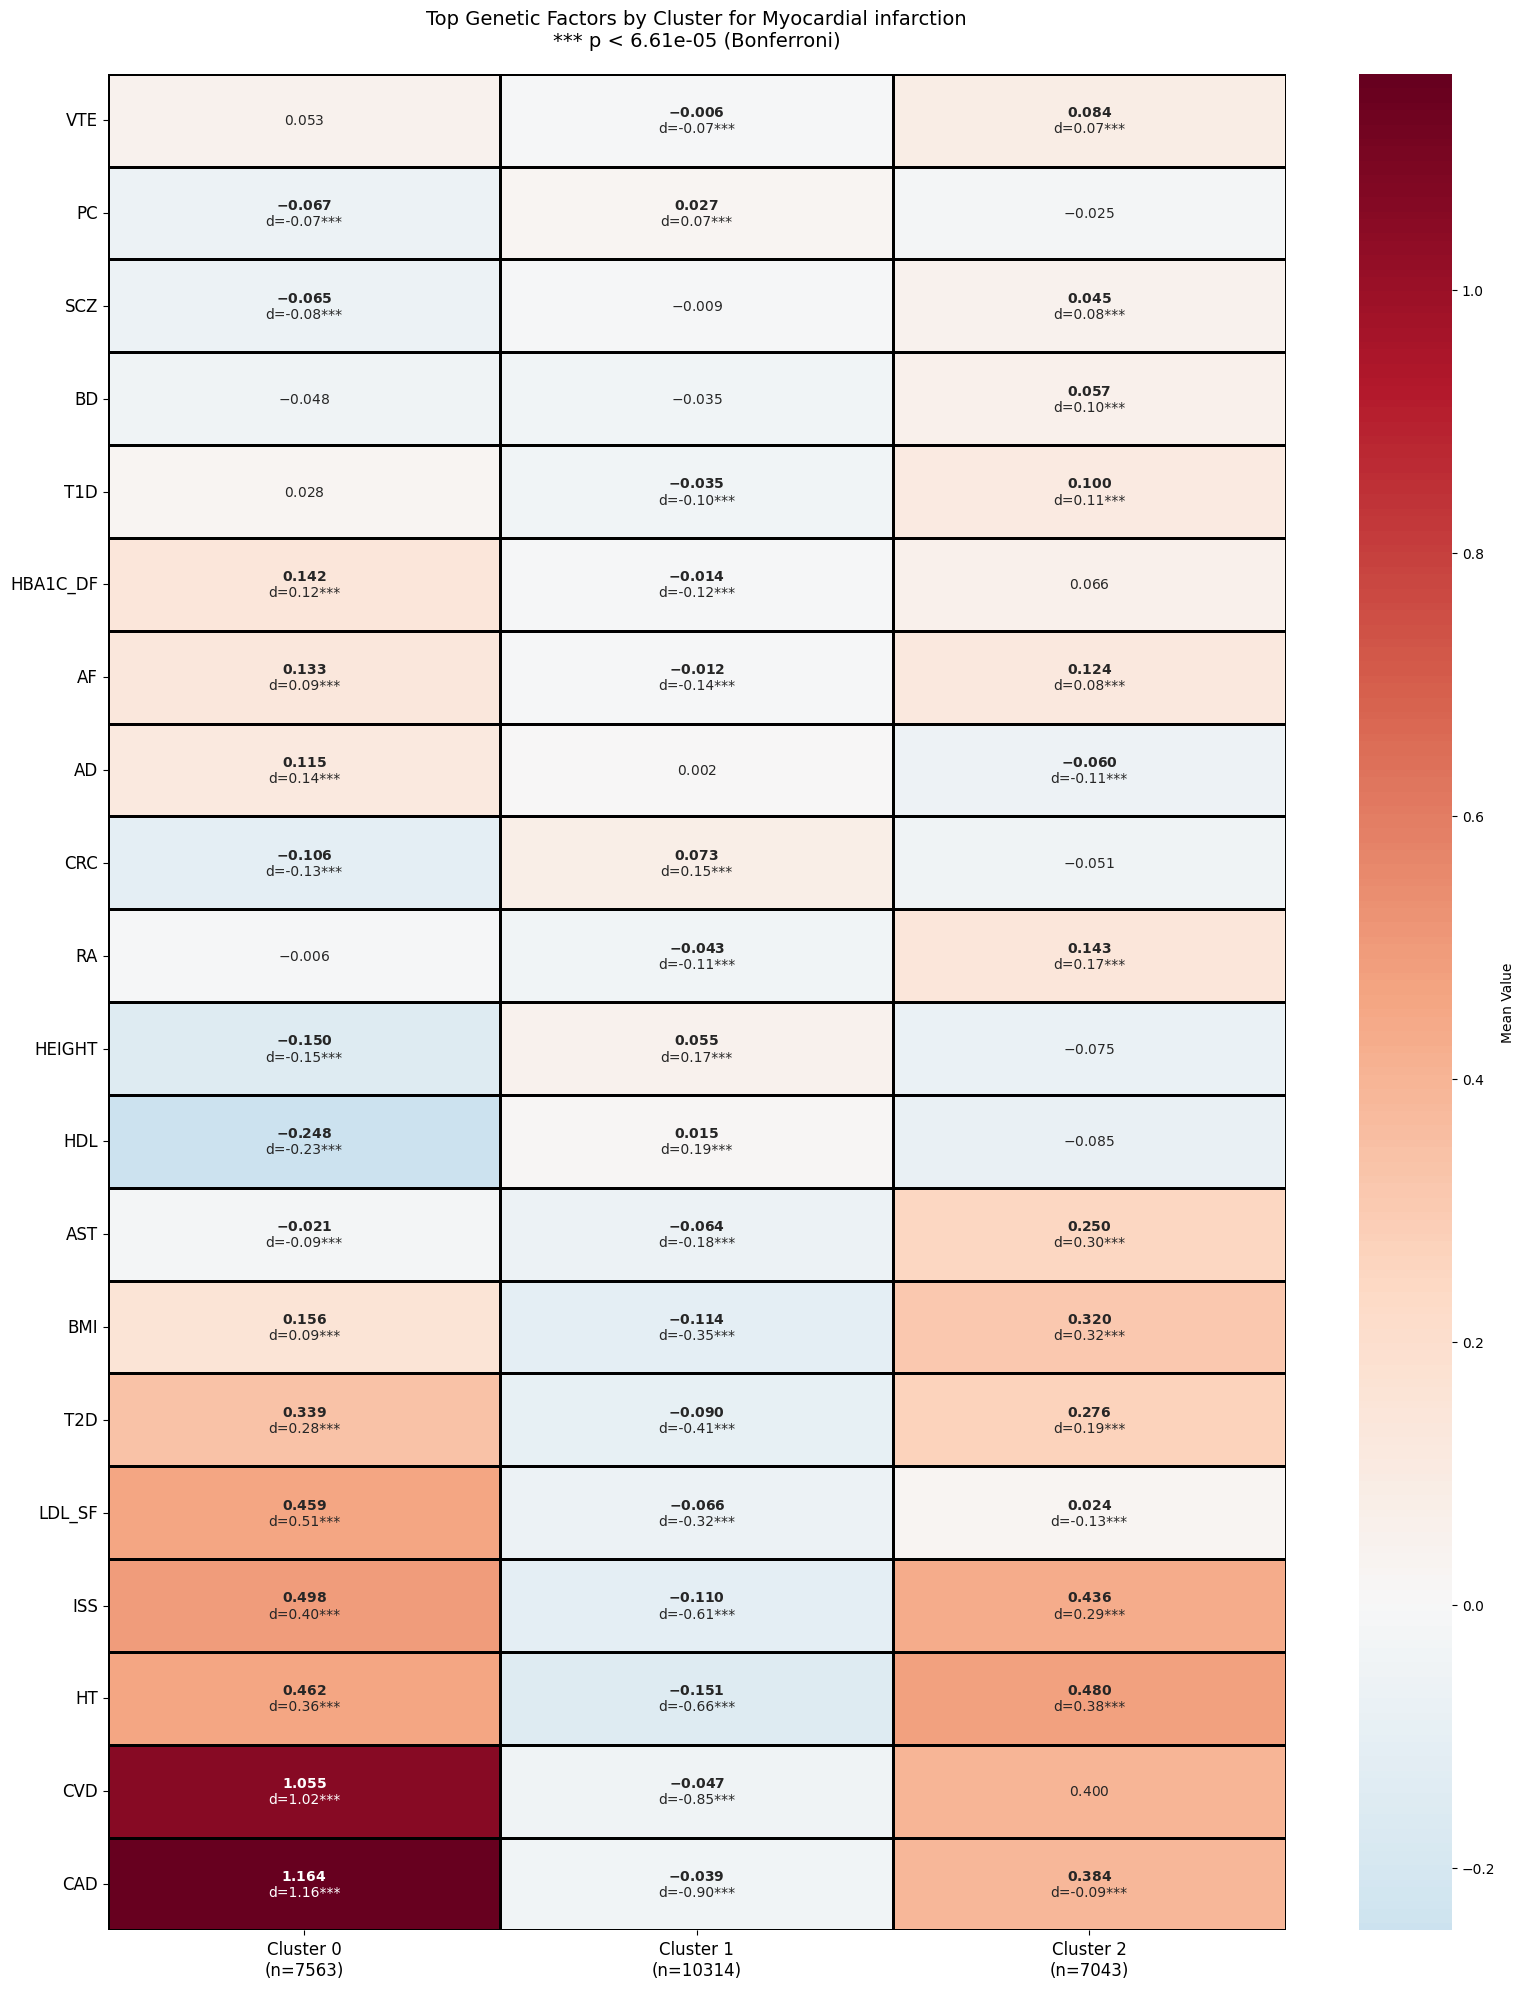

Saved comparison plot to disease_112_comparison.pdf
Saved PRS comparison plot to disease_112_comparison_prs.pdf


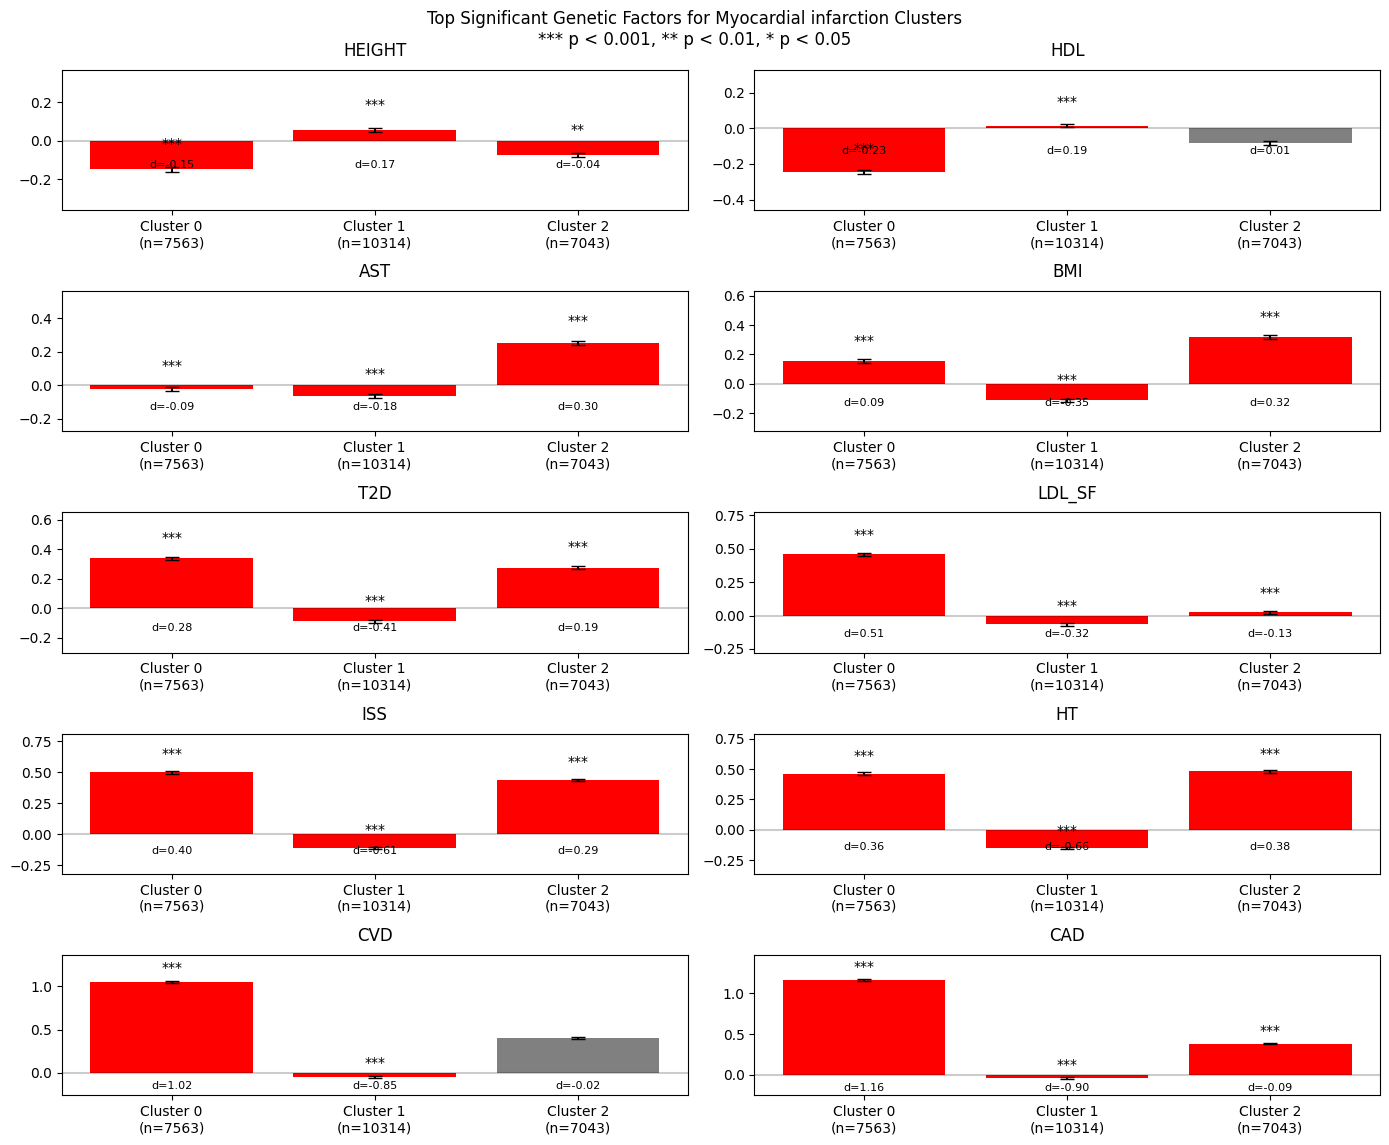

In [32]:
import os
results = compare_disease_vs_population_clusters(
    disease_idx=112,  # e.g., for MI
    n_clusters=3,
    n_batches=40,
    prs_names_file='prs_names.csv',  # Update this path to your actual prs_names.csv location
    heatmap_output_path='disease_112_comparison.pdf'
)

Starting genetic data analysis for disease 66...
Loaded 36 PRS names from /Users/sarahurbut/Dropbox/prs_names.csv

Loading batch 1 model for reference...
Analyzing Major depressive disorder

Processing batch 1/40 (patients 0-10000)
Found 723 patients in batch 1

Processing batch 2/40 (patients 10000-20000)


/Users/sarahurbut/aladynoulli2/pyScripts/fig4_utils.py:64: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model1 = torch.load(model_path)
/Users/sarahurbut/aladynoulli2/pyScr

Found 744 patients in batch 2

Processing batch 3/40 (patients 20000-30000)
Found 716 patients in batch 3

Processing batch 4/40 (patients 30000-40000)
Found 782 patients in batch 4

Processing batch 5/40 (patients 40000-50000)
Found 770 patients in batch 5

Processing batch 6/40 (patients 50000-60000)
Found 798 patients in batch 6

Processing batch 7/40 (patients 60000-70000)
Found 801 patients in batch 7

Processing batch 8/40 (patients 70000-80000)
Found 771 patients in batch 8

Processing batch 9/40 (patients 80000-90000)
Found 753 patients in batch 9

Processing batch 10/40 (patients 90000-100000)
Found 788 patients in batch 10

Processing batch 11/40 (patients 100000-110000)
Found 775 patients in batch 11

Processing batch 12/40 (patients 110000-120000)
Found 771 patients in batch 12

Processing batch 13/40 (patients 120000-130000)
Found 806 patients in batch 13

Processing batch 14/40 (patients 130000-140000)
Found 719 patients in batch 14

Processing batch 15/40 (patients 14000

/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid value encountered in m

Saved heatmap to heatmap_disease_66.pdf
Starting genetic data analysis for disease 112...
Loaded 36 PRS names from /Users/sarahurbut/Dropbox/prs_names.csv

Loading batch 1 model for reference...
Analyzing Myocardial infarction

Processing batch 1/40 (patients 0-10000)
Found 635 patients in batch 1

Processing batch 2/40 (patients 10000-20000)


/Users/sarahurbut/aladynoulli2/pyScripts/fig4_utils.py:64: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model1 = torch.load(model_path)
/Users/sarahurbut/aladynoulli2/pyScr

Found 628 patients in batch 2

Processing batch 3/40 (patients 20000-30000)
Found 617 patients in batch 3

Processing batch 4/40 (patients 30000-40000)
Found 601 patients in batch 4

Processing batch 5/40 (patients 40000-50000)
Found 663 patients in batch 5

Processing batch 6/40 (patients 50000-60000)
Found 624 patients in batch 6

Processing batch 7/40 (patients 60000-70000)
Found 613 patients in batch 7

Processing batch 8/40 (patients 70000-80000)
Found 605 patients in batch 8

Processing batch 9/40 (patients 80000-90000)
Found 614 patients in batch 9

Processing batch 10/40 (patients 90000-100000)
Found 592 patients in batch 10

Processing batch 11/40 (patients 100000-110000)
Found 637 patients in batch 11

Processing batch 12/40 (patients 110000-120000)
Found 604 patients in batch 12

Processing batch 13/40 (patients 120000-130000)
Found 613 patients in batch 13

Processing batch 14/40 (patients 130000-140000)
Found 629 patients in batch 14

Processing batch 15/40 (patients 14000

/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid value encountered in m

Saved heatmap to heatmap_disease_112.pdf
Starting genetic data analysis for disease 17...
Loaded 36 PRS names from /Users/sarahurbut/Dropbox/prs_names.csv

Loading batch 1 model for reference...
Analyzing Malignant neoplasm of female breast

Processing batch 1/40 (patients 0-10000)


/Users/sarahurbut/aladynoulli2/pyScripts/fig4_utils.py:64: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model1 = torch.load(model_path)
/Users/sarahurbut/aladynoulli2/pyScr

Found 423 patients in batch 1

Processing batch 2/40 (patients 10000-20000)
Found 401 patients in batch 2

Processing batch 3/40 (patients 20000-30000)
Found 409 patients in batch 3

Processing batch 4/40 (patients 30000-40000)
Found 454 patients in batch 4

Processing batch 5/40 (patients 40000-50000)
Found 464 patients in batch 5

Processing batch 6/40 (patients 50000-60000)
Found 419 patients in batch 6

Processing batch 7/40 (patients 60000-70000)
Found 461 patients in batch 7

Processing batch 8/40 (patients 70000-80000)
Found 424 patients in batch 8

Processing batch 9/40 (patients 80000-90000)
Found 471 patients in batch 9

Processing batch 10/40 (patients 90000-100000)
Found 408 patients in batch 10

Processing batch 11/40 (patients 100000-110000)
Found 464 patients in batch 11

Processing batch 12/40 (patients 110000-120000)
Found 457 patients in batch 12

Processing batch 13/40 (patients 120000-130000)
Found 443 patients in batch 13

Processing batch 14/40 (patients 130000-14

/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid value encountered in m

Using Bonferroni threshold: 6.61e-05
Saved heatmap to heatmap_disease_17.pdf
Starting genetic data analysis for disease 19...
Loaded 36 PRS names from /Users/sarahurbut/Dropbox/prs_names.csv

Loading batch 1 model for reference...
Analyzing Malignant neoplasm of uterus

Processing batch 1/40 (patients 0-10000)


/Users/sarahurbut/aladynoulli2/pyScripts/fig4_utils.py:64: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model1 = torch.load(model_path)
/Users/sarahurbut/aladynoulli2/pyScr

Found 56 patients in batch 1

Processing batch 2/40 (patients 10000-20000)
Found 63 patients in batch 2

Processing batch 3/40 (patients 20000-30000)
Found 70 patients in batch 3

Processing batch 4/40 (patients 30000-40000)
Found 65 patients in batch 4

Processing batch 5/40 (patients 40000-50000)
Found 61 patients in batch 5

Processing batch 6/40 (patients 50000-60000)
Found 77 patients in batch 6

Processing batch 7/40 (patients 60000-70000)
Found 60 patients in batch 7

Processing batch 8/40 (patients 70000-80000)
Found 63 patients in batch 8

Processing batch 9/40 (patients 80000-90000)
Found 63 patients in batch 9

Processing batch 10/40 (patients 90000-100000)
Found 55 patients in batch 10

Processing batch 11/40 (patients 100000-110000)
Found 74 patients in batch 11

Processing batch 12/40 (patients 110000-120000)
Found 68 patients in batch 12

Processing batch 13/40 (patients 120000-130000)
Found 58 patients in batch 13

Processing batch 14/40 (patients 130000-140000)
Found 6

/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid value encountered in m

Saved heatmap to heatmap_disease_19.pdf
Starting genetic data analysis for disease 127...
Loaded 36 PRS names from /Users/sarahurbut/Dropbox/prs_names.csv

Loading batch 1 model for reference...
Analyzing Atrial fibrillation and flutter

Processing batch 1/40 (patients 0-10000)
Found 518 patients in batch 1

Processing batch 2/40 (patients 10000-20000)


/Users/sarahurbut/aladynoulli2/pyScripts/fig4_utils.py:64: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model1 = torch.load(model_path)
/Users/sarahurbut/aladynoulli2/pyScr

Found 528 patients in batch 2

Processing batch 3/40 (patients 20000-30000)
Found 493 patients in batch 3

Processing batch 4/40 (patients 30000-40000)
Found 516 patients in batch 4

Processing batch 5/40 (patients 40000-50000)
Found 534 patients in batch 5

Processing batch 6/40 (patients 50000-60000)
Found 487 patients in batch 6

Processing batch 7/40 (patients 60000-70000)
Found 528 patients in batch 7

Processing batch 8/40 (patients 70000-80000)
Found 531 patients in batch 8

Processing batch 9/40 (patients 80000-90000)
Found 481 patients in batch 9

Processing batch 10/40 (patients 90000-100000)
Found 489 patients in batch 10

Processing batch 11/40 (patients 100000-110000)
Found 504 patients in batch 11

Processing batch 12/40 (patients 110000-120000)
Found 507 patients in batch 12

Processing batch 13/40 (patients 120000-130000)
Found 525 patients in batch 13

Processing batch 14/40 (patients 130000-140000)
Found 570 patients in batch 14

Processing batch 15/40 (patients 14000

/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid value encountered in m

Saved heatmap to heatmap_disease_127.pdf
Starting genetic data analysis for disease 76...
Loaded 36 PRS names from /Users/sarahurbut/Dropbox/prs_names.csv

Loading batch 1 model for reference...
Analyzing Migraine

Processing batch 1/40 (patients 0-10000)


/Users/sarahurbut/aladynoulli2/pyScripts/fig4_utils.py:64: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model1 = torch.load(model_path)
/Users/sarahurbut/aladynoulli2/pyScr

Found 168 patients in batch 1

Processing batch 2/40 (patients 10000-20000)
Found 174 patients in batch 2

Processing batch 3/40 (patients 20000-30000)
Found 182 patients in batch 3

Processing batch 4/40 (patients 30000-40000)
Found 184 patients in batch 4

Processing batch 5/40 (patients 40000-50000)
Found 189 patients in batch 5

Processing batch 6/40 (patients 50000-60000)
Found 177 patients in batch 6

Processing batch 7/40 (patients 60000-70000)
Found 188 patients in batch 7

Processing batch 8/40 (patients 70000-80000)
Found 178 patients in batch 8

Processing batch 9/40 (patients 80000-90000)
Found 188 patients in batch 9

Processing batch 10/40 (patients 90000-100000)
Found 205 patients in batch 10

Processing batch 11/40 (patients 100000-110000)
Found 173 patients in batch 11

Processing batch 12/40 (patients 110000-120000)
Found 175 patients in batch 12

Processing batch 13/40 (patients 120000-130000)
Found 182 patients in batch 13

Processing batch 14/40 (patients 130000-14

/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid value encountered in m

Saved heatmap to heatmap_disease_76.pdf
Starting genetic data analysis for disease 73...
Loaded 36 PRS names from /Users/sarahurbut/Dropbox/prs_names.csv

Loading batch 1 model for reference...
Analyzing Parkinson's disease

Processing batch 1/40 (patients 0-10000)


/Users/sarahurbut/aladynoulli2/pyScripts/fig4_utils.py:64: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model1 = torch.load(model_path)
/Users/sarahurbut/aladynoulli2/pyScr

Found 94 patients in batch 1

Processing batch 2/40 (patients 10000-20000)
Found 97 patients in batch 2

Processing batch 3/40 (patients 20000-30000)
Found 94 patients in batch 3

Processing batch 4/40 (patients 30000-40000)
Found 93 patients in batch 4

Processing batch 5/40 (patients 40000-50000)
Found 101 patients in batch 5

Processing batch 6/40 (patients 50000-60000)
Found 104 patients in batch 6

Processing batch 7/40 (patients 60000-70000)
Found 98 patients in batch 7

Processing batch 8/40 (patients 70000-80000)
Found 98 patients in batch 8

Processing batch 9/40 (patients 80000-90000)
Found 108 patients in batch 9

Processing batch 10/40 (patients 90000-100000)
Found 104 patients in batch 10

Processing batch 11/40 (patients 100000-110000)
Found 112 patients in batch 11

Processing batch 12/40 (patients 110000-120000)
Found 94 patients in batch 12

Processing batch 13/40 (patients 120000-130000)
Found 95 patients in batch 13

Processing batch 14/40 (patients 130000-140000)
Fo

/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid value encountered in m

Saved heatmap to heatmap_disease_73.pdf
Starting genetic data analysis for disease 85...
Loaded 36 PRS names from /Users/sarahurbut/Dropbox/prs_names.csv

Loading batch 1 model for reference...
Analyzing Macular degeneration (senile) of retina NOS

Processing batch 1/40 (patients 0-10000)
Found 272 patients in batch 1

Processing batch 2/40 (patients 10000-20000)


/Users/sarahurbut/aladynoulli2/pyScripts/fig4_utils.py:64: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model1 = torch.load(model_path)
/Users/sarahurbut/aladynoulli2/pyScr

Found 271 patients in batch 2

Processing batch 3/40 (patients 20000-30000)
Found 224 patients in batch 3

Processing batch 4/40 (patients 30000-40000)
Found 242 patients in batch 4

Processing batch 5/40 (patients 40000-50000)
Found 270 patients in batch 5

Processing batch 6/40 (patients 50000-60000)
Found 254 patients in batch 6

Processing batch 7/40 (patients 60000-70000)
Found 261 patients in batch 7

Processing batch 8/40 (patients 70000-80000)
Found 234 patients in batch 8

Processing batch 9/40 (patients 80000-90000)
Found 221 patients in batch 9

Processing batch 10/40 (patients 90000-100000)
Found 246 patients in batch 10

Processing batch 11/40 (patients 100000-110000)
Found 263 patients in batch 11

Processing batch 12/40 (patients 110000-120000)
Found 274 patients in batch 12

Processing batch 13/40 (patients 120000-130000)
Found 247 patients in batch 13

Processing batch 14/40 (patients 130000-140000)
Found 226 patients in batch 14

Processing batch 15/40 (patients 14000

/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid value encountered in m

Saved heatmap to heatmap_disease_85.pdf


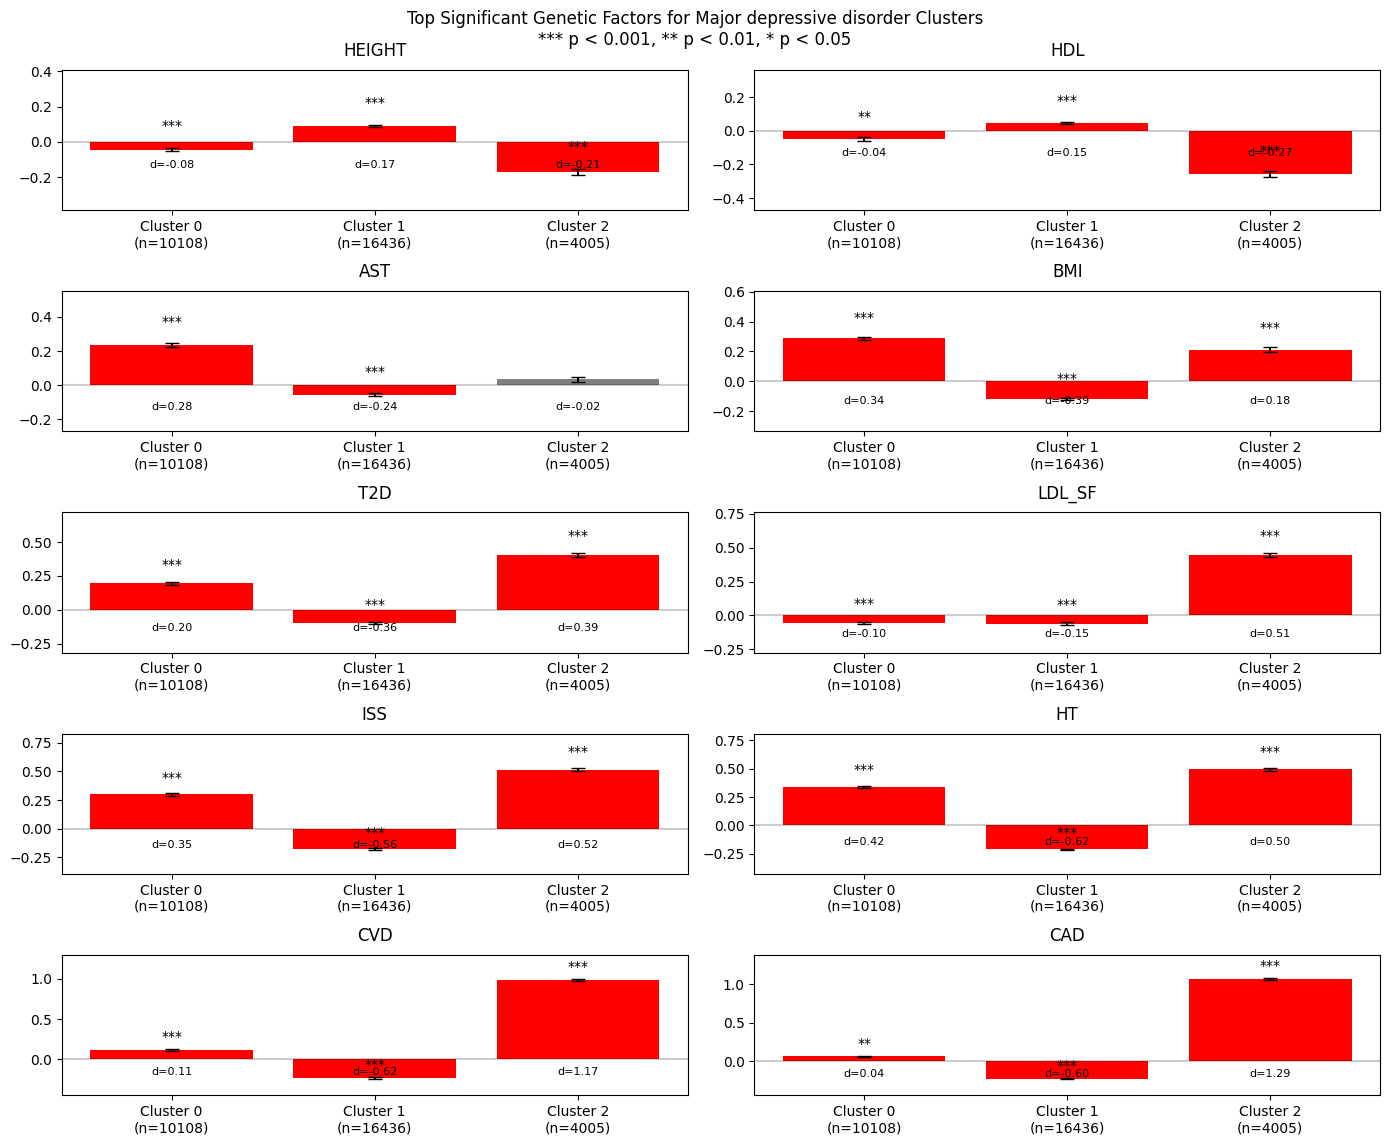

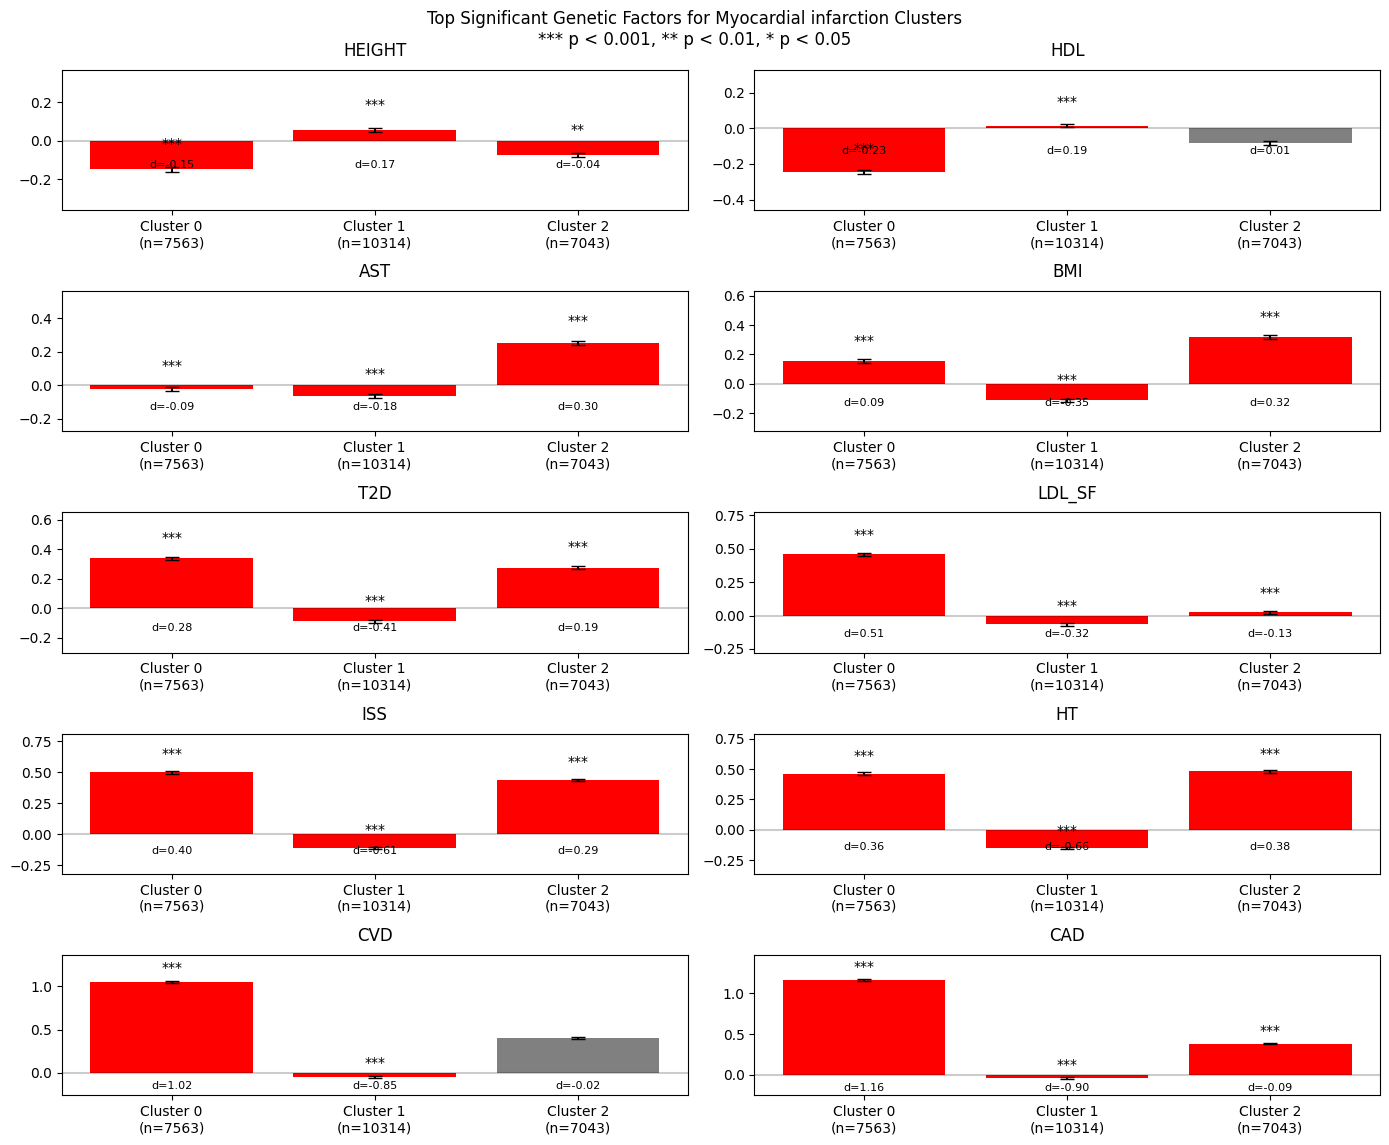

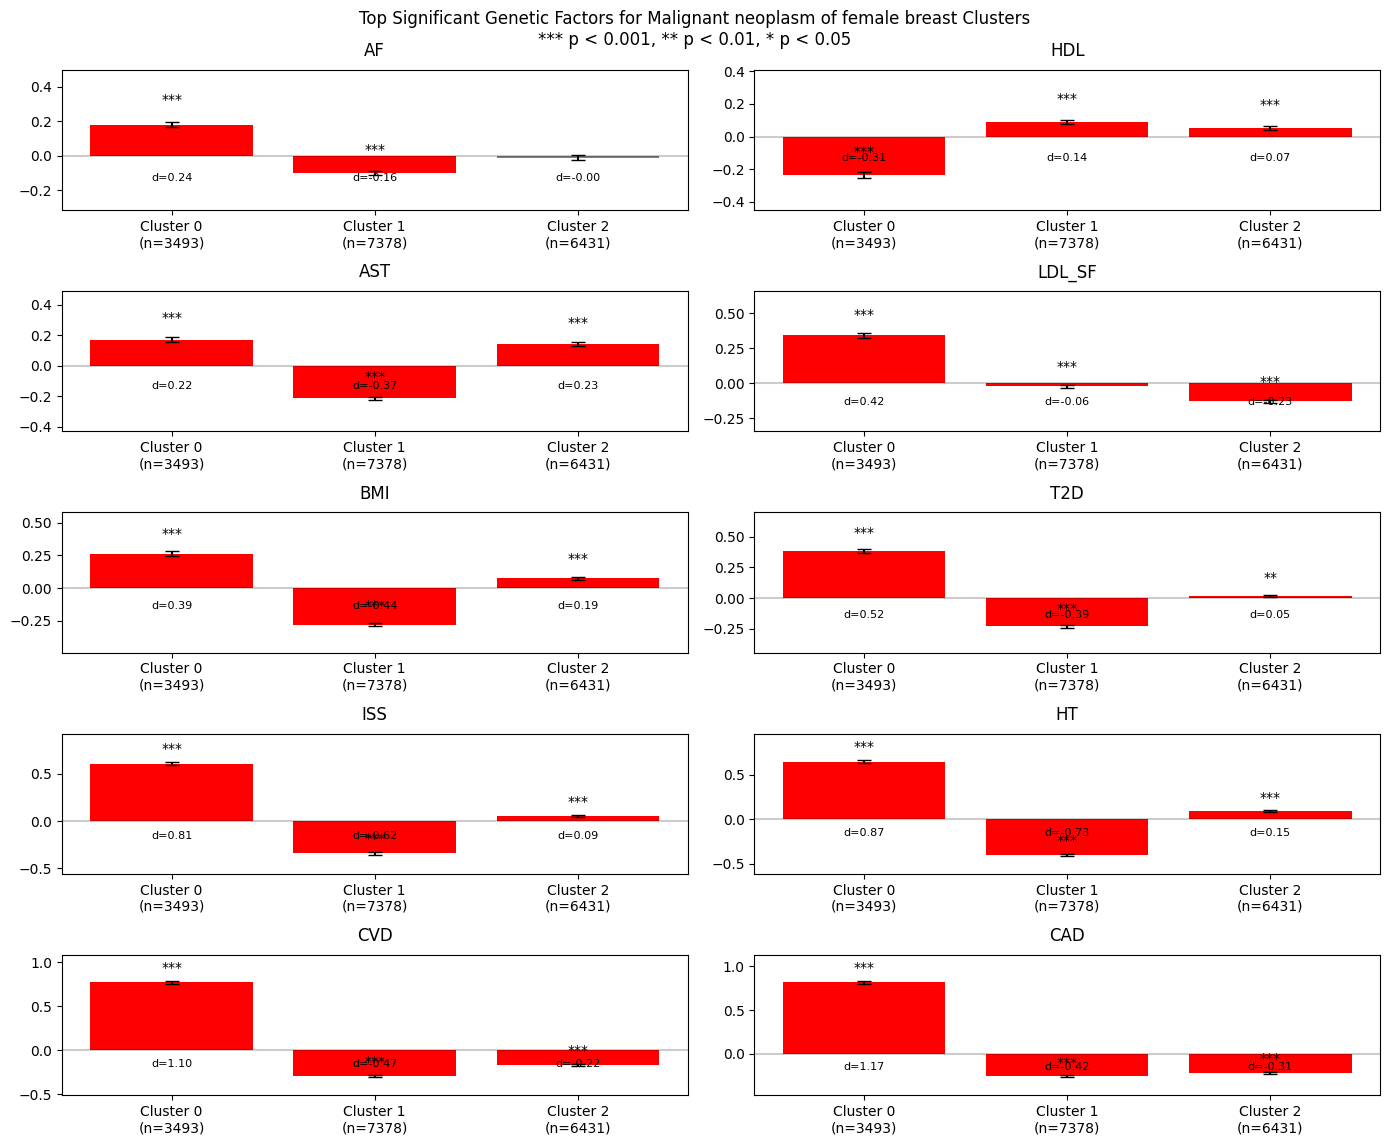

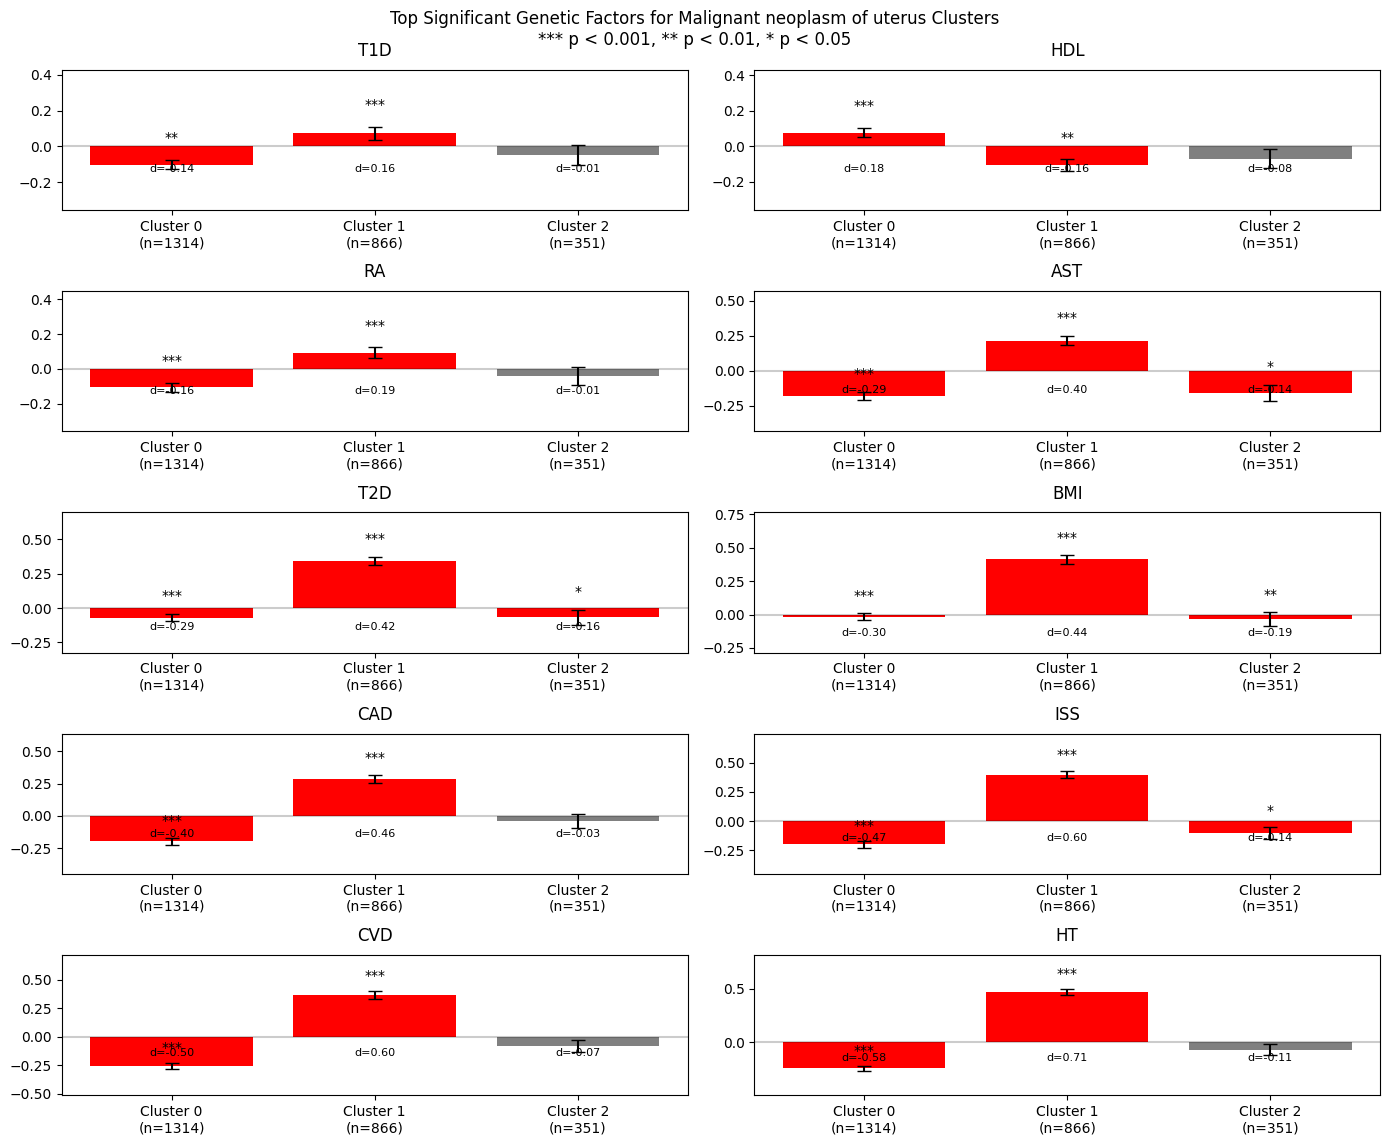

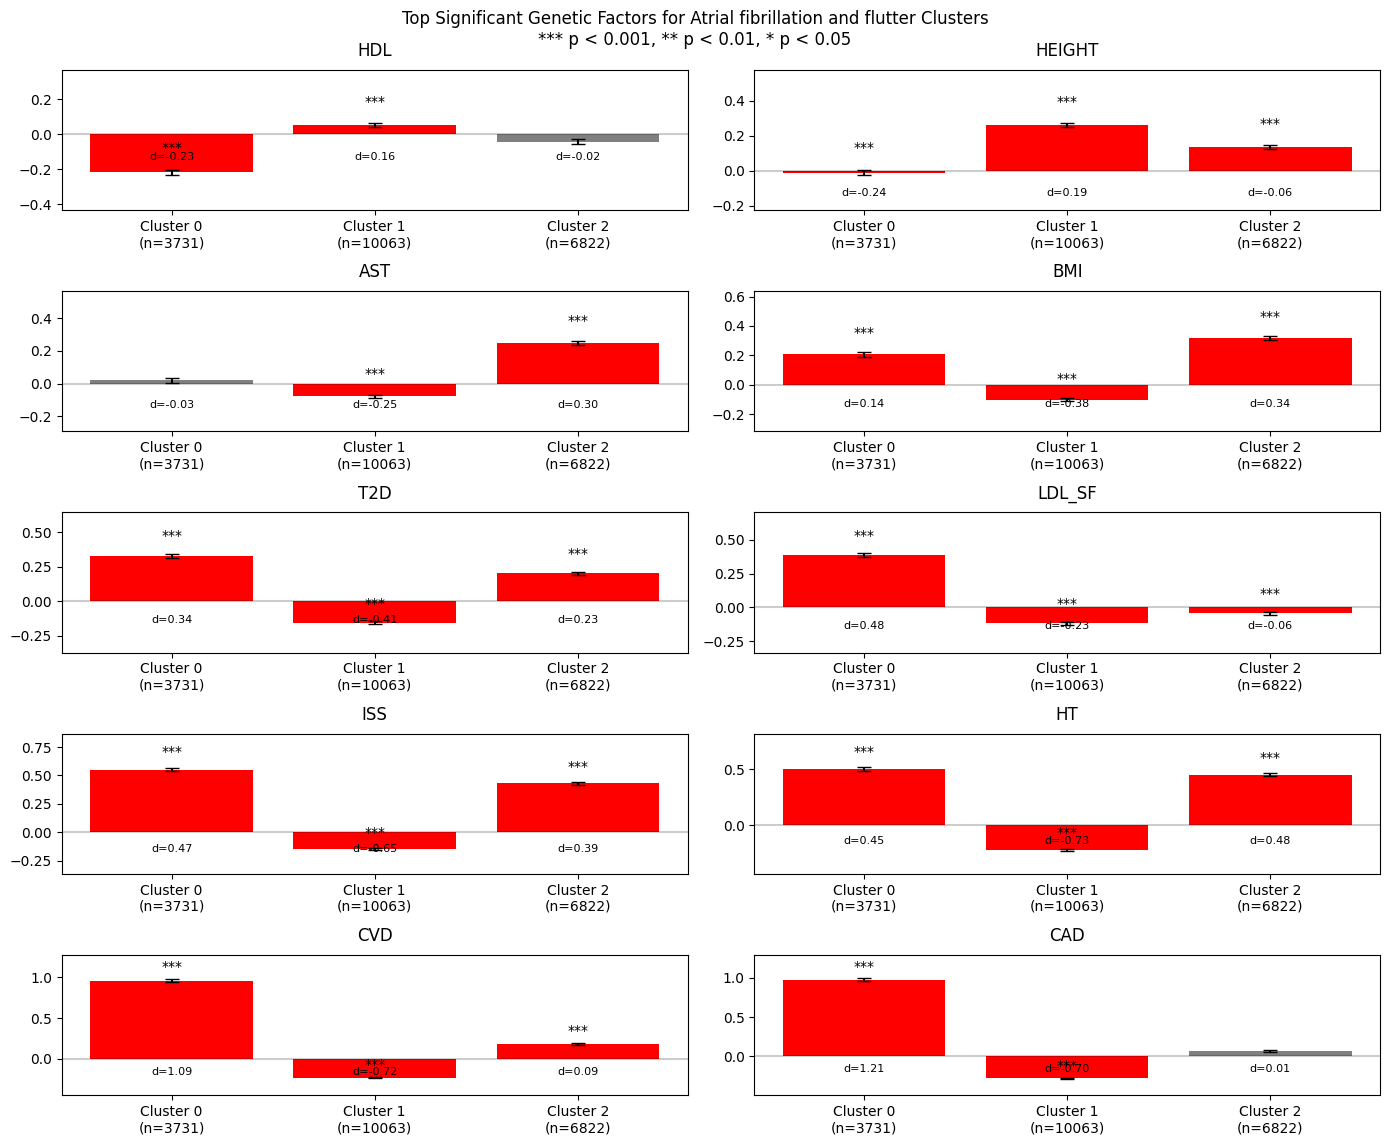

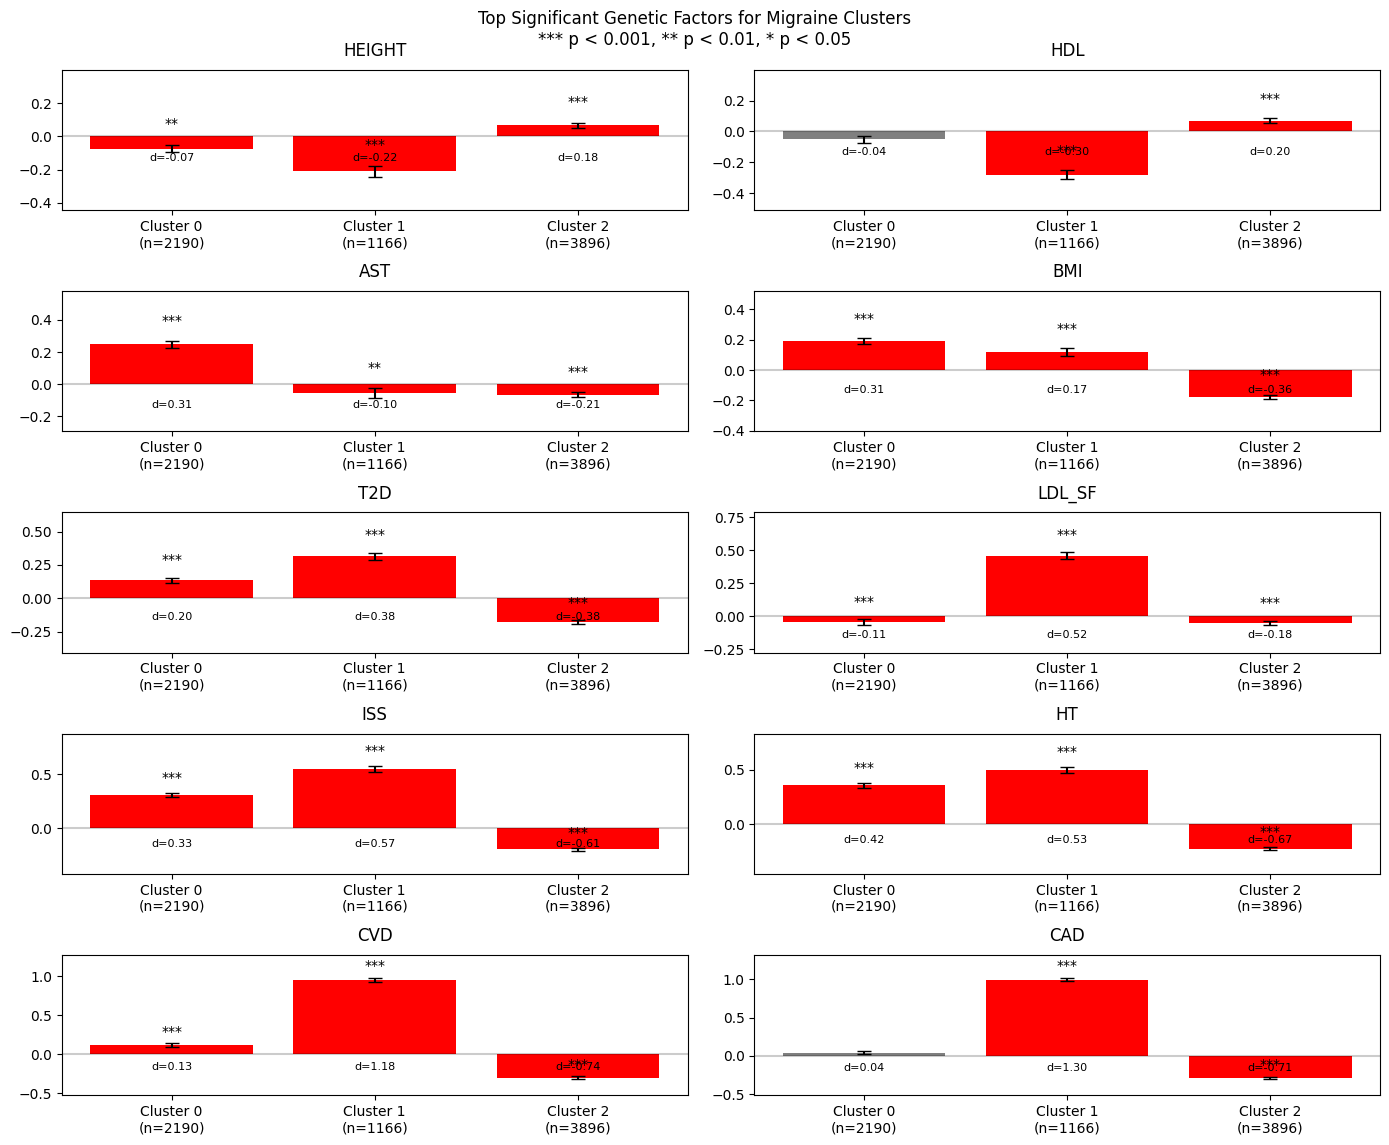

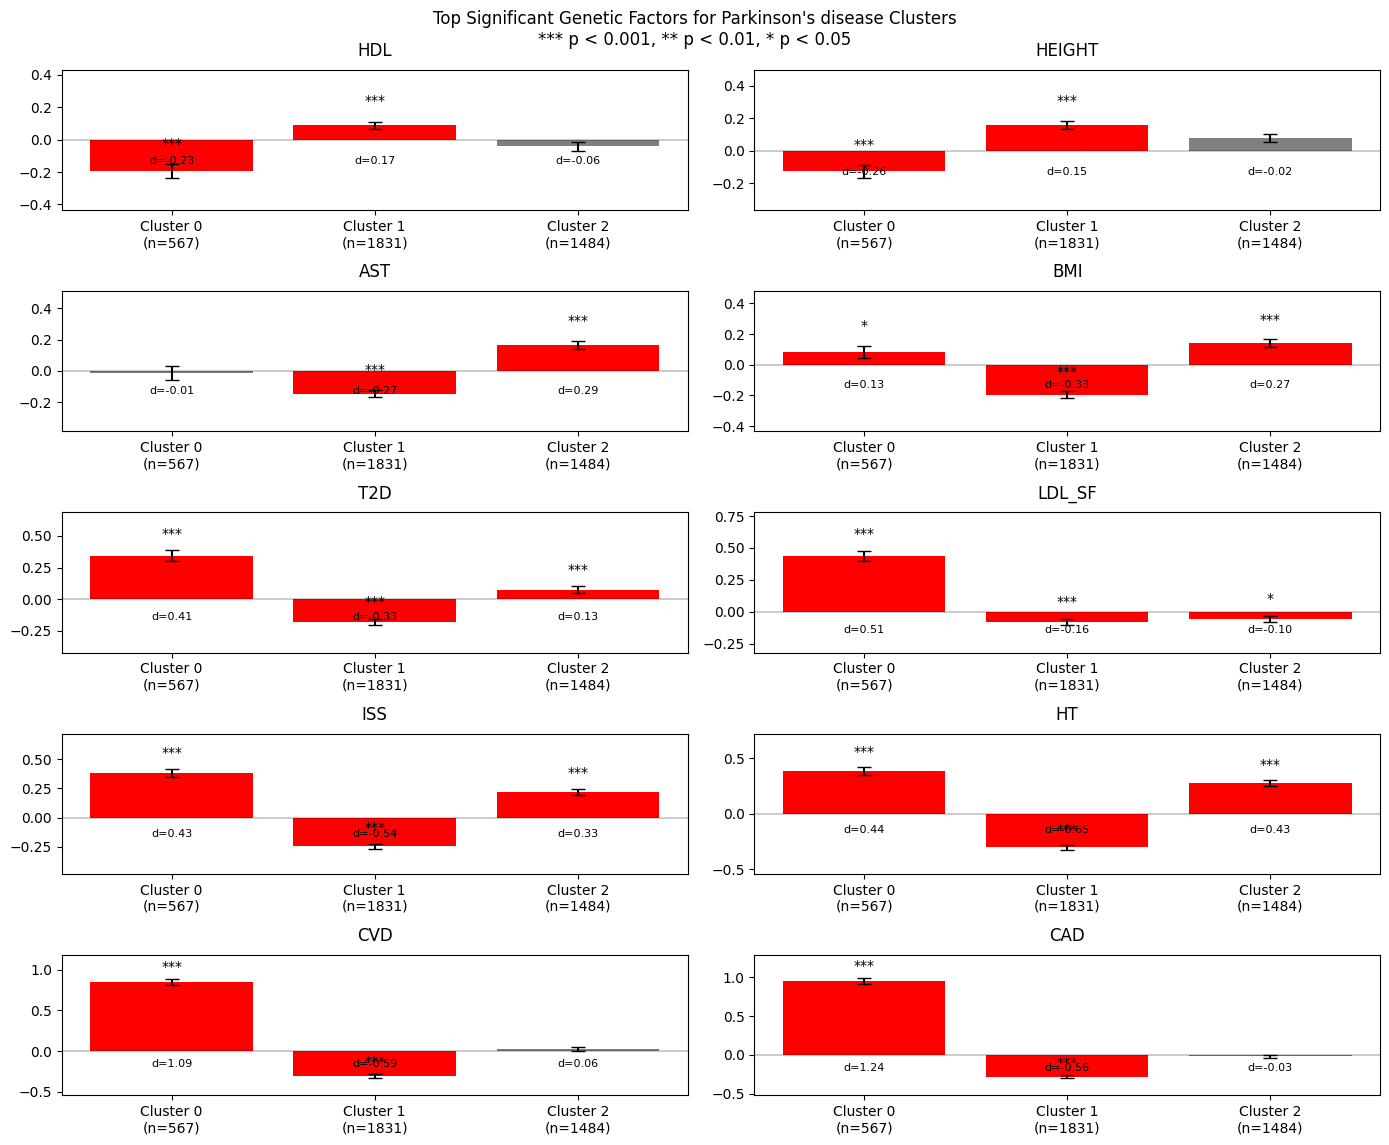

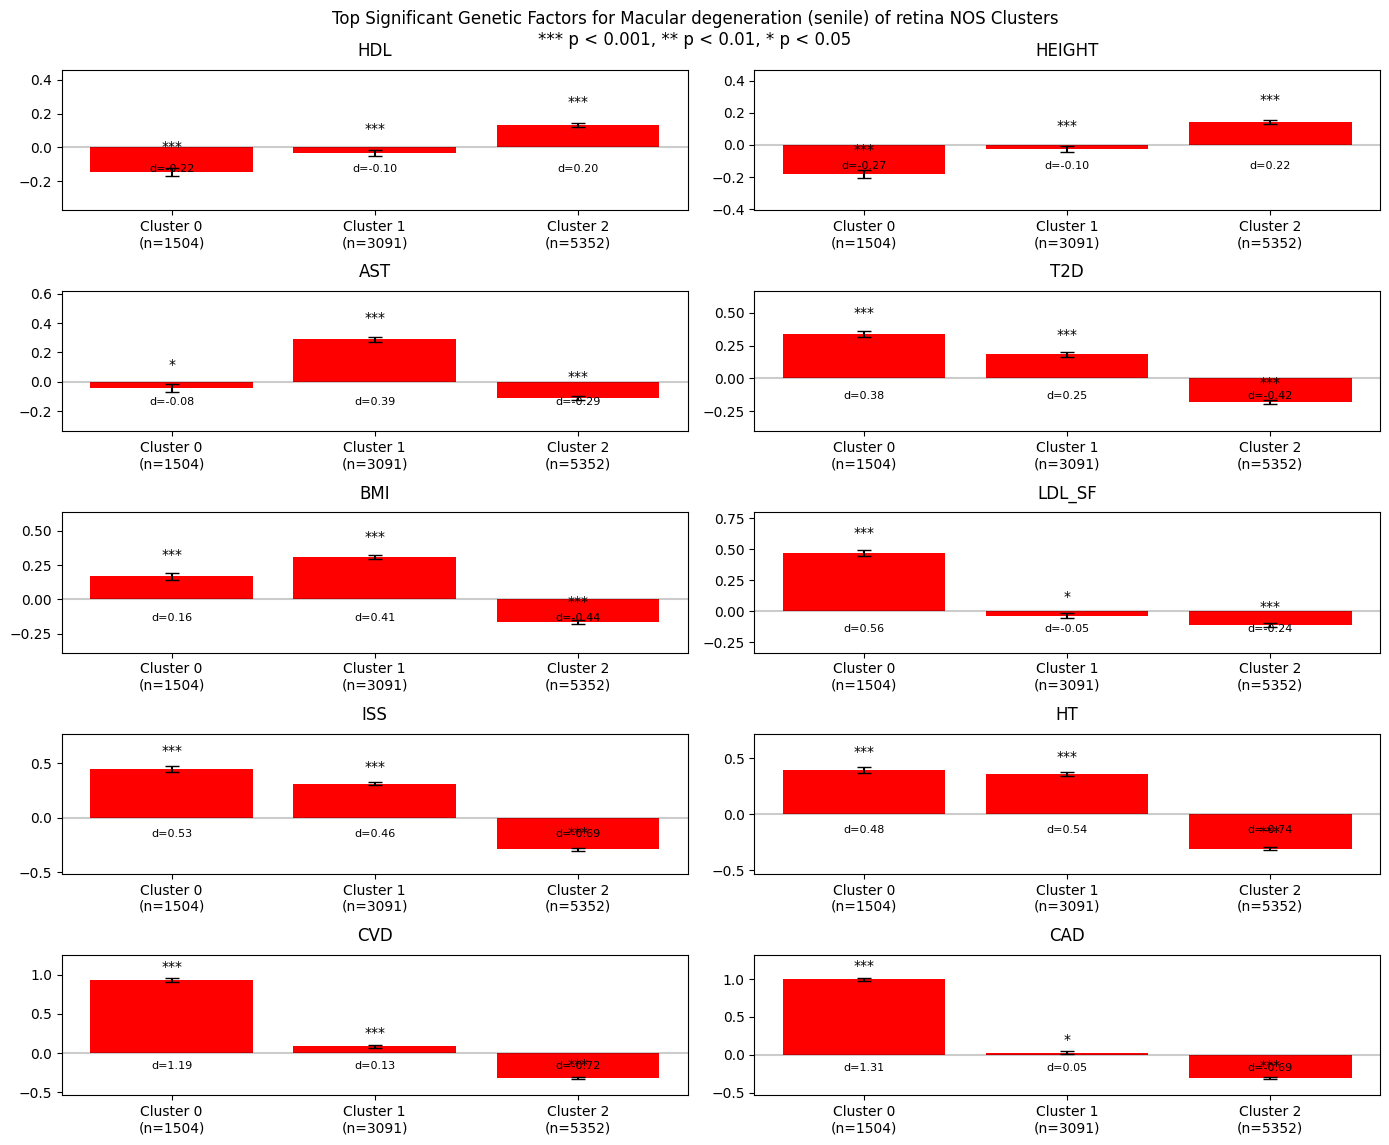

In [22]:
# Analyze multiple diseases
diseases_to_analyze = [66,112,17,19,127,76,73,85]  # Example disease indices
results = {}

for disease_idx in diseases_to_analyze:
    result = analyze_genetic_data_by_cluster(
        disease_idx=disease_idx,
        prs_names_file='/Users/sarahurbut/Dropbox/prs_names.csv',
        heatmap_output_path=f'heatmap_disease_{disease_idx}.pdf',n_batches=40
    )
    results[disease_idx] = result

In [23]:
genetic_results

{'genetic_by_cluster': {0: array([[-0.20256291,  1.459674  , -0.04976368, ..., -0.12014839,
           1.6938651 , -1.6347945 ],
         [-0.00941439,  1.1552274 , -0.40462452, ..., -0.85424024,
           0.12742211, -1.5783113 ],
         [ 0.1988859 , -0.8637092 ,  0.41183406, ...,  0.99508667,
           0.48462424,  1.7767055 ],
         ...,
         [-0.31495836, -0.48401552, -0.7949136 , ...,  0.7036128 ,
           0.32512975, -0.09204724],
         [-1.0819769 ,  0.5506451 ,  0.7543337 , ..., -0.35096037,
           0.18240239, -0.00335429],
         [ 0.40860665, -1.3289487 , -1.3760487 , ...,  0.39967582,
           0.23844405, -0.86605525]], dtype=float32),
  1: array([[-1.6612308 , -2.0940378 ,  0.9324274 , ...,  1.2833942 ,
           0.78410727,  0.07459644],
         [ 1.7990862 , -0.9124183 , -0.51037073, ...,  0.9163379 ,
           0.9510628 , -0.635922  ],
         [-1.2434218 ,  1.1604239 ,  0.2364336 , ..., -0.87489283,
          -1.4046302 , -1.6056306 ],
     

In [11]:
print(genetic_results['genetic_df'].head())

  Factor  Cluster  Mean_Value   P_Value  P_Value_Corrected  Effect_Size  \
0    AAM        0    0.016661  0.001932           0.005962     0.071066   
1    AAM        1    0.013751  0.019933           0.048927    -0.055549   
2    AAM        2    0.022742  0.173613           0.297623    -0.049064   
3    AMD        0   -0.057924  0.161371           0.295390     0.032092   
4    AMD        1   -0.062410  0.123400           0.233810    -0.036765   

   Significant  
0         True  
1         True  
2        False  
3        False  
4        False  


In [ ]:
print(genetic_results['genetic_df'].head())

  Factor  Cluster  Mean_Value   P_Value  P_Value_Corrected  Effect_Size  \
0    AAM        0    0.016661  0.001932           0.005962     0.071066   
1    AAM        1    0.013751  0.019933           0.048927    -0.055549   
2    AAM        2    0.022742  0.173613           0.297623    -0.049064   
3    AMD        0   -0.057924  0.161371           0.295390     0.032092   
4    AMD        1   -0.062410  0.123400           0.233810    -0.036765   

   Significant  
0         True  
1         True  
2        False  
3        False  
4        False  


In [ ]:
print(genetic_results['genetic_df'].head())

  Factor  Cluster  Mean_Value   P_Value  P_Value_Corrected  Effect_Size  \
0    AAM        0    0.016661  0.001932           0.005962     0.071066   
1    AAM        1    0.013751  0.019933           0.048927    -0.055549   
2    AAM        2    0.022742  0.173613           0.297623    -0.049064   
3    AMD        0   -0.057924  0.161371           0.295390     0.032092   
4    AMD        1   -0.062410  0.123400           0.233810    -0.036765   

   Significant  
0         True  
1         True  
2        False  
3        False  
4        False  


Starting genetic data analysis for disease 112...
Loaded 36 PRS names from ~/Dropbox/prs_names.csv

Loading batch 1 model for reference...
Analyzing Myocardial infarction

Processing batch 1/10 (patients 0-10000)
Found 635 patients in batch 1

Processing batch 2/10 (patients 10000-20000)


/Users/sarahurbut/aladynoulli2/pyScripts/fig4_utils.py:64: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  disease_names = model1['disease_names'][0].tolist()
/Users/sarahurbu

Found 628 patients in batch 2

Processing batch 3/10 (patients 20000-30000)
Found 617 patients in batch 3

Processing batch 4/10 (patients 30000-40000)
Found 601 patients in batch 4

Processing batch 5/10 (patients 40000-50000)
Found 663 patients in batch 5

Processing batch 6/10 (patients 50000-60000)
Found 624 patients in batch 6

Processing batch 7/10 (patients 60000-70000)
Found 613 patients in batch 7

Processing batch 8/10 (patients 70000-80000)
Found 605 patients in batch 8

Processing batch 9/10 (patients 80000-90000)
Found 614 patients in batch 9

Processing batch 10/10 (patients 90000-100000)
Found 592 patients in batch 10

Total patients with Myocardial infarction: 6192

Performing clustering with 3 clusters...
Using Bonferroni threshold: 6.61e-05


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid value encountered in m

Saved heatmap to /Users/sarahurbut/aladynoulli2/pyScripts/figures_for_science/figure4/fig4_genetic_heatmap_traj_MI.pdf

Top genetic factors for Cluster 0:
    Factor  Mean_Value  Effect_Size  P_Value_Corrected
33     CAD   -0.083047    -1.253304       0.000000e+00
27     CVD    0.035022    -1.053860       0.000000e+00
54      HT    0.607874    -0.513971       3.236257e-83
63  LDL_SF   -0.008795    -0.510962       2.328884e-82
60     ISS   -0.070493    -0.476020       6.552012e-72

Top genetic factors for Cluster 1:
    Factor  Mean_Value  Effect_Size  P_Value_Corrected
34     CAD   -0.004524     1.300341       0.000000e+00
28     CVD   -0.013235     1.140600      1.762039e-249
64  LDL_SF    0.054544     0.537824       2.751338e-60
61     ISS   -0.055448     0.526848       5.578909e-58
55      HT   -0.023594     0.504490       2.105781e-53

Top genetic factors for Cluster 2:
     Factor  Mean_Value  Effect_Size  P_Value_Corrected
35      CAD    0.015284     0.314922       8.469685e-33
2

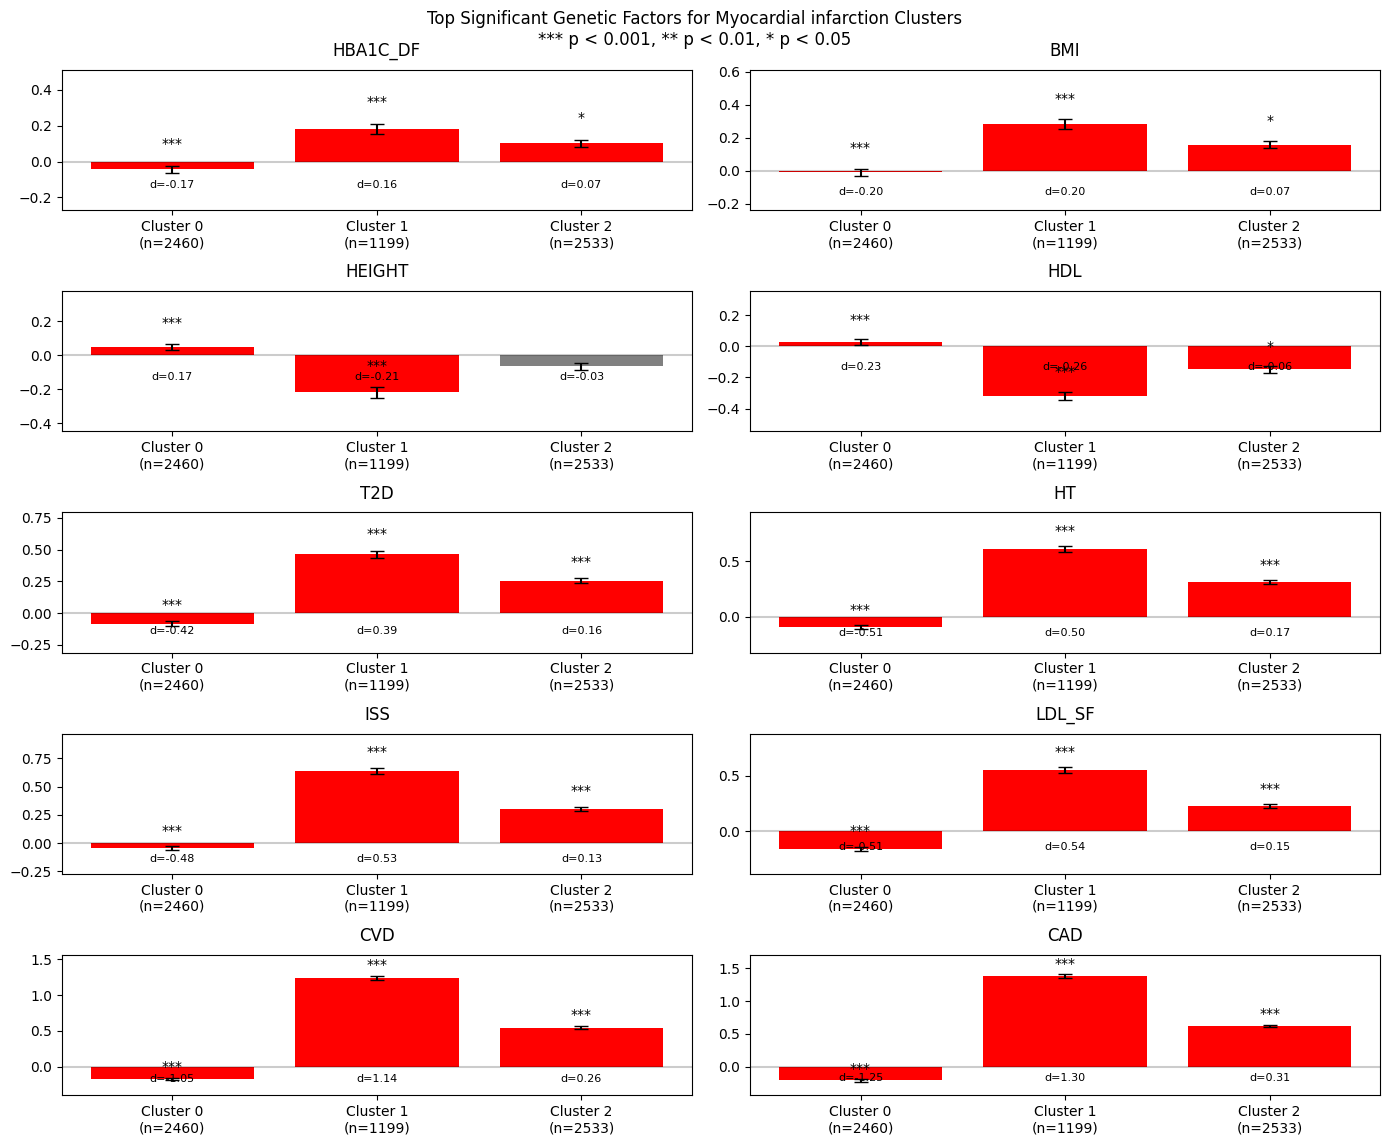

In [10]:
# For myocardial infarction (disease index 66)
genetic_results = analyze_genetic_data_by_cluster(112, n_clusters=3, 
                                                 prs_names_file='~/Dropbox/prs_names.csv',
                                                 heatmap_output_path="/Users/sarahurbut/aladynoulli2/pyScripts/figures_for_science/figure4/fig4_genetic_heatmap_traj_MI.pdf")

# To find the most significant genetic factors for each cluster
for cluster in range(3):
    print(f"\nTop genetic factors for Cluster {cluster}:")
    cluster_results = genetic_results['genetic_df'][
        (genetic_results['genetic_df']['Cluster'] == cluster) & 
        (genetic_results['genetic_df']['Significant'])
    ].sort_values('Effect_Size', key=abs, ascending=False)
    
    if len(cluster_results) > 0:
        print(cluster_results[['Factor', 'Mean_Value', 'Effect_Size', 'P_Value_Corrected']].head(5))
    else:
        print("No significant factors found")

Starting genetic data analysis for disease 17...
Loaded 36 PRS names from ~/Dropbox/prs_names.csv

Loading batch 1 model for reference...
Analyzing Malignant neoplasm of female breast

Processing batch 1/10 (patients 0-10000)
Found 423 patients in batch 1

Processing batch 2/10 (patients 10000-20000)


/Users/sarahurbut/aladynoulli2/pyScripts/fig4_utils.py:64: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  disease_names = model1['disease_names'][0].tolist()
/Users/sarahurbu

Found 401 patients in batch 2

Processing batch 3/10 (patients 20000-30000)
Found 409 patients in batch 3

Processing batch 4/10 (patients 30000-40000)
Found 454 patients in batch 4

Processing batch 5/10 (patients 40000-50000)
Found 464 patients in batch 5

Processing batch 6/10 (patients 50000-60000)
Found 419 patients in batch 6

Processing batch 7/10 (patients 60000-70000)
Found 461 patients in batch 7

Processing batch 8/10 (patients 70000-80000)
Found 424 patients in batch 8

Processing batch 9/10 (patients 80000-90000)
Found 471 patients in batch 9

Processing batch 10/10 (patients 90000-100000)
Found 408 patients in batch 10

Total patients with Malignant neoplasm of female breast: 4334

Performing clustering with 3 clusters...
Using Bonferroni threshold: 6.61e-05


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid value encountered in m

Saved heatmap to /Users/sarahurbut/aladynoulli2/pyScripts/figures_for_science/figure4/fig4_genetic_heatmap_traj_BC.pdf

Top genetic factors for Cluster 0:
   Factor  Mean_Value  Effect_Size  P_Value_Corrected
54     HT   -0.272499     0.824957      6.235801e-136
33    CAD    0.221610     0.682547       2.062511e-95
27    CVD    0.028632     0.669398       3.984867e-92
60    ISS   -0.028178     0.663321       1.140426e-90
18    BMI    0.498862     0.451067       1.441125e-43

Top genetic factors for Cluster 1:
   Factor  Mean_Value  Effect_Size  P_Value_Corrected
55     HT   -0.038054    -0.627263       2.410809e-88
28    CVD    0.044310    -0.539366       2.567844e-66
34    CAD   -0.052771    -0.534370       3.266525e-65
61    ISS    0.055700    -0.523486       9.450869e-63
19    BMI   -0.008431    -0.329947       6.434545e-26

Top genetic factors for Cluster 2:
    Factor  Mean_Value  Effect_Size  P_Value_Corrected
23     CRC   -0.045743     0.479134       1.439930e-20
38      CD    0

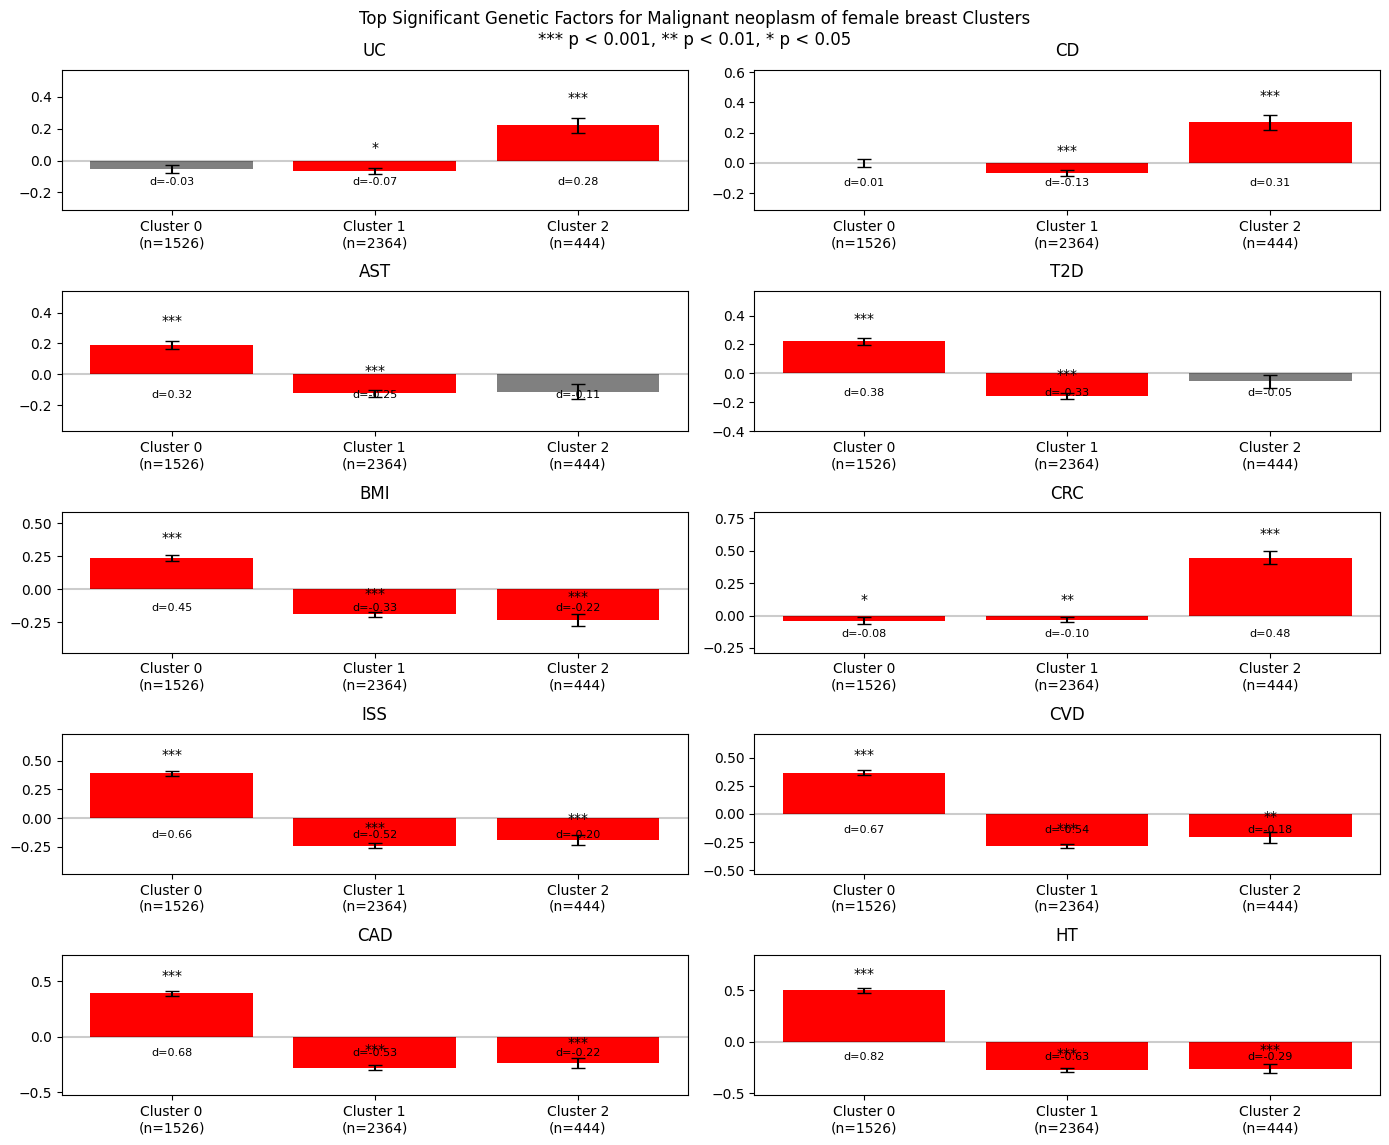

In [9]:
# For myocardial infarction (disease index 66)
genetic_results = analyze_genetic_data_by_cluster(17, n_clusters=3, 
                                                 prs_names_file='~/Dropbox/prs_names.csv',
                                                 heatmap_output_path="/Users/sarahurbut/aladynoulli2/pyScripts/figures_for_science/figure4/fig4_genetic_heatmap_traj_BC.pdf")

# To find the most significant genetic factors for each cluster
for cluster in range(3):
    print(f"\nTop genetic factors for Cluster {cluster}:")
    cluster_results = genetic_results['genetic_df'][
        (genetic_results['genetic_df']['Cluster'] == cluster) & 
        (genetic_results['genetic_df']['Significant'])
    ].sort_values('Effect_Size', key=abs, ascending=False)
    
    if len(cluster_results) > 0:
        print(cluster_results[['Factor', 'Mean_Value', 'Effect_Size', 'P_Value_Corrected']].head(5))
    else:
        print("No significant factors found")

In [3]:
plot_gamma_heatmap_with_stats(
    base_dir='/Users/sarahurbut/Library/CloudStorage/Dropbox/resultshighamp/results',
    batch_size=10000,
    n_batches=40,
  
    prs_names_file='~/Dropbox/prs_names.csv',
    output_path='/Users/sarahurbut/aladynoulli2/pyScripts/figures_for_science/figure4/prs_state_associations.pdf'
)

Error loading PRS names: [Errno 2] No such file or directory: '/Users/sarahurbut/Dropbox/prs_names.csv'
Loading gamma values from all batches...
Loaded gamma from batch 1 with shape (36, 21)
Loaded gamma from batch 2 with shape (36, 21)
Loaded gamma from batch 3 with shape (36, 21)
Loaded gamma from batch 4 with shape (36, 21)
Loaded gamma from batch 5 with shape (36, 21)
Loaded gamma from batch 6 with shape (36, 21)
Loaded gamma from batch 7 with shape (36, 21)
Loaded gamma from batch 8 with shape (36, 21)
Loaded gamma from batch 9 with shape (36, 21)
Loaded gamma from batch 10 with shape (36, 21)
Loaded gamma from batch 11 with shape (36, 21)
Loaded gamma from batch 12 with shape (36, 21)
Loaded gamma from batch 13 with shape (36, 21)
Loaded gamma from batch 14 with shape (36, 21)
Loaded gamma from batch 15 with shape (36, 21)
Loaded gamma from batch 16 with shape (36, 21)
Loaded gamma from batch 17 with shape (36, 21)
Loaded gamma from batch 18 with shape (36, 21)
Loaded gamma from 

/Users/sarahurbut/aladynoulli2/pyScripts/fig4_utils.py:826: RuntimeWarning: invalid value encountered in divide
  t_stats = gamma_mean / gamma_sem


Saved heatmap to /Users/sarahurbut/aladynoulli2/pyScripts/figures_for_science/figure4/prs_state_associations.pdf
Saved CSV to gamma_associations.csv


{'gamma_mean': array([[-1.84620894e-03, -7.47786323e-03, -9.63415019e-03,
         -6.84347033e-05, -1.58985681e-03, -9.17877909e-03,
          3.85581516e-03, -8.57608858e-03,  1.59152914e-02,
         -4.69379965e-03, -2.25287047e-03, -2.94463173e-03,
         -1.77288393e-03,  1.36254018e-03, -1.02585722e-02,
         -3.36505473e-05, -9.65574756e-04,  1.60474792e-05,
         -4.90022358e-03, -1.00571930e-03,  0.00000000e+00],
        [ 2.65877158e-03, -4.54887282e-03, -2.14460050e-03,
          9.39784455e-04,  5.40980429e-04,  4.66452038e-04,
          4.08512214e-03, -1.92770106e-03, -1.90411636e-03,
         -2.38171735e-04,  1.25690456e-02,  1.55019248e-03,
          1.39592856e-03,  5.28321252e-04,  4.16260865e-03,
         -5.09488513e-04,  6.67904085e-03, -4.32710454e-04,
          5.78972604e-03,  3.80745903e-03,  0.00000000e+00],
        [ 5.43477014e-04, -5.41122048e-04, -6.85510132e-03,
         -7.04037026e-04, -3.19220801e-03,  6.15408551e-03,
          2.79889698e-03

In [1]:
from fig4_utils import *

In [126]:
results = analyze_signature_snp_associations(
    signatures_to_analyze=[0,5,7,14,15,18],  # Will use appropriate genotype file for each
    output_dir="/Users/sarahurbut/aladynoulli2/pyScripts/figures_for_science/figure4"
)


Analyzing Signature 0
First few lines of the file:
#CHR	POS	UID	EA	OA	EAF	BETA	SE	LOG10P	N	DIRECTION	LOG10P_HET	rsid	ref	alt	info	stat	N_case	N_ctl	p	p_het	LOCUS_CHR	LOCUS_FROM	LOCUS_TO	LOCUS_SNP	KNOWN
4	111718067	4:111718067:G:A	A	G	0.804755	-0.00760624	0.000892847	16.7937	361171	.	.	rs6843082	.	.	1	72.5749	.	.	1.6e-17	.	4	111107315	112231200	188	0
6	160997118	6:160997118:A:T	T	A	0.0800909	0.00812698	0.00130663	9.30298	361171	.	.	rs74617384	.	.	1	38.686	.	.	5e-10	.	6	160485526	161510118	4	0
8	102490380	8:102490380:C:T	T	C	0.847157	0.00542351	0.000986146	7.41973	361171	.	.	rs2509765	.	.	1	30.2468	.	.	3.8e-8	.	8	101990380	102990380	1	0
9	97590631	9:97590631:T:A	A	T	0.678148	0.00443994	0.00075916	8.30449	361171	.	.	rs10125609	.	.	0.998194	34.2049	.	.	5e-9	.	9	97090631	98090631	1	0

Available columns: ['#CHR', 'POS', 'UID', 'EA', 'OA', 'EAF', 'BETA', 'SE', 'LOG10P', 'N', 'DIRECTION', 'LOG10P_HET', 'rsid', 'ref', 'alt', 'info', 'stat', 'N_case', 'N_ctl', 'p', 'p_het', 'LOCUS_CHR', 'LOCUS_

/Users/sarahurbut/aladynoulli2/pyScripts/fig4_utils.py:1051: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  covariates = pd.read_csv(covariate_file, delim_whitespace=True)


Processed covariates
Covariate columns: ['FID', 'sex', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20']
Merged data shape: (400000, 44)
Analyzing rs6843082
Analyzing rs74617384
Analyzing rs2509765
Analyzing rs10125609
Analyzing rs77410568
Analyzing rs12627426

Top SNPs summary:
            Z_statistic  Signature_Z         N
SNP                                           
rs2509765          1.51        30.25  400000.0
rs77410568         1.32        30.44  400000.0

Analyzing Signature 5
First few lines of the file:
#CHR	POS	UID	EA	OA	EAF	BETA	SE	LOG10P	N	DIRECTION	LOG10P_HET	rsid	ref	alt	info	stat	N_case	N_ctl	p	p_het	LOCUS_CHR	LOCUS_FROM	LOCUS_TO	LOCUS_SNP	KNOWN
1	55505647	1:55505647:G:T	T	G	0.0175623	-0.0538096	0.00522727	24.125	361171	.	.	rs11591147	.	.	1	105.967	.	.	7.5e-25	.	1	54996039	56021313	4	0
1	56988551	1:56988551:A:C	C	A	0.0926815	-0.0180684	0.00238249	13.4743	361171	.	.	rs56

/Users/sarahurbut/aladynoulli2/pyScripts/fig4_utils.py:1051: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  covariates = pd.read_csv(covariate_file, delim_whitespace=True)


Processed covariates
Covariate columns: ['FID', 'sex', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20']
Merged data shape: (400000, 83)
Analyzing rs11591147
Analyzing rs56348932
Analyzing rs12740374
Analyzing rs17606501
Analyzing rs6687726
Analyzing rs3748626
Analyzing rs1367117
Analyzing rs4299376
Analyzing rs360807
Analyzing rs6757263
Analyzing rs13031230
Analyzing rs2351524
Analyzing rs1499813
Analyzing rs146510206
Analyzing rs7692387
Analyzing rs9349379
Analyzing rs2199874
Analyzing rs4715650
Analyzing rs2327426
Analyzing rs10455872
Analyzing rs11556924
Analyzing rs4732365
Analyzing rs2119690
Analyzing rs2954031
Analyzing rs1333042
Analyzing rs2505083
Analyzing rs10793513
Analyzing rs72631113
Analyzing rs1384705
Analyzing rs964184
Analyzing rs2509121
Analyzing rs112796495
Analyzing rs4760278
Analyzing rs10774625
Analyzing rs11057839
Analyzing rs9515203
Analyzing rs7140490
Analyzing

/Users/sarahurbut/aladynoulli2/pyScripts/fig4_utils.py:1051: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  covariates = pd.read_csv(covariate_file, delim_whitespace=True)


Processed covariates
Covariate columns: ['FID', 'sex', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20']
Merged data shape: (400000, 58)
Analyzing rs17037425
Analyzing rs4142351
Analyzing rs1275977
Analyzing rs112461415
Analyzing rs12509595
Analyzing rs11242115
Analyzing rs9275218
Analyzing rs72831343
Analyzing rs76752100
Analyzing rs6485751
Analyzing rs3184504
Analyzing rs10139018
Analyzing rs4778848
Analyzing rs7359390

Top SNPs summary:
             Z_statistic  Signature_Z         N
SNP                                            
rs10139018          1.59        30.99  400000.0
rs7359390           1.51        31.19  400000.0
rs112461415         1.26        34.10  400000.0
rs4142351           0.98        32.08  400000.0

Analyzing Signature 14
First few lines of the file:
#CHR	POS	UID	EA	OA	EAF	BETA	SE	LOG10P	N	DIRECTION	LOG10P_HET	rsid	ref	alt	info	stat	N_case	N_ctl	p	p_het	LOCUS_CHR

/Users/sarahurbut/aladynoulli2/pyScripts/fig4_utils.py:1051: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  covariates = pd.read_csv(covariate_file, delim_whitespace=True)


Processed covariates
Covariate columns: ['FID', 'sex', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20']
Merged data shape: (400000, 36)
Analyzing rs6537293
Analyzing rs1665603
Analyzing rs35705950
Analyzing rs72738786

Top SNPs summary:
           Z_statistic  Signature_Z         N
SNP                                          
rs1665603         1.83        30.04  400000.0

Analyzing Signature 15
First few lines of the file:
#CHR	POS	UID	EA	OA	EAF	BETA	SE	LOG10P	N	DIRECTION	LOG10P_HET	rsid	ref	alt	info	stat	N_case	N_ctl	p	p_het	LOCUS_CHR	LOCUS_FROM	LOCUS_TO	LOCUS_SNP	KNOWN
3	23454790	3:23454790:A:G	G	A	0.204824	-0.00112619	0.000198356	7.86466	361171	.	.	rs1496653	.	.	0.999082	32.2356	.	.	1.4e-8	.	3	22954790	23957080	3	0
6	32373378	6:32373378:A:T	T	A	0.0352035	0.00273222	0.000434875	9.47807	361171	.	.	rs3806155	.	.	1	39.4731	.	.	3.3e-10	.	6	31873378	33486508	12	0
10	114758349	10:11475834

/Users/sarahurbut/aladynoulli2/pyScripts/fig4_utils.py:1051: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  covariates = pd.read_csv(covariate_file, delim_whitespace=True)


Processed covariates
Covariate columns: ['FID', 'sex', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20']
Merged data shape: (400000, 31)
Analyzing rs1496653
Analyzing rs3806155
Analyzing rs7903146
Analyzing rs11657964

Analyzing Signature 18
Error reading signature statistics: 


Traceback (most recent call last):
  File "/Users/sarahurbut/aladynoulli2/pyScripts/fig4_utils.py", line 944, in analyze_signature_snp_associations
    first_lines = [next(f) for _ in range(5)]
  File "/Users/sarahurbut/aladynoulli2/pyScripts/fig4_utils.py", line 944, in <listcomp>
    first_lines = [next(f) for _ in range(5)]
StopIteration


In [ ]:
from fig4_utils import *
# For myocardial infarction (disease index 66)
genetic_results = analyze_genetic_data_by_cluster(17, n_clusters=3,n_batches=40,
                                                 prs_names_file='~/Dropbox/prs_names.csv',  
                                                 heatmap_output_path="/Users/sarahurbut/aladynoulli2/pyScripts/figures_for_science/figure4/fig4_genetic_heatmap_traj_17.pdf")



Starting genetic data analysis for disease 17...
Loaded 36 PRS names from ~/Dropbox/prs_names.csv

Loading batch 1 model for reference...
Analyzing Malignant neoplasm of female breast

Processing batch 1/40 (patients 0-10000)
Found 423 patients in batch 1
genetic_factor_names: ['AAM', 'AMD', 'AD', 'AST', 'AF', 'BD', 'BMI', 'CRC', 'BC', 'CVD', 'CED', 'CAD', 'CD', 'EOC', 'EBMDT', 'HBA1C_DF', 'HEIGHT', 'HDL', 'HT', 'IOP', 'ISS', 'LDL_SF', 'MEL', 'MS', 'OP', 'PD', 'POAG', 'PC', 'PSO', 'RA', 'SCZ', 'SLE', 'T1D', 'T2D', 'UC', 'VTE']
First row of all_genetic_data: [-1.4422144  -1.2472132   0.58538955  1.103922    0.4799366  -0.1892083
  0.15378405 -0.98395836  1.2680697  -0.7722733  -0.13067658 -1.1912645
 -0.41414946 -0.94078475 -0.23888087 -0.5833341  -0.5378817  -0.36019838
  0.02208869 -0.45354867  0.87708616 -0.5429565  -0.7924538   1.4211378
  0.456612    0.41915298 -0.3285239  -0.51742697 -0.5293154  -0.79743844
 -0.2214584  -0.02415683 -1.5907651  -0.02230417 -0.09578718 -0.9199066 ]


/Users/sarahurbut/aladynoulli2/pyScripts/fig4_utils.py:65: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model1 = torch.load(model_path)
/Users/sarahurbut/aladynoulli2/pyScr

Found 401 patients in batch 2
genetic_factor_names: ['AAM', 'AMD', 'AD', 'AST', 'AF', 'BD', 'BMI', 'CRC', 'BC', 'CVD', 'CED', 'CAD', 'CD', 'EOC', 'EBMDT', 'HBA1C_DF', 'HEIGHT', 'HDL', 'HT', 'IOP', 'ISS', 'LDL_SF', 'MEL', 'MS', 'OP', 'PD', 'POAG', 'PC', 'PSO', 'RA', 'SCZ', 'SLE', 'T1D', 'T2D', 'UC', 'VTE']
First row of all_genetic_data: [-1.4422144  -1.2472132   0.58538955  1.103922    0.4799366  -0.1892083
  0.15378405 -0.98395836  1.2680697  -0.7722733  -0.13067658 -1.1912645
 -0.41414946 -0.94078475 -0.23888087 -0.5833341  -0.5378817  -0.36019838
  0.02208869 -0.45354867  0.87708616 -0.5429565  -0.7924538   1.4211378
  0.456612    0.41915298 -0.3285239  -0.51742697 -0.5293154  -0.79743844
 -0.2214584  -0.02415683 -1.5907651  -0.02230417 -0.09578718 -0.9199066 ]

Processing batch 3/40 (patients 20000-30000)
Found 409 patients in batch 3
genetic_factor_names: ['AAM', 'AMD', 'AD', 'AST', 'AF', 'BD', 'BMI', 'CRC', 'BC', 'CVD', 'CED', 'CAD', 'CD', 'EOC', 'EBMDT', 'HBA1C_DF', 'HEIGHT', 'HD

/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid value encountered in m

In [ ]:
from fig4_utils import *
# For myocardial infarction (disease index 66)
genetic_results = analyze_genetic_data_by_cluster(17, n_clusters=3,n_batches=40,
                                                 prs_names_file='~/Dropbox/prs_names.csv',  
                                                 heatmap_output_path="/Users/sarahurbut/aladynoulli2/pyScripts/figures_for_science/figure4/fig4_genetic_heatmap_traj_17.pdf")



Starting genetic data analysis for disease 17...
Loaded 36 PRS names from ~/Dropbox/prs_names.csv

Loading batch 1 model for reference...
Analyzing Malignant neoplasm of female breast

Processing batch 1/40 (patients 0-10000)
Found 423 patients in batch 1
genetic_factor_names: ['AAM', 'AMD', 'AD', 'AST', 'AF', 'BD', 'BMI', 'CRC', 'BC', 'CVD', 'CED', 'CAD', 'CD', 'EOC', 'EBMDT', 'HBA1C_DF', 'HEIGHT', 'HDL', 'HT', 'IOP', 'ISS', 'LDL_SF', 'MEL', 'MS', 'OP', 'PD', 'POAG', 'PC', 'PSO', 'RA', 'SCZ', 'SLE', 'T1D', 'T2D', 'UC', 'VTE']
First row of all_genetic_data: [-1.4422144  -1.2472132   0.58538955  1.103922    0.4799366  -0.1892083
  0.15378405 -0.98395836  1.2680697  -0.7722733  -0.13067658 -1.1912645
 -0.41414946 -0.94078475 -0.23888087 -0.5833341  -0.5378817  -0.36019838
  0.02208869 -0.45354867  0.87708616 -0.5429565  -0.7924538   1.4211378
  0.456612    0.41915298 -0.3285239  -0.51742697 -0.5293154  -0.79743844
 -0.2214584  -0.02415683 -1.5907651  -0.02230417 -0.09578718 -0.9199066 ]


/Users/sarahurbut/aladynoulli2/pyScripts/fig4_utils.py:65: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model1 = torch.load(model_path)
/Users/sarahurbut/aladynoulli2/pyScr

Found 401 patients in batch 2
genetic_factor_names: ['AAM', 'AMD', 'AD', 'AST', 'AF', 'BD', 'BMI', 'CRC', 'BC', 'CVD', 'CED', 'CAD', 'CD', 'EOC', 'EBMDT', 'HBA1C_DF', 'HEIGHT', 'HDL', 'HT', 'IOP', 'ISS', 'LDL_SF', 'MEL', 'MS', 'OP', 'PD', 'POAG', 'PC', 'PSO', 'RA', 'SCZ', 'SLE', 'T1D', 'T2D', 'UC', 'VTE']
First row of all_genetic_data: [-1.4422144  -1.2472132   0.58538955  1.103922    0.4799366  -0.1892083
  0.15378405 -0.98395836  1.2680697  -0.7722733  -0.13067658 -1.1912645
 -0.41414946 -0.94078475 -0.23888087 -0.5833341  -0.5378817  -0.36019838
  0.02208869 -0.45354867  0.87708616 -0.5429565  -0.7924538   1.4211378
  0.456612    0.41915298 -0.3285239  -0.51742697 -0.5293154  -0.79743844
 -0.2214584  -0.02415683 -1.5907651  -0.02230417 -0.09578718 -0.9199066 ]

Processing batch 3/40 (patients 20000-30000)
Found 409 patients in batch 3
genetic_factor_names: ['AAM', 'AMD', 'AD', 'AST', 'AF', 'BD', 'BMI', 'CRC', 'BC', 'CVD', 'CED', 'CAD', 'CD', 'EOC', 'EBMDT', 'HBA1C_DF', 'HEIGHT', 'HD

/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid value encountered in m

In [ ]:
from fig4_utils import *
# For myocardial infarction (disease index 66)
genetic_results = analyze_genetic_data_by_cluster(17, n_clusters=3,n_batches=40,
                                                 prs_names_file='~/Dropbox/prs_names.csv',  
                                                 heatmap_output_path="/Users/sarahurbut/aladynoulli2/pyScripts/figures_for_science/figure4/fig4_genetic_heatmap_traj_17.pdf")



Starting genetic data analysis for disease 17...
Loaded 36 PRS names from ~/Dropbox/prs_names.csv

Loading batch 1 model for reference...
Analyzing Malignant neoplasm of female breast

Processing batch 1/40 (patients 0-10000)
Found 423 patients in batch 1
genetic_factor_names: ['AAM', 'AMD', 'AD', 'AST', 'AF', 'BD', 'BMI', 'CRC', 'BC', 'CVD', 'CED', 'CAD', 'CD', 'EOC', 'EBMDT', 'HBA1C_DF', 'HEIGHT', 'HDL', 'HT', 'IOP', 'ISS', 'LDL_SF', 'MEL', 'MS', 'OP', 'PD', 'POAG', 'PC', 'PSO', 'RA', 'SCZ', 'SLE', 'T1D', 'T2D', 'UC', 'VTE']
First row of all_genetic_data: [-1.4422144  -1.2472132   0.58538955  1.103922    0.4799366  -0.1892083
  0.15378405 -0.98395836  1.2680697  -0.7722733  -0.13067658 -1.1912645
 -0.41414946 -0.94078475 -0.23888087 -0.5833341  -0.5378817  -0.36019838
  0.02208869 -0.45354867  0.87708616 -0.5429565  -0.7924538   1.4211378
  0.456612    0.41915298 -0.3285239  -0.51742697 -0.5293154  -0.79743844
 -0.2214584  -0.02415683 -1.5907651  -0.02230417 -0.09578718 -0.9199066 ]


/Users/sarahurbut/aladynoulli2/pyScripts/fig4_utils.py:65: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model1 = torch.load(model_path)
/Users/sarahurbut/aladynoulli2/pyScr

Found 401 patients in batch 2
genetic_factor_names: ['AAM', 'AMD', 'AD', 'AST', 'AF', 'BD', 'BMI', 'CRC', 'BC', 'CVD', 'CED', 'CAD', 'CD', 'EOC', 'EBMDT', 'HBA1C_DF', 'HEIGHT', 'HDL', 'HT', 'IOP', 'ISS', 'LDL_SF', 'MEL', 'MS', 'OP', 'PD', 'POAG', 'PC', 'PSO', 'RA', 'SCZ', 'SLE', 'T1D', 'T2D', 'UC', 'VTE']
First row of all_genetic_data: [-1.4422144  -1.2472132   0.58538955  1.103922    0.4799366  -0.1892083
  0.15378405 -0.98395836  1.2680697  -0.7722733  -0.13067658 -1.1912645
 -0.41414946 -0.94078475 -0.23888087 -0.5833341  -0.5378817  -0.36019838
  0.02208869 -0.45354867  0.87708616 -0.5429565  -0.7924538   1.4211378
  0.456612    0.41915298 -0.3285239  -0.51742697 -0.5293154  -0.79743844
 -0.2214584  -0.02415683 -1.5907651  -0.02230417 -0.09578718 -0.9199066 ]

Processing batch 3/40 (patients 20000-30000)
Found 409 patients in batch 3
genetic_factor_names: ['AAM', 'AMD', 'AD', 'AST', 'AF', 'BD', 'BMI', 'CRC', 'BC', 'CVD', 'CED', 'CAD', 'CD', 'EOC', 'EBMDT', 'HBA1C_DF', 'HEIGHT', 'HD

/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid value encountered in m

In [ ]:
from fig4_utils import *
# For myocardial infarction (disease index 66)
genetic_results = analyze_genetic_data_by_cluster(17, n_clusters=3,n_batches=40,
                                                 prs_names_file='~/Dropbox/prs_names.csv',  
                                                 heatmap_output_path="/Users/sarahurbut/aladynoulli2/pyScripts/figures_for_science/figure4/fig4_genetic_heatmap_traj_17.pdf")



Starting genetic data analysis for disease 17...
Loaded 36 PRS names from ~/Dropbox/prs_names.csv

Loading batch 1 model for reference...
Analyzing Malignant neoplasm of female breast

Processing batch 1/40 (patients 0-10000)
Found 423 patients in batch 1
genetic_factor_names: ['AAM', 'AMD', 'AD', 'AST', 'AF', 'BD', 'BMI', 'CRC', 'BC', 'CVD', 'CED', 'CAD', 'CD', 'EOC', 'EBMDT', 'HBA1C_DF', 'HEIGHT', 'HDL', 'HT', 'IOP', 'ISS', 'LDL_SF', 'MEL', 'MS', 'OP', 'PD', 'POAG', 'PC', 'PSO', 'RA', 'SCZ', 'SLE', 'T1D', 'T2D', 'UC', 'VTE']
First row of all_genetic_data: [-1.4422144  -1.2472132   0.58538955  1.103922    0.4799366  -0.1892083
  0.15378405 -0.98395836  1.2680697  -0.7722733  -0.13067658 -1.1912645
 -0.41414946 -0.94078475 -0.23888087 -0.5833341  -0.5378817  -0.36019838
  0.02208869 -0.45354867  0.87708616 -0.5429565  -0.7924538   1.4211378
  0.456612    0.41915298 -0.3285239  -0.51742697 -0.5293154  -0.79743844
 -0.2214584  -0.02415683 -1.5907651  -0.02230417 -0.09578718 -0.9199066 ]


/Users/sarahurbut/aladynoulli2/pyScripts/fig4_utils.py:65: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model1 = torch.load(model_path)
/Users/sarahurbut/aladynoulli2/pyScr

Found 401 patients in batch 2
genetic_factor_names: ['AAM', 'AMD', 'AD', 'AST', 'AF', 'BD', 'BMI', 'CRC', 'BC', 'CVD', 'CED', 'CAD', 'CD', 'EOC', 'EBMDT', 'HBA1C_DF', 'HEIGHT', 'HDL', 'HT', 'IOP', 'ISS', 'LDL_SF', 'MEL', 'MS', 'OP', 'PD', 'POAG', 'PC', 'PSO', 'RA', 'SCZ', 'SLE', 'T1D', 'T2D', 'UC', 'VTE']
First row of all_genetic_data: [-1.4422144  -1.2472132   0.58538955  1.103922    0.4799366  -0.1892083
  0.15378405 -0.98395836  1.2680697  -0.7722733  -0.13067658 -1.1912645
 -0.41414946 -0.94078475 -0.23888087 -0.5833341  -0.5378817  -0.36019838
  0.02208869 -0.45354867  0.87708616 -0.5429565  -0.7924538   1.4211378
  0.456612    0.41915298 -0.3285239  -0.51742697 -0.5293154  -0.79743844
 -0.2214584  -0.02415683 -1.5907651  -0.02230417 -0.09578718 -0.9199066 ]

Processing batch 3/40 (patients 20000-30000)
Found 409 patients in batch 3
genetic_factor_names: ['AAM', 'AMD', 'AD', 'AST', 'AF', 'BD', 'BMI', 'CRC', 'BC', 'CVD', 'CED', 'CAD', 'CD', 'EOC', 'EBMDT', 'HBA1C_DF', 'HEIGHT', 'HD

/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid value encountered in m

In [ ]:
from fig4_utils import *
# For myocardial infarction (disease index 66)
genetic_results = analyze_genetic_data_by_cluster(17, n_clusters=3,n_batches=40,
                                                 prs_names_file='~/Dropbox/prs_names.csv',  
                                                 heatmap_output_path="/Users/sarahurbut/aladynoulli2/pyScripts/figures_for_science/figure4/fig4_genetic_heatmap_traj_17.pdf")



Starting genetic data analysis for disease 17...
Loaded 36 PRS names from ~/Dropbox/prs_names.csv

Loading batch 1 model for reference...
Analyzing Malignant neoplasm of female breast

Processing batch 1/40 (patients 0-10000)
Found 423 patients in batch 1
genetic_factor_names: ['AAM', 'AMD', 'AD', 'AST', 'AF', 'BD', 'BMI', 'CRC', 'BC', 'CVD', 'CED', 'CAD', 'CD', 'EOC', 'EBMDT', 'HBA1C_DF', 'HEIGHT', 'HDL', 'HT', 'IOP', 'ISS', 'LDL_SF', 'MEL', 'MS', 'OP', 'PD', 'POAG', 'PC', 'PSO', 'RA', 'SCZ', 'SLE', 'T1D', 'T2D', 'UC', 'VTE']
First row of all_genetic_data: [-1.4422144  -1.2472132   0.58538955  1.103922    0.4799366  -0.1892083
  0.15378405 -0.98395836  1.2680697  -0.7722733  -0.13067658 -1.1912645
 -0.41414946 -0.94078475 -0.23888087 -0.5833341  -0.5378817  -0.36019838
  0.02208869 -0.45354867  0.87708616 -0.5429565  -0.7924538   1.4211378
  0.456612    0.41915298 -0.3285239  -0.51742697 -0.5293154  -0.79743844
 -0.2214584  -0.02415683 -1.5907651  -0.02230417 -0.09578718 -0.9199066 ]


/Users/sarahurbut/aladynoulli2/pyScripts/fig4_utils.py:65: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model1 = torch.load(model_path)
/Users/sarahurbut/aladynoulli2/pyScr

Found 401 patients in batch 2
genetic_factor_names: ['AAM', 'AMD', 'AD', 'AST', 'AF', 'BD', 'BMI', 'CRC', 'BC', 'CVD', 'CED', 'CAD', 'CD', 'EOC', 'EBMDT', 'HBA1C_DF', 'HEIGHT', 'HDL', 'HT', 'IOP', 'ISS', 'LDL_SF', 'MEL', 'MS', 'OP', 'PD', 'POAG', 'PC', 'PSO', 'RA', 'SCZ', 'SLE', 'T1D', 'T2D', 'UC', 'VTE']
First row of all_genetic_data: [-1.4422144  -1.2472132   0.58538955  1.103922    0.4799366  -0.1892083
  0.15378405 -0.98395836  1.2680697  -0.7722733  -0.13067658 -1.1912645
 -0.41414946 -0.94078475 -0.23888087 -0.5833341  -0.5378817  -0.36019838
  0.02208869 -0.45354867  0.87708616 -0.5429565  -0.7924538   1.4211378
  0.456612    0.41915298 -0.3285239  -0.51742697 -0.5293154  -0.79743844
 -0.2214584  -0.02415683 -1.5907651  -0.02230417 -0.09578718 -0.9199066 ]

Processing batch 3/40 (patients 20000-30000)
Found 409 patients in batch 3
genetic_factor_names: ['AAM', 'AMD', 'AD', 'AST', 'AF', 'BD', 'BMI', 'CRC', 'BC', 'CVD', 'CED', 'CAD', 'CD', 'EOC', 'EBMDT', 'HBA1C_DF', 'HEIGHT', 'HD

/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid value encountered in m

In [ ]:
from fig4_utils import *
# For myocardial infarction (disease index 66)
genetic_results = analyze_genetic_data_by_cluster(17, n_clusters=3,n_batches=40,
                                                 prs_names_file='~/Dropbox/prs_names.csv',  
                                                 heatmap_output_path="/Users/sarahurbut/aladynoulli2/pyScripts/figures_for_science/figure4/fig4_genetic_heatmap_traj_17.pdf")



Starting genetic data analysis for disease 17...
Loaded 36 PRS names from ~/Dropbox/prs_names.csv

Loading batch 1 model for reference...
Analyzing Malignant neoplasm of female breast

Processing batch 1/40 (patients 0-10000)
Found 423 patients in batch 1
genetic_factor_names: ['AAM', 'AMD', 'AD', 'AST', 'AF', 'BD', 'BMI', 'CRC', 'BC', 'CVD', 'CED', 'CAD', 'CD', 'EOC', 'EBMDT', 'HBA1C_DF', 'HEIGHT', 'HDL', 'HT', 'IOP', 'ISS', 'LDL_SF', 'MEL', 'MS', 'OP', 'PD', 'POAG', 'PC', 'PSO', 'RA', 'SCZ', 'SLE', 'T1D', 'T2D', 'UC', 'VTE']
First row of all_genetic_data: [-1.4422144  -1.2472132   0.58538955  1.103922    0.4799366  -0.1892083
  0.15378405 -0.98395836  1.2680697  -0.7722733  -0.13067658 -1.1912645
 -0.41414946 -0.94078475 -0.23888087 -0.5833341  -0.5378817  -0.36019838
  0.02208869 -0.45354867  0.87708616 -0.5429565  -0.7924538   1.4211378
  0.456612    0.41915298 -0.3285239  -0.51742697 -0.5293154  -0.79743844
 -0.2214584  -0.02415683 -1.5907651  -0.02230417 -0.09578718 -0.9199066 ]


/Users/sarahurbut/aladynoulli2/pyScripts/fig4_utils.py:65: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model1 = torch.load(model_path)
/Users/sarahurbut/aladynoulli2/pyScr

Found 401 patients in batch 2
genetic_factor_names: ['AAM', 'AMD', 'AD', 'AST', 'AF', 'BD', 'BMI', 'CRC', 'BC', 'CVD', 'CED', 'CAD', 'CD', 'EOC', 'EBMDT', 'HBA1C_DF', 'HEIGHT', 'HDL', 'HT', 'IOP', 'ISS', 'LDL_SF', 'MEL', 'MS', 'OP', 'PD', 'POAG', 'PC', 'PSO', 'RA', 'SCZ', 'SLE', 'T1D', 'T2D', 'UC', 'VTE']
First row of all_genetic_data: [-1.4422144  -1.2472132   0.58538955  1.103922    0.4799366  -0.1892083
  0.15378405 -0.98395836  1.2680697  -0.7722733  -0.13067658 -1.1912645
 -0.41414946 -0.94078475 -0.23888087 -0.5833341  -0.5378817  -0.36019838
  0.02208869 -0.45354867  0.87708616 -0.5429565  -0.7924538   1.4211378
  0.456612    0.41915298 -0.3285239  -0.51742697 -0.5293154  -0.79743844
 -0.2214584  -0.02415683 -1.5907651  -0.02230417 -0.09578718 -0.9199066 ]

Processing batch 3/40 (patients 20000-30000)
Found 409 patients in batch 3
genetic_factor_names: ['AAM', 'AMD', 'AD', 'AST', 'AF', 'BD', 'BMI', 'CRC', 'BC', 'CVD', 'CED', 'CAD', 'CD', 'EOC', 'EBMDT', 'HBA1C_DF', 'HEIGHT', 'HD

/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid value encountered in m

In [ ]:
from fig4_utils import *
# For myocardial infarction (disease index 66)
genetic_results = analyze_genetic_data_by_cluster(17, n_clusters=3,n_batches=40,
                                                 prs_names_file='~/Dropbox/prs_names.csv',  
                                                 heatmap_output_path="/Users/sarahurbut/aladynoulli2/pyScripts/figures_for_science/figure4/fig4_genetic_heatmap_traj_17.pdf")



Starting genetic data analysis for disease 17...
Loaded 36 PRS names from ~/Dropbox/prs_names.csv

Loading batch 1 model for reference...
Analyzing Malignant neoplasm of female breast

Processing batch 1/40 (patients 0-10000)
Found 423 patients in batch 1
genetic_factor_names: ['AAM', 'AMD', 'AD', 'AST', 'AF', 'BD', 'BMI', 'CRC', 'BC', 'CVD', 'CED', 'CAD', 'CD', 'EOC', 'EBMDT', 'HBA1C_DF', 'HEIGHT', 'HDL', 'HT', 'IOP', 'ISS', 'LDL_SF', 'MEL', 'MS', 'OP', 'PD', 'POAG', 'PC', 'PSO', 'RA', 'SCZ', 'SLE', 'T1D', 'T2D', 'UC', 'VTE']
First row of all_genetic_data: [-1.4422144  -1.2472132   0.58538955  1.103922    0.4799366  -0.1892083
  0.15378405 -0.98395836  1.2680697  -0.7722733  -0.13067658 -1.1912645
 -0.41414946 -0.94078475 -0.23888087 -0.5833341  -0.5378817  -0.36019838
  0.02208869 -0.45354867  0.87708616 -0.5429565  -0.7924538   1.4211378
  0.456612    0.41915298 -0.3285239  -0.51742697 -0.5293154  -0.79743844
 -0.2214584  -0.02415683 -1.5907651  -0.02230417 -0.09578718 -0.9199066 ]


/Users/sarahurbut/aladynoulli2/pyScripts/fig4_utils.py:65: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model1 = torch.load(model_path)
/Users/sarahurbut/aladynoulli2/pyScr

Found 401 patients in batch 2
genetic_factor_names: ['AAM', 'AMD', 'AD', 'AST', 'AF', 'BD', 'BMI', 'CRC', 'BC', 'CVD', 'CED', 'CAD', 'CD', 'EOC', 'EBMDT', 'HBA1C_DF', 'HEIGHT', 'HDL', 'HT', 'IOP', 'ISS', 'LDL_SF', 'MEL', 'MS', 'OP', 'PD', 'POAG', 'PC', 'PSO', 'RA', 'SCZ', 'SLE', 'T1D', 'T2D', 'UC', 'VTE']
First row of all_genetic_data: [-1.4422144  -1.2472132   0.58538955  1.103922    0.4799366  -0.1892083
  0.15378405 -0.98395836  1.2680697  -0.7722733  -0.13067658 -1.1912645
 -0.41414946 -0.94078475 -0.23888087 -0.5833341  -0.5378817  -0.36019838
  0.02208869 -0.45354867  0.87708616 -0.5429565  -0.7924538   1.4211378
  0.456612    0.41915298 -0.3285239  -0.51742697 -0.5293154  -0.79743844
 -0.2214584  -0.02415683 -1.5907651  -0.02230417 -0.09578718 -0.9199066 ]

Processing batch 3/40 (patients 20000-30000)
Found 409 patients in batch 3
genetic_factor_names: ['AAM', 'AMD', 'AD', 'AST', 'AF', 'BD', 'BMI', 'CRC', 'BC', 'CVD', 'CED', 'CAD', 'CD', 'EOC', 'EBMDT', 'HBA1C_DF', 'HEIGHT', 'HD

/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid value encountered in m